In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from scipy.stats import pearsonr, spearmanr
import numpy as np
from matplotlib.colors import LogNorm
import os
import sys
sys.path.append("../from_EC/modified_from_EC")
%aimport kinetics_analysis

# Preparing filtered data

In [3]:
# All activities from EC's demultixed UMI calcuations
concatenated_df = pd.read_csv("../from_EC/20250226_TREBL_MAZ06/demultiplexed_counts.csv")
concatenated_df["Time"] = concatenated_df["Library"].str.split("_").str[1]
concatenated_df["sample"] = concatenated_df["Library"].str.split("_").str[0]
concatenated_df = concatenated_df.rename(columns={"Ratio_negctrlnorm": "Ratio_negCTRLnorm",
    "UMIs_RPTR": "RPTR_UMIs",
    "UMIs_AD": "AD_UMIs"})
concatenated_df

Barcode_RPTR  RPTR_UMIs  Reads_RPTR         RPTR_BC  \
0       TATACATCCACCAT        402     25490.0  TATACATCCACCAT   
1       AAGTGGTGAGAAGC       2784    167960.0  AAGTGGTGAGAAGC   
2       GTACGAAGTCAGTG       1349     79520.0  GTACGAAGTCAGTG   
3       CTATTCCGAAATAT       1012     66011.0  CTATTCCGAAATAT   
4       AAAGTTCTCAGACA        690     41207.0  AAAGTTCTCAGACA   
...                ...        ...         ...             ...   
347306  TTCAGAGAAAGCGC         13       254.0  TTCAGAGAAAGCGC   
347307  AAATCAGGTGCGCT          3        84.0  AAATCAGGTGCGCT   
347308  AATAAATTGTTATG          1        32.0  AATAAATTGTTATG   
347309  ATAAAACTAGCCTG          1        22.0  ATAAAACTAGCCTG   
347310  CTTGGCTAACTGGC          2         2.0  CTTGGCTAACTGGC   

                                                       AD        AD_BC  \
0       GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...  ACTCGGAATTG   
1       GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...  CATCTAGGAAA   
2       TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...  TGGGAGCCCTT   
3       ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...  AAGTTCTTTCA   
4       TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...  TCTTAGGCTCG   
...                                                   ...          ...   
347306  AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...  CGGGGTGTCTG   
347307  AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...  GAAAACTTTAA   
347308  TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...  CGCCAGGCGCT   
347309  TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...  GCATGAGTTAG   
347310  TCTAGAAGAAGGAAAGGTCCATTGCCAGCTATTGCTGTTGATCCAT...  CCGAACTTATC   

                                                  AD_ADBC   Barcode_AD  \
0       GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...  ACTCGGAATTG   
1       GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...  CATCTAGGAAA   
2       TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...  TGGGAGCCCTT   
3       ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...  AAGTTCTTTCA   
4       TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...  TCTTAGGCTCG   
...                                                   ...          ...   
347306  AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...  CGGGGTGTCTG   
347307  AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...  GAAAACTTTAA   
347308  TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...  CGCCAGGCGCT   
347309  TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...  GCATGAGTTAG   
347310  TCTAGAAGAAGGAAAGGTCCATTGCCAGCTATTGCTGTTGATCCAT...  CCGAACTTATC   

                                                     Tile  AD_UMIs  Reads_AD  \
0       GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...      646    7557.0   
1       GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...      806    9306.0   
2       TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...      657    7982.0   
3       ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...      167    2170.0   
4       TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...      917   11109.0   
...                                                   ...      ...       ...   
347306  AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...       57     416.0   
347307  AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...       53     414.0   
347308  TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...      313    2896.0   
347309  TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...      536    4436.0   
347310  TCTAGAAGAAGGAAAGGTCCATTGCCAGCTATTGCTGTTGATCCAT...      679    5996.0   

           Ratio  Ratio_negCTRLnorm Library Time sample  
0       0.622291           5.651387     3_5    5      3  
1       3.454094          31.368640     3_5    5      3  
2       2.053272          18.646962     3_5    5      3  
3       6.059880          55.033299     3_5    5      3  
4       0.752454           6.833470     3_5    5      3  
...          ...                ...     ...  ...    ...  
347306  0.228070           0.575070   1_240  240      1  
347307  0.056604          

In [4]:
# Only keep tiles which at least in at least two time points and samples
tile_time_sample_counts = concatenated_df.groupby('Tile')['sample'].nunique()
valid_tiles = tile_time_sample_counts[tile_time_sample_counts>1].index
filtered_cat_1 = concatenated_df[concatenated_df['Tile'].isin(valid_tiles)]
filtered_cat_1

Barcode_RPTR  RPTR_UMIs  Reads_RPTR         RPTR_BC  \
0       TATACATCCACCAT        402     25490.0  TATACATCCACCAT   
1       AAGTGGTGAGAAGC       2784    167960.0  AAGTGGTGAGAAGC   
2       GTACGAAGTCAGTG       1349     79520.0  GTACGAAGTCAGTG   
3       CTATTCCGAAATAT       1012     66011.0  CTATTCCGAAATAT   
4       AAAGTTCTCAGACA        690     41207.0  AAAGTTCTCAGACA   
...                ...        ...         ...             ...   
347306  TTCAGAGAAAGCGC         13       254.0  TTCAGAGAAAGCGC   
347307  AAATCAGGTGCGCT          3        84.0  AAATCAGGTGCGCT   
347308  AATAAATTGTTATG          1        32.0  AATAAATTGTTATG   
347309  ATAAAACTAGCCTG          1        22.0  ATAAAACTAGCCTG   
347310  CTTGGCTAACTGGC          2         2.0  CTTGGCTAACTGGC   

                                                       AD        AD_BC  \
0       GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...  ACTCGGAATTG   
1       GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...  CATCTAGGAAA   
2       TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...  TGGGAGCCCTT   
3       ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...  AAGTTCTTTCA   
4       TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...  TCTTAGGCTCG   
...                                                   ...          ...   
347306  AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...  CGGGGTGTCTG   
347307  AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...  GAAAACTTTAA   
347308  TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...  CGCCAGGCGCT   
347309  TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...  GCATGAGTTAG   
347310  TCTAGAAGAAGGAAAGGTCCATTGCCAGCTATTGCTGTTGATCCAT...  CCGAACTTATC   

                                                  AD_ADBC   Barcode_AD  \
0       GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...  ACTCGGAATTG   
1       GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...  CATCTAGGAAA   
2       TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...  TGGGAGCCCTT   
3       ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...  AAGTTCTTTCA   
4       TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...  TCTTAGGCTCG   
...                                                   ...          ...   
347306  AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...  CGGGGTGTCTG   
347307  AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...  GAAAACTTTAA   
347308  TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...  CGCCAGGCGCT   
347309  TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...  GCATGAGTTAG   
347310  TCTAGAAGAAGGAAAGGTCCATTGCCAGCTATTGCTGTTGATCCAT...  CCGAACTTATC   

                                                     Tile  AD_UMIs  Reads_AD  \
0       GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...      646    7557.0   
1       GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...      806    9306.0   
2       TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...      657    7982.0   
3       ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...      167    2170.0   
4       TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...      917   11109.0   
...                                                   ...      ...       ...   
347306  AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...       57     416.0   
347307  AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...       53     414.0   
347308  TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...      313    2896.0   
347309  TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...      536    4436.0   
347310  TCTAGAAGAAGGAAAGGTCCATTGCCAGCTATTGCTGTTGATCCAT...      679    5996.0   

           Ratio  Ratio_negCTRLnorm Library Time sample  
0       0.622291           5.651387     3_5    5      3  
1       3.454094          31.368640     3_5    5      3  
2       2.053272          18.646962     3_5    5      3  
3       6.059880          55.033299     3_5    5      3  
4       0.752454           6.833470     3_5    5      3  
...          ...                ...     ...  ...    ...  
347306  0.228070           0.575070   1_240  240      1  
347307  0.056604          

In [5]:
# Remove outliers within each sample
filtered_cat_2 = kinetics_analysis.remove_outliers_faster(filtered_cat_1, ['sample', 'Tile', 'Time'], 'Ratio_negCTRLnorm')
filtered_cat_2

Barcode_RPTR  RPTR_UMIs  Reads_RPTR         RPTR_BC  \
0       TATACATCCACCAT        402     25490.0  TATACATCCACCAT   
1       AAGTGGTGAGAAGC       2784    167960.0  AAGTGGTGAGAAGC   
2       GTACGAAGTCAGTG       1349     79520.0  GTACGAAGTCAGTG   
3       CTATTCCGAAATAT       1012     66011.0  CTATTCCGAAATAT   
4       AAAGTTCTCAGACA        690     41207.0  AAAGTTCTCAGACA   
...                ...        ...         ...             ...   
347119  TTCAGAGAAAGCGC         13       254.0  TTCAGAGAAAGCGC   
347120  AAATCAGGTGCGCT          3        84.0  AAATCAGGTGCGCT   
347121  AATAAATTGTTATG          1        32.0  AATAAATTGTTATG   
347122  ATAAAACTAGCCTG          1        22.0  ATAAAACTAGCCTG   
347123  CTTGGCTAACTGGC          2         2.0  CTTGGCTAACTGGC   

                                                       AD        AD_BC  \
0       GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...  ACTCGGAATTG   
1       GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...  CATCTAGGAAA   
2       TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...  TGGGAGCCCTT   
3       ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...  AAGTTCTTTCA   
4       TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...  TCTTAGGCTCG   
...                                                   ...          ...   
347119  AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...  CGGGGTGTCTG   
347120  AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...  GAAAACTTTAA   
347121  TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...  CGCCAGGCGCT   
347122  TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...  GCATGAGTTAG   
347123  TCTAGAAGAAGGAAAGGTCCATTGCCAGCTATTGCTGTTGATCCAT...  CCGAACTTATC   

                                                  AD_ADBC   Barcode_AD  \
0       GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...  ACTCGGAATTG   
1       GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...  CATCTAGGAAA   
2       TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...  TGGGAGCCCTT   
3       ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...  AAGTTCTTTCA   
4       TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...  TCTTAGGCTCG   
...                                                   ...          ...   
347119  AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...  CGGGGTGTCTG   
347120  AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...  GAAAACTTTAA   
347121  TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...  CGCCAGGCGCT   
347122  TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...  GCATGAGTTAG   
347123  TCTAGAAGAAGGAAAGGTCCATTGCCAGCTATTGCTGTTGATCCAT...  CCGAACTTATC   

                                                     Tile  AD_UMIs  Reads_AD  \
0       GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...      646    7557.0   
1       GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...      806    9306.0   
2       TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...      657    7982.0   
3       ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...      167    2170.0   
4       TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...      917   11109.0   
...                                                   ...      ...       ...   
347119  AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...       57     416.0   
347120  AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...       53     414.0   
347121  TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...      313    2896.0   
347122  TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...      536    4436.0   
347123  TCTAGAAGAAGGAAAGGTCCATTGCCAGCTATTGCTGTTGATCCAT...      679    5996.0   

           Ratio  Ratio_negCTRLnorm Library Time sample  
0       0.622291           5.651387     3_5    5      3  
1       3.454094          31.368640     3_5    5      3  
2       2.053272          18.646962     3_5    5      3  
3       6.059880          55.033299     3_5    5      3  
4       0.752454           6.833470     3_5    5      3  
...          ...                ...     ...  ...    ...  
347119  0.228070           0.575070   1_240  240      1  
347120  0.056604          

In [6]:
# Compute sample-level means -- across all BCs
sample_means_cat = filtered_cat_2.groupby(['Tile', 'Time', 'sample'])['Ratio_negCTRLnorm'].mean().reset_index()
sample_means_cat

Tile Time sample  \
0       AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...    0      1   
1       AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...    0      2   
2       AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...    0      3   
3       AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...   10      1   
4       AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...   10      2   
...                                                   ...  ...    ...   
230937  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...   30      2   
230938  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...   30      3   
230939  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...    5      1   
230940  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...    5      2   
230941  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...    5      3   

        Ratio_negCTRLnorm  
0                1.582093  
1                0.921957  
2                1.258584  
3                1.289787  
4                1.002675  
...                   ...  
230937           7.493609  
230938           8.934322  
230939           7.713425  
230940           4.285752  
230941           2.635341  

[230942 rows x 4 columns]

In [7]:
# Compute standard deviation across 3 sample means
std_devs_cat = sample_means_cat.groupby(['Tile', 'Time'])['Ratio_negCTRLnorm'].std().unstack(level='Time')
std_devs_cat

Time                                                       0        10  \
Tile                                                                     
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...  0.330090  0.203824   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...  0.110441  0.499625   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...  0.292430  0.010140   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...  2.039598  0.728617   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...  0.147264  0.758131   
...                                                      ...       ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  0.142995  1.343837   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  0.790555  3.100196   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  0.522777  1.168326   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...  0.094984  0.197317   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...  0.075851  3.683560   

Time                                                      15       180  \
Tile                                                                     
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...  0.496080  0.055946   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...  0.412843  0.584507   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...  0.320101  0.155198   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...  0.746311  0.135646   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...  0.256276  0.210639   
...                                                      ...       ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  2.561246  2.592146   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  2.623520  7.610656   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  1.759513  4.446913   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...  0.418610  0.100623   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...  3.554646  0.611013   

Time                                                     240         30  \
Tile                                                                      
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...  0.522002   0.858328   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...  0.174427   0.008280   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...  0.122804   0.233617   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...  0.879244   1.948277   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...  0.221155   0.650056   
...                                                      ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  1.845654   5.801335   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  3.936901  14.265229   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  2.970720   8.604516   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...  0.078846   0.362561   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...  0.365274   3.817811   

Time                                                        5  
Tile                                                           
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   0.551313  
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   0.705516  
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   0.750194  
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   0.392088  
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   0.529351  
...                                                       ...  
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...   1.908044  
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  10.191587  
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...   1.460482  
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.130332  
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   2.590358  

[11342 rows x 7 columns]

In [8]:
# Compute the mean across BCs and samples (not just raw mean)
final_means_cat = sample_means_cat.groupby(['Tile', 'Time'])['Ratio_negCTRLnorm'].mean().unstack(level='Time')
final_means_cat

Time                                                       0         10  \
Tile                                                                      
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...  1.254211   1.062693   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...  1.265805   1.819540   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...  1.166629   1.000460   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...  1.984682   1.299895   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...  0.679833   1.127691   
...                                                      ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  1.124169  18.108378   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  1.676623  30.615512   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  1.981525  14.324264   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...  0.492827   0.493409   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...  1.062329   5.834273   

Time                                                       15        180  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.532920   1.240728   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   1.700459   2.317024   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   0.730895   0.709995   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   1.467031   1.668606   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   1.071415   1.504457   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  25.314241  15.885584   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  26.635877  24.434864   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  20.019784  19.689651   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.619496   0.570966   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   9.334746   3.606807   

Time                                                      240         30  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.206545   1.787659   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   2.080985   1.885667   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   0.732983   0.797948   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   1.693269   1.947597   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   1.322705   1.427080   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  11.023455  38.055564   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  17.924639  73.708402   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  12.861237  42.340589   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.409002   0.649877   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   1.934392  10.378588   

Time                                                        5  
Tile                                                           
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.351119  
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   2.077828  
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   1.621634  
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   0.934068  
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   0.959878  
...                                                       ...  
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  10.208349  
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  16.050106  
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...   6.746955  
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.759847  
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   4.878173  

[11342 rows x 7 columns]

In [9]:
# Difference between score at t=0 and Vmax must be at least 5: means active
filtered_final_means_cat = kinetics_analysis.filter_by_maximum_threshold(final_means_cat).dropna()
filtered_final_means_cat["Activity"] = "active"
filtered_final_means_cat

Time                                                       0         10  \
Tile                                                                      
AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATTT...  0.729149   5.794430   
AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTGG...  2.521581  21.738648   
AAACAATTTCAGAATTATCAAAGAAGAAGATTGATGTCTCAATCTAA...  1.957038   6.178987   
AAACATGCTGATATGGATTTGTTTGATGAATTTACTGCATTTGAAGG...  0.735624   8.889710   
AAACCAGAAATTATTGGTGAATTGTCTTGTCATTTGCCAACTGCTGG...  1.254759   5.638187   
...                                                      ...        ...   
TTTGTTAAATCTTTGAAAGGTAGGAAACCATTGACTGGTGTTGCTTT...  1.070978   8.822356   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  1.124169  18.108378   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  1.676623  30.615512   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  1.981525  14.324264   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...  1.062329   5.834273   

Time                                                       15        180  \
Tile                                                                       
AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATTT...   6.832395   7.872477   
AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTGG...  29.841027  17.966665   
AAACAATTTCAGAATTATCAAAGAAGAAGATTGATGTCTCAATCTAA...   9.341038  11.904372   
AAACATGCTGATATGGATTTGTTTGATGAATTTACTGCATTTGAAGG...  11.602415  12.913788   
AAACCAGAAATTATTGGTGAATTGTCTTGTCATTTGCCAACTGCTGG...   6.199079   8.506463   
...                                                       ...        ...   
TTTGTTAAATCTTTGAAAGGTAGGAAACCATTGACTGGTGTTGCTTT...   5.450700  11.479959   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  25.314241  15.885584   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  26.635877  24.434864   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  20.019784  19.689651   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   9.334746   3.606807   

Time                                                      240         30  \
Tile                                                                       
AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATTT...   4.974632  12.941360   
AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTGG...  13.429892  54.876878   
AAACAATTTCAGAATTATCAAAGAAGAAGATTGATGTCTCAATCTAA...   9.808035  15.666855   
AAACATGCTGATATGGATTTGTTTGATGAATTTACTGCATTTGAAGG...   8.601112  29.655114   
AAACCAGAAATTATTGGTGAATTGTCTTGTCATTTGCCAACTGCTGG...   6.853283   6.350312   
...                                                       ...        ...   
TTTGTTAAATCTTTGAAAGGTAGGAAACCATTGACTGGTGTTGCTTT...   9.325870  35.162836   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  11.023455  38.055564   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  17.924639  73.708402   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  12.861237  42.340589   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   1.934392  10.378588   

Time                                                        5 Activity  
Tile                                                                    
AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATTT...   2.400326   active  
AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTGG...  12.081788   active  
AAACAATTTCAGAATTATCAAAGAAGAAGATTGATGTCTCAATCTAA...   4.141078   active  
AAACATGCTGATATGGATTTGTTTGATGAATTTACTGCATTTGAAGG...   5.256059   active  
AAACCAGAAATTATTGGTGAATTGTCTTGTCATTTGCCAACTGCTGG...   3.328503   active  
...                                                       ...      ...  
TTTGTTAAATCTTTGAAAGGTAGGAAACCATTGACTGGTGTTGCTTT...   3.340094   active  
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  10.208349   active  
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  16.050106   active  
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...   6.746955   active  
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   4.878173   active  

[3857 rows x 8 columns]

In [10]:
final_means_cat['Vmax'] = final_means_cat[["0", "10", "15", "180", "240", "30", "5"]].max(axis=1)
final_means_cat['Avg_StdDev'] = std_devs_cat.loc[final_means_cat.index].mean(axis=1)
final_means_cat = pd.merge(final_means_cat.reset_index(), filtered_final_means_cat.reset_index(), how = 'left').set_index("Tile")
final_means_cat["Activity"] = final_means_cat["Activity"].fillna("inactive")
final_means_cat

Time                                                       0         10  \
Tile                                                                      
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...  1.254211   1.062693   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...  1.265805   1.819540   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...  1.166629   1.000460   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...  1.984682   1.299895   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...  0.679833   1.127691   
...                                                      ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  1.124169  18.108378   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  1.676623  30.615512   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  1.981525  14.324264   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...  0.492827   0.493409   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...  1.062329   5.834273   

Time                                                       15        180  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.532920   1.240728   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   1.700459   2.317024   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   0.730895   0.709995   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   1.467031   1.668606   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   1.071415   1.504457   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  25.314241  15.885584   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  26.635877  24.434864   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  20.019784  19.689651   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.619496   0.570966   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   9.334746   3.606807   

Time                                                      240         30  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.206545   1.787659   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   2.080985   1.885667   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   0.732983   0.797948   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   1.693269   1.947597   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   1.322705   1.427080   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  11.023455  38.055564   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  17.924639  73.708402   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  12.861237  42.340589   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.409002   0.649877   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   1.934392  10.378588   

Time                                                        5       Vmax  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.351119   1.787659   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   2.077828   2.317024   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   1.621634   1.621634   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   0.934068   1.984682   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   0.959878   1.504457   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  10.208349  38.055564   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  16.050106  73.708402   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...   6.746955  42.340589   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.759847   0.759847   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   4.878173  10.378588   

Time                                                Avg_S

In [11]:
final_means_cat = final_means_cat.dropna()
final_means_cat

Time                                                       0         10  \
Tile                                                                      
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...  1.254211   1.062693   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...  1.265805   1.819540   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...  1.166629   1.000460   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...  1.984682   1.299895   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...  0.679833   1.127691   
...                                                      ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  1.124169  18.108378   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  1.676623  30.615512   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  1.981525  14.324264   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...  0.492827   0.493409   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...  1.062329   5.834273   

Time                                                       15        180  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.532920   1.240728   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   1.700459   2.317024   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   0.730895   0.709995   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   1.467031   1.668606   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   1.071415   1.504457   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  25.314241  15.885584   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  26.635877  24.434864   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  20.019784  19.689651   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.619496   0.570966   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   9.334746   3.606807   

Time                                                      240         30  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.206545   1.787659   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   2.080985   1.885667   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   0.732983   0.797948   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   1.693269   1.947597   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   1.322705   1.427080   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  11.023455  38.055564   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  17.924639  73.708402   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  12.861237  42.340589   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.409002   0.649877   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   1.934392  10.378588   

Time                                                        5       Vmax  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.351119   1.787659   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   2.077828   2.317024   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   1.621634   1.621634   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   0.934068   1.984682   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   0.959878   1.504457   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  10.208349  38.055564   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  16.050106  73.708402   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...   6.746955  42.340589   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.759847   0.759847   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   4.878173  10.378588   

Time                                                Avg_S

# Figure 7: Sort-seq vs TREBL-seq

In [12]:
# read in facs csv with activity data and control designation (EC did by hand in excel)
facs_f='/global/scratch/projects/fc_mvslab/OpenProjects/EChase/TREBLEseq_ismaybethenewcibername/TREBLseq_finaldrafts/Gcn4OrthologData_ToShare_20240930_EC.csv'
facsdf_qc = pd.read_csv(facs_f)
facsdf_qc['GFP_mean']=facsdf_qc[['BioRep_A_GFP','BioRep_B_GFP']].mean(axis=1)
facsdf_qc['mCherry_mean']=facsdf_qc[['BioRep_A_mCherry','BioRep_B_mCherry']].mean(axis=1)
facsdf_qc = facsdf_qc[(
    facsdf_qc['BioRep_A_mCherry_TotalReads']>=50) & (facsdf_qc['BioRep_B_mCherry_TotalReads']>=50) &(
        facsdf_qc['BioRep_A_GFP_TotalReads']>=50) & (facsdf_qc['BioRep_B_GFP_TotalReads']>=50)
    ]
facsdf_qc = facsdf_qc[(facsdf_qc['TotalReads_BioRepA_BYS4']>=1000) & (facsdf_qc['TotalReads_BioRepB_BYS4']>=1000) ]
facsdf_qc

Name    is_control  \
7      Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_36  experimental   
8      Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_41  experimental   
9      Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_46  experimental   
10     Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_51  experimental   
11     Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_56  experimental   
...                                                 ...           ...   
20813                           Gnc4Lib_Disorder_HIGH_0          high   
20814                           Gnc4Lib_Disorder_HIGH_0          high   
20818                             Gnc4Lib_Charge_HIGH_0           mid   
20820                           Gnc4Lib_Disorder_HIGH_0          high   
20821                           Gnc4Lib_Disorder_HIGH_0          high   

                                          ADseq  \
7      ASGQANANYQAFTAGSALNGPSLPAPSLFAGHGPEAHSDH   
8      NANYQAFTAGSALNGPSLPAPSLFAGHGPEAHSDHSAQRG   
9      AFTAGSALNGPSLPAPSLFAGHGPEAHSDHSAQRGIRLSG   
10     SALNGPSLPAPSLFAGHGPEAHSDHSAQRGIRLSGLEARE   
11     PSLPAPSLFAGHGPEAHSDHSAQRGIRLSGLEAREGTEHP   
...                                         ...   
20813  STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR   
20814  MTDSTPMFEYELTENNSKEWTSLFDTDIPVTTDDESLADK   
20818  STDSTPMFEYQNLENNSKEWTSLFDNDIPVTTDNVSLADK   
20820  STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR   
20821  MTDSTPMFEYELTENNSKEWTSLFDTDIPVTTDDESLADK   

                                                ArrayDNA  \
7      GCTTCTGGTCAAGCTAATGCTAATTATCAAGCATTTACTGCTGGTT...   
8      AATGCTAATTATCAAGCATTTACTGCTGGTTCTGCTTTGAATGGTC...   
9      GCATTTACTGCTGGTTCTGCTTTGAATGGTCCATCTTTGCCAGCTC...   
10     TCTGCTTTGAATGGTCCATCTTTGCCAGCTCCATCTTTGTTTGCTG...   
11     CCATCTTTGCCAGCTCCATCTTTGTTTGCTGGTCATGGTCCAGAAG...   
...                                                  ...   
20813  TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...   
20814  ATGACTGATTCTACTCCAATGTTTGAATATGAATTGACTGAGAATA...   
20818  TCTACTGATTCTACTCCAATGTTTGAATATCAGAATTTGGAGAATA...   
20820  TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...   
20821  ATGACTGATTCTACTCCAATGTTTGAATATGAATTGACTGAGAATA...   

       Activity_BioRepA_BYS4  Activity_BioRepB_BYS4  TotalReads_BioRepA_BYS4  \
7               33621.482080           29654.490109                  37745.0   
8               29120.581524           41243.443950                  54447.0   
9               75770.354010           55369.528326                  53756.0   
10              36707.241531           46680.908450                   6275.0   
11              21937.008532           15958.739436                  19935.0   
...                      ...                    ...                      ...   
20813          261606.121575          261215.289071                   3225.0   
20814          158954.046399          146643.694216                  64713.0   
20818          120532.321833          105862.794762                   4430.0   
20820          261606.121575          261215.289071                   3225.0   
20821          158954.046399          146643.694216                  64713.0   

       TotalReads_BioRepB_BYS4  BioRep_A_GFP_TotalReads  BioRep_A_GFP  ...  \
7                      27242.0                    555.0   1069.575624  ...   
8                      34378.0                    521.0    648.717628  ...   
9                       5256.0                    784.0   1186.811484  ...   
10                     86566.0                     58.0   2912.584135  ...   
11                      4774.0                    479.0    361.582465  ...   
...                        ...                      ...           ...  ...   
20813                  23456.0                    414.0   8782.000000  ...   
20814                  46036.0                  10295.0   4506.455793  ...   
20818                  53110.0                    452.0   3363.151895  ...   
20820                  23456.0                    414.0   8782.000000  ...   
20821                

In [13]:
facsdf_qc.columns

Index(['Name', 'is_control', 'ADseq', 'ArrayDNA', 'Activity_BioRepA_BYS4',
       'Activity_BioRepB_BYS4', 'TotalReads_BioRepA_BYS4',
       'TotalReads_BioRepB_BYS4', 'BioRep_A_GFP_TotalReads', 'BioRep_A_GFP',
       'BioRep_B_GFP_TotalReads', 'BioRep_B_GFP',
       'BioRep_A_mCherry_TotalReads', 'BioRep_A_mCherry',
       'BioRep_B_mCherry_TotalReads', 'BioRep_B_mCherry',
       'Activity_BYS4_BioRepAverage', 'Stdev_BYS4_BioReps',
       'Activity_SCglucose', '(20703, 'Name')', '(20707, 'Name')', 'Start',
       'Recovered', 'Charge', 'HydrophobicityKD', 'HydrophobicityWW', 'Kappa',
       'Omega', 'OmegaWFY_DE', 'OmegaWFYL_DE', 'OmegaWF_D', 'Disorder', 'A',
       'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R',
       'S', 'T', 'V', 'W', 'Y', 'Aromatics', 'WFYL', 'W..LF',
       '[WFYL]..[WFYL][WFYL]', '[WFL]..[WFL][WFL]', '[DE][WFY]', '[DE][WF]',
       '[DE][L]', '[DE].[WFY]', '[DE]..[WFY]', 'FF', 'F.F', 'F..F',
       '[FY].....[FY]DF', 'D.F', 'D..F', 'FD', 

In [14]:
# inner join the df's 
qcdf = pd.merge(concatenated_df[['Tile', 'AD_BC', 'RPTR_BC', 
                                 'RPTR_UMIs', 'AD_UMIs',
                                 'Ratio_negCTRLnorm', 'Time','sample'
                                ]], 
                facsdf_qc[['Name', 'ArrayDNA', 'is_control',
                                           'Stdev_BYS4_BioReps', 'Activity_SCglucose']],
                   left_on = 'Tile', right_on = 'ArrayDNA',
                   how= 'inner')
qcdf = qcdf.drop(columns=['ArrayDNA', ])
qcdf.head()

Tile        AD_BC  \
0  GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...  ACTCGGAATTG   
1  ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...  AAGTTCTTTCA   
2  TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...  TCTTAGGCTCG   
3  CAAAGACCAACTAGACCACAAGTTCCATTGTTCTCTCAATCTACTG...  GCCCTTGTATT   
4  TTGTTTATGGATGCTTCTGCTCCACCATCTGCTTCATTTACTGATT...  GCTCGTTACCG   

          RPTR_BC  RPTR_UMIs  AD_UMIs  Ratio_negCTRLnorm Time sample  \
0  TATACATCCACCAT        402      646           5.651387    5      3   
1  CTATTCCGAAATAT       1012      167          55.033299    5      3   
2  AAAGTTCTCAGACA        690      917           6.833470    5      3   
3  TTAGTATTTTATCT        140      533           2.385406    5      3   
4  AAAAACTAATTCTA        459      111          37.553569    5      3   

                                                Name    is_control  \
0   Eurotiomycetes_jgi|Penatra1|67166|gm1.1253_g_256  experimental   
1   Eurotiomycetes_jgi|Penatra1|67166|gm1.1253_g_296  experimental   
2  Sordariomycetes_jgi|Colac2|683025|estExt_Genew...  experimental   
3  Leotiomycetes_jgi|Rhier1|657659|fgenesh1_pg.13...  experimental   
4  Eurotiomycetes_jgi|Aspind2_1|119317|CE119316_2...  experimental   

   Stdev_BYS4_BioReps  Activity_SCglucose  
0        11081.619699        71546.924661  
1          116.634594       261940.998463  
2        76793.084579       102890.752186  
3        21398.666944        46665.516224  
4         4510.346118       161936.816547

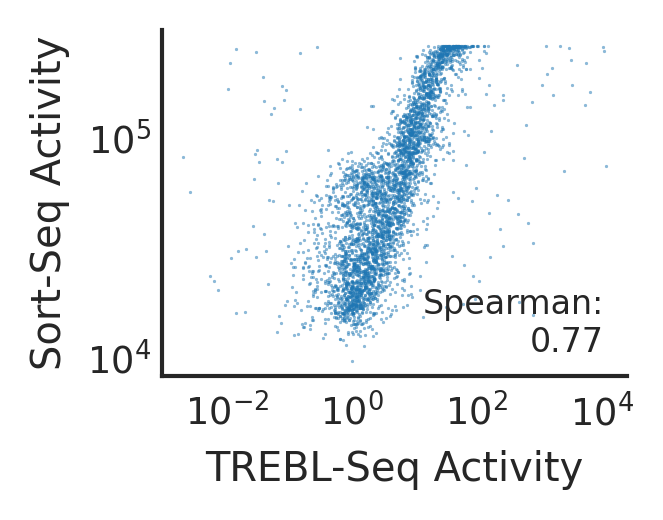

In [15]:
sns.set_context('paper')
sns.set_style('white')

qcdf_240 = qcdf[(qcdf['Time']=='180')] # Choose time point 180
qcdf_240 = qcdf_240[["Tile", "Ratio_negCTRLnorm", "Activity_SCglucose"]].groupby("Tile").mean() # Average across replicates

plt.figure(dpi = 300, figsize = (2, 1.5))
ax = sns.scatterplot(
    data=qcdf_240,
    x='Ratio_negCTRLnorm',
    y='Activity_SCglucose',
    edgecolor=None,
    alpha=0.5,
    s=0.5
)
ax.set(xscale="log")
ax.set(yscale="log")

ax.set_xlabel("TREBL-Seq Activity")
ax.set_ylabel("Sort-Seq Activity")
sns.despine()

# Compute correlations
pearson_corr, pearson_p = pearsonr(qcdf_240['Ratio_negCTRLnorm'], qcdf_240['Activity_SCglucose'])
spearman_corr, spearman_p = spearmanr(qcdf_240['Ratio_negCTRLnorm'], qcdf_240['Activity_SCglucose'])

# Annotate in bottom-right corner without a box
textstr = f'Spearman:\n{spearman_corr:.2f}'
ax.text(
    0.95, 0.05, textstr, transform=ax.transAxes,
    fontsize='small', verticalalignment='bottom', horizontalalignment='right'
)

for label in ax.get_xticklabels():
    label.set_y(0.05)  # move x tick labels closer; adjust value as needed

for label in ax.get_yticklabels():
    label.set_x(0.05)  # move y tick labels closer; adjust value as needed


plt.savefig("../output/grant_resub_figs_v2/fig7.pdf", dpi=300, bbox_inches="tight")
plt.savefig("../output/grant_resub_figs_v2/fig7.png", dpi=300, bbox_inches="tight")
plt.show()


In [16]:
# group by tile, time, and sample
agg_qcdf_180 = (
     qcdf[(qcdf['Time']=='180')].groupby(["Activity_SCglucose", "Stdev_BYS4_BioReps", "Tile", "Time"])["Ratio_negCTRLnorm"]
      .agg(["mean", "std"])
      .reset_index()
)
agg_qcdf_180

Activity_SCglucose  Stdev_BYS4_BioReps  \
0            9615.768272         2296.951479   
1           11222.727705         2347.359411   
2           11298.238100         1032.014479   
3           11889.435021         6752.937161   
4           12018.422504         1368.658814   
...                  ...                 ...   
3891       261977.090182          115.819425   
3892       261980.910447           21.407483   
3893       262003.249427           37.062505   
3894       262015.320227           27.492137   
3895       262099.195774           61.948531   

                                                   Tile Time       mean  \
0     AGAGCTAGGAAATTGGAAAGACAAGAAGAAATGGAAAGAAGAATTG...  180   0.995282   
1     ACTCATCAAGCTATGATTGCTGATATTATTGTTAAGAATGATTCTA...  180   1.552336   
2     ATTGCTGCTCCAGTTCCAGCTGTTAAAGCTGAACCACCAGTTTCTT...  180   0.807689   
3     ACTTCTCCATCTACTAGATCTGTTACTAAACCATCTACTGTTGCTG...  180   0.728537   
4     ATTACTGCTCCAGTTCCAGCTGTTAAAGCTGAACCACCAGTTTCTT...  180   0.656210   
...                                                 ...  ...        ...   
3891  GCTGGTTTGTCTTCATTTAATTCTCCAACTGCTGATATGGCATTTG...  180  46.022253   
3892  TCTGGTGATTTGTTGTTCTTGGCTGGTTTGGAAGGTGCTAAAGATT...  180  46.508409   
3893  ACTGACTTTATTGATGAAGAAGTCTTGATGTCTTTGGTTATTGAAA...  180  69.069811   
3894  GGTTACTTCTCTCATGATCCATCTCCAATGTTGTCTGATGACTTTG...  180  85.100334   
3895  GACTTTGATACATTTGATATTTCTCCAAACTTTGGTCATTCTGATT...  180  35.005841   

            std  
0      0.166045  
1      1.763939  
2      0.285300  
3      0.288766  
4      0.139914  
...         ...  
3891   7.563223  
3892   6.898901  
3893  13.282117  
3894  17.659500  
3895   5.562207  

[3896 rows x 6 columns]

In [17]:
sample_20 = agg_qcdf_180[agg_qcdf_180['mean'] > 1].sample(15, random_state = 277)
sample_20

Activity_SCglucose  Stdev_BYS4_BioReps  \
468         20265.713830         2473.685899   
1555        41085.771695        42860.143978   
3635       224706.576221         3167.171434   
2605        79862.918613        25500.838036   
3736       245309.003338        13728.584787   
2222        62856.825552        29484.856747   
2633        82030.575323        14405.092816   
2986       109090.057181        64715.234160   
1991        54855.218563         1590.088107   
2548        76423.566250         1130.729976   
1428        38028.271079        22385.820351   
2716        87735.206673        65524.223956   
2904       101059.894584        14143.623738   
337         18645.369413         2384.126398   
1442        38470.973872         2440.373431   

                                                   Tile Time       mean  \
468   TCTACTCCATCTTTGCCAGCTTCTTCTGCTCAACAACCAGTTGAAC...  180   1.305593   
1555  CAAATGTCTCACTTTGCTAAATTGGAATCTGTCTTTGCTGACTTTC...  180   3.632842   
3635  TCTTCTAAATGTCCATCTACTAAAGCTGGTACTACTGAACCAGATG...  180  27.531022   
2605  TCTGATAATTGGTTCTCTTTGTTTCCAGAAGATGTTTCTGAATCTC...  180   8.005756   
3736  GTTCATTCTGAAGTCTTGGATTCTGTCTTCTCTACTAATTTGGATG...  180  20.150601   
2222  GACCCATTTGCTTCTGCTCCAAATTCTACTGCATTTACTAATTTGA...  180   9.904825   
2633  GGTGTTCATGATACTTCTTCTCCATCTATTGGTCCAACTATTTCTC...  180   7.512719   
2986  GTTGATTATGATCCAGCTTCTTTGCAATATATGTTGGAGTTCTTTA...  180   9.155406   
1991  CCAGAAGAAGAATTGGAAGTTTCTGAACATTTGAGAAGAAGAAGAT...  180   1.183739   
2548  AAGAGAGCTAGAAATACTTTGGCTGCTAGGAAATCTAGAGCTAAGA...  180   2.065322   
1428  ATGCAAACTCCAAGACAAGCTGGTGAAGCTGTTAAAGCTGCTAGAT...  180   1.666372   
2716  CATCCAGCTTCTTCTGATTTGGATTTGGATGACTTTGCTGCATTTG...  180  13.311525   
2904  ACTTCTCCAGAATCTTCTGCTAAATCTGGTTCTCATAATCATCCAG...  180  14.153951   
337   CCATTGCCACCAATTGTTTATGATACTTCTGATCCAGTTGCTGCTA...  180   1.178052   
1442  GGTGCTCCAATTGCTCCAGAAGCTCCACAATTGCATAATTTGCATC...  180   3.586085   

           std  
468   0.861916  
1555  0.566334  
3635  5.908299  
2605  1.844057  
3736  5.392796  
2222  0.619450  
2633  2.920201  
2986  1.404044  
1991  0.156845  
2548  0.197318  
1428  0.549088  
2716  2.444804  
2904  0.522731  
337   0.164164  
1442  0.815162

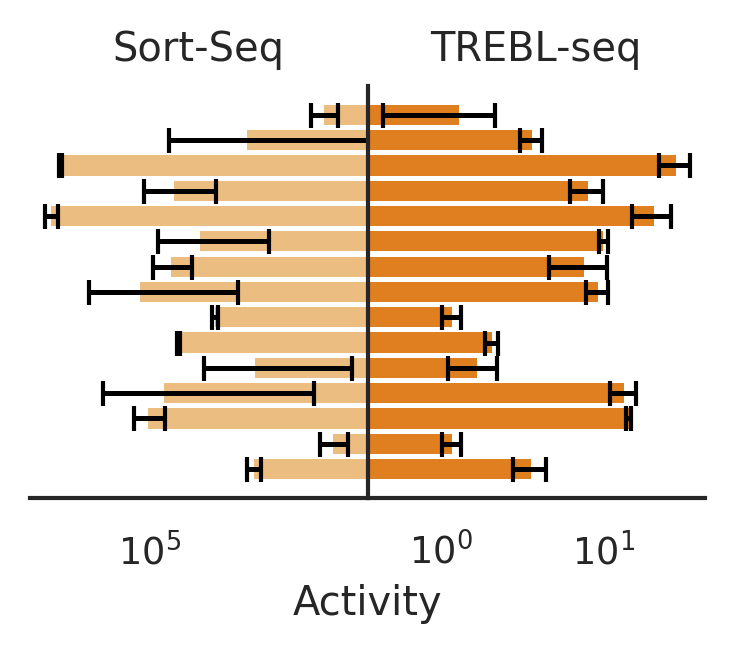

In [18]:
fig, axs = plt.subplots(1, 2, dpi = 300, figsize =(2.25,2), sharey = True)# horizontal bar plot

ax = axs[1]
sns.barplot(y=np.arange(15), 
            x=sample_20['mean'], orient='h', ax = ax, color = sns.color_palette('Paired')[7], edgecolor = 'none')
sns.despine()

# add horizontal error bars
ax.errorbar(
    x=sample_20['mean'],     # x values
    y=np.arange(15),         # bar positions
    xerr=sample_20['std'],   # horizontal error bars
    fmt='none',              # no marker
    ecolor='black',          # error bar color
    capsize=3
)

ax.set_xscale('log')          # log scale for x-axis
ax.set_title('TREBL-seq')

ax1 = axs[0]

# horizontal bar plot: x = value, y = category/index
sns.barplot(
    x=sample_20['Activity_SCglucose'],
    y=np.arange(15),
    ax=ax1, color = sns.color_palette('Paired')[6],
    orient='h',
    edgecolor = 'none'
)
sns.despine(ax=ax1)

# add horizontal error bars
ax1.errorbar(
    x=sample_20['Activity_SCglucose'],  # value
    y=np.arange(15),                     # bar positions
    xerr=sample_20['Stdev_BYS4_BioReps'], # horizontal error bars
    fmt='none',
    ecolor='black',
    capsize=3
)

axs[0].invert_xaxis()  # mirror left side axis direction

ax1.set_xscale('log')
ax1.set_title('Sort-Seq')
axs[0].set_yticks([])

plt.tight_layout(pad = 0)
sns.despine(left = True, ax = axs[0])

axs[0].set_xlabel("")
axs[1].set_xlabel("")

fig.supxlabel("Activity", fontsize = 'medium')
plt.savefig("../output/grant_resub_figs_v2/fig7_err_sample.pdf", bbox_inches="tight")
plt.savefig("../output/grant_resub_figs_v2/fig7_err_sample.png", bbox_inches="tight")

plt.show()


# Figure 4: Replicates

In [19]:
# Pivot data to have replicates + BCs + times as columns
df_pivot = concatenated_df.pivot_table(
    index=['Tile', 'Time', "AD_BC", "RPTR_BC"],
    columns='sample',
    values='Ratio_negCTRLnorm'
).reset_index().dropna()

df_pivot

sample                                               Tile Time        AD_BC  \
0       AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...    0  ACCCCTCGCCG   
1       AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...   10  ACCCCTCGCCG   
2       AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...   15  ACCCCTCGCCG   
3       AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...  180  ACCCCTCGCCG   
4       AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...  240  ACCCCTCGCCG   
...                                                   ...  ...          ...   
119386  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...  180  ACCCATCCAGA   
119387  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...  240  AATTGAGCGAT   
119388  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...  240  ACCCATCCAGA   
119390  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...   30  ACCCATCCAGA   
119392  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...    5  ACCCATCCAGA   

sample         RPTR_BC          1          2          3  
0       AGTTCATGCTCCGA   1.582093   0.921957   1.258584  
1       AGTTCATGCTCCGA   1.289787   1.002675   0.895616  
2       AGTTCATGCTCCGA   1.128625   1.383635   2.086499  
3       AGTTCATGCTCCGA   1.220173   1.304044   1.197968  
4       AGTTCATGCTCCGA   0.750743   1.092876   1.776015  
...                ...        ...        ...        ...  
119386  AAATATTTGTCCGC   6.843205   6.148755   4.277445  
119387  GTCAAGATACCTCG   0.021459   0.009570   0.005575  
119388  AAATATTTGTCCGC   4.407703   4.125089   3.036959  
119390  AAATATTTGTCCGC  14.707832  14.934920  17.790890  
119392  AAATATTTGTCCGC   7.713425   4.285752   5.209320  

[111918 rows x 7 columns]

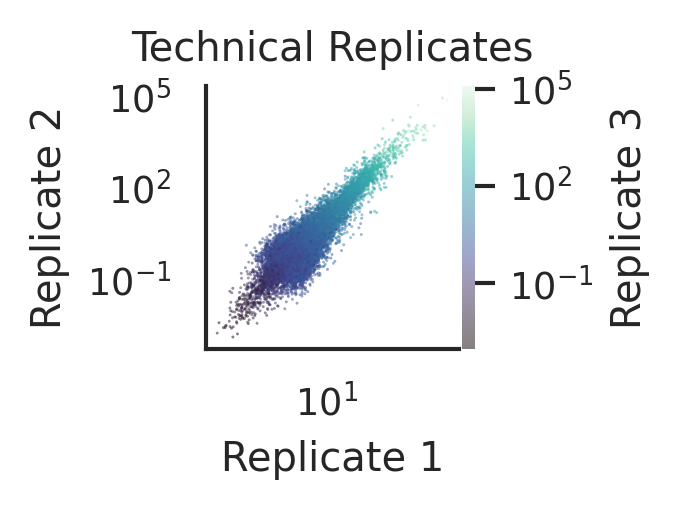

In [20]:
sns.set_context('paper')

x = df_pivot['1']
y = df_pivot['2']
c = df_pivot['3']

plt.figure(figsize=(2,1.5), dpi=300)
hb = plt.scatter(
    x, y, c=c, cmap='mako', s=0.5, alpha=0.5, norm=LogNorm(vmin=c.min(), vmax=c.max()), edgecolors='none'
)

plt.title("Technical Replicates")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Replicate 1')
plt.ylabel('Replicate 2')
sns.despine()

# Create colorbar and customize
cbar = plt.colorbar(hb, pad = 0.01)
cbar.set_label('Replicate 3')  # rotation 0, labelpad adjusts distance
cbar.outline.set_visible(False)

#plt.savefig("../output/grant_resub_figs/fig4_option_1.png", dpi=300, bbox_inches="tight")
plt.tight_layout(pad = 0)
plt.show()


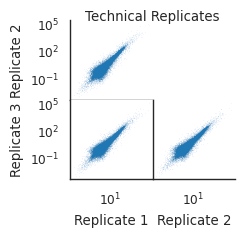

In [21]:
# Rename columns for labeling
df_plot = df_pivot[["1", "2", "3"]].rename(columns={
    "1": "Replicate 1",
    "2": "Replicate 2",
    "3": "Replicate 3"
})

sns.set_context('paper')

# Create PairGrid manually
g = sns.PairGrid(df_plot, corner=True, height=1, aspect=1)

# Map scatterplots to lower triangle
g.map_lower(sns.scatterplot, s=0.25, alpha=0.1, edgecolor=None)

# Set log scale for all lower-triangle axes
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_xscale('log')
        ax.set_yscale('log')

# Hide diagonal axes
for i, j in zip(*np.diag_indices_from(g.axes)):
    g.axes[i, j].set_visible(False)

# Add a title
g.fig.suptitle("Technical Replicates", fontsize='medium', y = 0.725, x = 0.45)

# Adjust layout
g.fig.tight_layout(pad=0)
#g.fig.savefig("../output/grant_resub_figs/fig4_option_2.png", dpi=300, bbox_inches="tight")

plt.show()


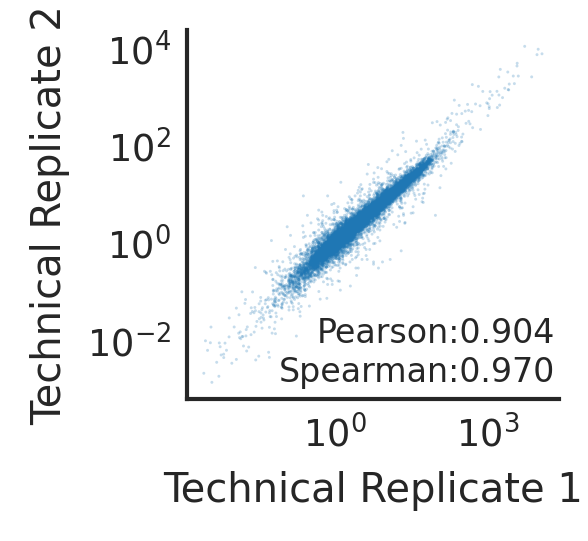

In [22]:
sns.set_style('white')

# Subset
df_pivot_180 = df_pivot[df_pivot["Time"] == "180"]

x = df_pivot_180["2"].to_numpy()
y = df_pivot_180["3"].to_numpy()

# Compute correlations
pearson_r, pearson_p = pearsonr(x, y)
spearman_r, spearman_p = spearmanr(x, y)

# Plot
sns.set_context('paper')
plt.figure(figsize=(1.6,1.6), dpi=300)
ax = sns.scatterplot(data=df_pivot_180, x='2', y='3',
                edgecolor='none', alpha=0.25, s=0.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Technical Replicate 1")
plt.ylabel("Technical Replicate 2")
sns.despine()

# Annotate with r values
plt.text(0.99, 0.03,
         f"Pearson:{pearson_r:.3f}\nSpearman:{spearman_r:.3f}",
         ha='right', va='bottom',
         transform=plt.gca().transAxes,
         fontsize='small')

for label in ax.get_xticklabels():
    label.set_y(0.05)  # move x tick labels closer; adjust value as needed

for label in ax.get_yticklabels():
    label.set_x(0.05)  # move y tick labels closer; adjust value as needed

plt.savefig("../output/grant_resub_figs_v2/fig4.pdf", bbox_inches='tight')
plt.savefig("../output/grant_resub_figs_v2/fig4.png", bbox_inches='tight')

In [23]:
pd.read_csv("../data/SynAD_Glu_Filtered_ActivityCtrlStd_replicateactivities_simpleave.csv").columns

Index(['Unnamed: 0', 'AAseq', 'OriginalIndices', 'ReplicateActivities',
       'Activity', 'StdDev', 'NumReps', 'Ctrl', 'NegCtrl', 'Charge',
       'HydrophobicityKD', 'HydrophobicityWW', 'Aromatics', 'WFYL', 'A', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S',
       'T', 'V', 'W', 'Y', 'AEMness', 'ADHunter', 'TADA', 'PADDLE', 'Kotha',
       'ADPred', 'PADDLE Score', 'TADA Score', 'ADHunter Score',
       'ADPred Score', 'State Size', '# Models Predicted',
       '# Models Predicted (ADPredNoKotha)', '# Models Predicted (all 5)',
       'StdActivity', 'ReplicateStdActivities', 'StdActivityStdDev'],
      dtype='object')

In [30]:
import ast
synthetics_sort2 = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/SynAD_Glu_sort2_processed.csv", index_col = 0)[["AAseq", "Activity"]]
synthetics_sort2

AAseq       Activity
0      AAAAAIACELRTDNYFEYPDLSILDALDNDSDETMSLIDE   25075.335066
1      AAAAASDHSDVNDIIELGGLSNRLYDFYSDLEDIENDIAV   42928.146054
2      AAADGASFSDDTDEDLYKYDPWDLPGLSVIKTDDPEWFFF  166188.911721
3      AAADGASFSDDTDEDLYKYDPWELPSKASFGEQEWYFFSP  108042.704031
4      AAADGPDCDTREFCELRDSLLWNESCFLLDDDKRFDVSEN   56791.149738
...                                         ...            ...
17265  YYSDDIMLDLGVDLSNFQFDFRYFGLDSPLSPPWNEDDDS  254373.309781
17266  YYSEQSCYLDLDLDLDITFLDFSQFLEQLLQSKNDPLVSE  237618.847801
17267  YYSEQSCYLNFPPLDCVDLVATLSEKFKSFSQLLLDFPIS   46180.547181
17268  YYSEQSCYLNFPPLDMFPALPSDLSGWVESMLSELNNPAS  140773.532322
17269  YYSSLGVEPWDLDGLFEFSRLLVDLNMDGFKIDWDYEVAE  138573.015628

[17270 rows x 2 columns]

In [32]:
synthetics_sort1 = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/SynAD_Ratio_sort1_processed.csv", index_col = 0)[["AAseq", "Activity"]]
synthetics_sort1

AAseq       Activity
0      AAAAAIACELRTDNYFEYPDLSILDALDNDSDETMSLIDE   15444.343705
1      AAAAASDHSDVNDIIELGGLSNRLYDFYSDLEDIENDIAV   38312.576031
2      AAADGASFSDDTDEDLYKYDPWDLPGLSVIKTDDPEWFFF  143086.179959
3      AAADGASFSDDTDEDLYKYDPWELPSKASFGEQEWYFFSP  105481.834485
4      AAADGPDCDTREFCELRDSLLWNESCFLLDDDKRFDVSEN   37304.235662
...                                         ...            ...
16395  YYSDDIMLDLGVDLSNFQFDFRYFGLDSPLSPPWNEDDDS  241277.075548
16396  YYSEQSCYLDLDLDLDITFLDFSQFLEQLLQSKNDPLVSE  198565.788528
16397  YYSEQSCYLNFPPLDCVDLVATLSEKFKSFSQLLLDFPIS   15157.960200
16398  YYSEQSCYLNFPPLDMFPALPSDLSGWVESMLSELNNPAS  130214.421766
16399  YYSSLGVEPWDLDGLFEFSRLLVDLNMDGFKIDWDYEVAE  148670.064043

[16400 rows x 2 columns]

In [37]:
synthetics_replicates_expanded = pd.merge(synthetics_sort1, synthetics_sort2, on="AAseq", suffixes=("_rep1", "_rep2"))
synthetics_replicates_expanded

AAseq  Activity_rep1  Activity_rep2
0      AAAAAIACELRTDNYFEYPDLSILDALDNDSDETMSLIDE   15444.343705   25075.335066
1      AAAAASDHSDVNDIIELGGLSNRLYDFYSDLEDIENDIAV   38312.576031   42928.146054
2      AAADGASFSDDTDEDLYKYDPWDLPGLSVIKTDDPEWFFF  143086.179959  166188.911721
3      AAADGASFSDDTDEDLYKYDPWELPSKASFGEQEWYFFSP  105481.834485  108042.704031
4      AAADGPDCDTREFCELRDSLLWNESCFLLDDDKRFDVSEN   37304.235662   56791.149738
...                                         ...            ...            ...
16349  YYSDDIMLDLGVDLSNFQFDFRYFGLDSPLSPPWNEDDDS  241277.075548  254373.309781
16350  YYSEQSCYLDLDLDLDITFLDFSQFLEQLLQSKNDPLVSE  198565.788528  237618.847801
16351  YYSEQSCYLNFPPLDCVDLVATLSEKFKSFSQLLLDFPIS   15157.960200   46180.547181
16352  YYSEQSCYLNFPPLDMFPALPSDLSGWVESMLSELNNPAS  130214.421766  140773.532322
16353  YYSSLGVEPWDLDGLFEFSRLLVDLNMDGFKIDWDYEVAE  148670.064043  138573.015628

[16354 rows x 3 columns]

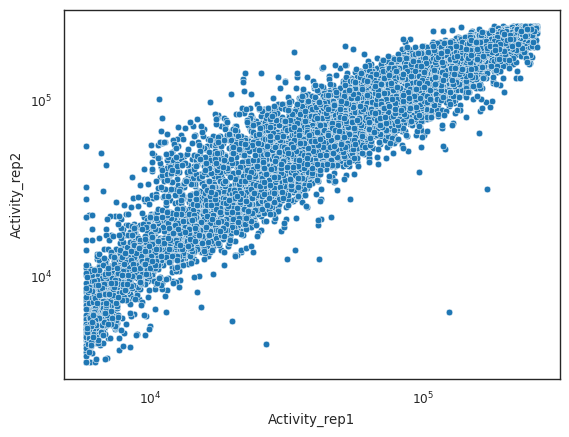

In [39]:
ax = sns.scatterplot(data = synthetics_replicates_expanded, x = 'Activity_rep1', y = 'Activity_rep2')
ax.set_xscale('log')
ax.set_yscale('log')

In [40]:
# read in facs csv with activity data and control designation (EC did by hand in excel)
facs_f='/global/scratch/projects/fc_mvslab/OpenProjects/EChase/TREBLEseq_ismaybethenewcibername/TREBLseq_finaldrafts/Gcn4OrthologData_ToShare_20240930_EC.csv'
facsdf_all = pd.read_csv(facs_f)
# facsdf_qc['GFP_mean']=facsdf_qc[['BioRep_A_GFP','BioRep_B_GFP']].mean(axis=1)
# facsdf_qc['mCherry_mean']=facsdf_qc[['BioRep_A_mCherry','BioRep_B_mCherry']].mean(axis=1)
# facsdf_qc = facsdf_qc[(
#     facsdf_qc['BioRep_A_mCherry_TotalReads']>=50) & (facsdf_qc['BioRep_B_mCherry_TotalReads']>=50) &(
#         facsdf_qc['BioRep_A_GFP_TotalReads']>=50) & (facsdf_qc['BioRep_B_GFP_TotalReads']>=50)
#     ]
# facsdf_qc = facsdf_qc[(facsdf_qc['TotalReads_BioRepA_BYS4']>=1000) & (facsdf_qc['TotalReads_BioRepB_BYS4']>=1000) ]
facsdf_all = facsdf_all.dropna(subset = ["Activity_BioRepA_BYS4", "Activity_BioRepB_BYS4"])
facsdf_all

Name    is_control  \
0       Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_1  experimental   
2      Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_11  experimental   
3      Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_16  experimental   
4      Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_21  experimental   
5      Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_26  experimental   
...                                                 ...           ...   
20817                             Gnc4Lib_Charge_HIGH_0           mid   
20818                             Gnc4Lib_Charge_HIGH_0           mid   
20820                           Gnc4Lib_Disorder_HIGH_0          high   
20821                           Gnc4Lib_Disorder_HIGH_0          high   
20822                           Gnc4Lib_Disorder_HIGH_0          high   

                                          ADseq  \
0      MALRIEVYNRIESSTASTALQRQDLRYTFRSNARAASGQA   
2      IESSTASTALQRQDLRYTFRSNARAASGQANANYQAFTAG   
3      ASTALQRQDLRYTFRSNARAASGQANANYQAFTAGSALNG   
4      QRQDLRYTFRSNARAASGQANANYQAFTAGSALNGPSLPA   
5      RYTFRSNARAASGQANANYQAFTAGSALNGPSLPAPSLFA   
...                                         ...   
20817  STDSTPMFQYENLENNSKEWTSLFDNNIPVTTDNVSLANK   
20818  STDSTPMFEYQNLENNSKEWTSLFDNDIPVTTDNVSLADK   
20820  STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR   
20821  MTDSTPMFEYELTENNSKEWTSLFDTDIPVTTDDESLADK   
20822  NTDSTHMFEYWALEDNSKEWTSLFDNDIWVTTDDVSLADK   

                                                ArrayDNA  \
0      ATGGCTTTGAGAATTGAAGTTTATAATAGAATTGAATCTTCTACTG...   
2      ATTGAATCTTCTACTGCTTCTACTGCTTTGCAAAGACAAGATTTGA...   
3      GCTTCTACTGCTTTGCAAAGACAAGATTTGAGATATACATTTAGAT...   
4      CAAAGACAAGATTTGAGATATACATTTAGATCTAATGCTAGAGCTG...   
5      AGATATACATTTAGATCTAATGCTAGAGCTGCTTCTGGTCAAGCTA...   
...                                                  ...   
20817  TCTACTGATTCTACTCCAATGTTTCAATATGAGAATTTGGAGAATA...   
20818  TCTACTGATTCTACTCCAATGTTTGAATATCAGAATTTGGAGAATA...   
20820  TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...   
20821  ATGACTGATTCTACTCCAATGTTTGAATATGAATTGACTGAGAATA...   
20822  AATACTGATTCTACTCATATGTTTGAATATTGGGCTTTGGAAGATA...   

       Activity_BioRepA_BYS4  Activity_BioRepB_BYS4  TotalReads_BioRepA_BYS4  \
0               62100.529409           39598.983661                   1098.0   
2               35362.047143           16461.733704                  90903.0   
3               34961.675584            9931.871718                 204600.0   
4               55288.447568           47714.348847                   1128.0   
5               44011.175927           74247.222779                   3237.0   
...                      ...                    ...                      ...   
20817          106413.475948          112324.200742                    655.0   
20818          120532.321833          105862.794762                   4430.0   
20820          261606.121575          261215.289071                   3225.0   
20821          158954.046399          146643.694216                  64713.0   
20822          259154.928393          262087.249189                    558.0   

       TotalReads_BioRepB_BYS4  BioRep_A_GFP_TotalReads  BioRep_A_GFP  ...  \
0                       2857.0                      NaN           NaN  ...   
2                       3102.0                   1797.0    530.633638  ...   
3                        226.0                   3974.0    709.844542  ...   
4                      43923.0                      NaN           NaN  ...   
5                      55549.0                      NaN           NaN  ...   
...                        ...                      ...           ...  ...   
20817                  13108.0                      NaN           NaN  ...   
20818                  53110.0                    452.0   3363.151895  ...   
20820                  23456.0                    414.0   8782.000000  ...   
20821                  46036.0                  10295.0   4506.455793  ...   
20822                

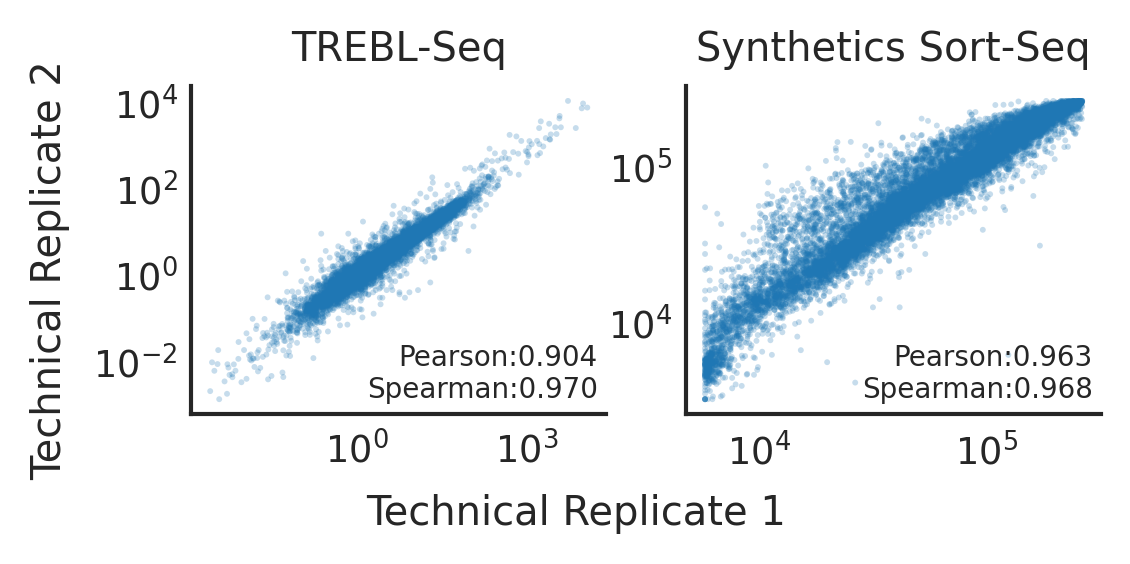

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr

sns.set_style('white')
sns.set_context('paper')

# ----- Subset and prepare data for A -----
df_pivot_180 = df_pivot[df_pivot["Time"] == "180"].copy()
x = df_pivot_180["2"].to_numpy()
y = df_pivot_180["3"].to_numpy()

pearson_r_A, pearson_p_A = pearsonr(x, y)
spearman_r_A, spearman_p_A = spearmanr(x, y)

# ----- Prepare data for B -----
xB = synthetics_replicates_expanded["Activity_rep1"].to_numpy()
yB = synthetics_replicates_expanded["Activity_rep2"].to_numpy()

pearson_r_B, pearson_p_B = pearsonr(xB, yB)
spearman_r_B, spearman_p_B = spearmanr(xB, yB)

# ----- Create figure with subplots -----
fig, axs = plt.subplots(1, 2, figsize=(3.5, 1.6), dpi=300)

# ==================
# PANEL A
# ==================
ax = axs[0]
sns.scatterplot(
    data=df_pivot_180,
    x='2',
    y='3',
    edgecolor='none',
    alpha=0.25,
    s=2,
    ax=ax
)
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlabel("Technical Replicate 1", labelpad=1)
#ax.set_ylabel("Technical Replicate 2", labelpad=1)
sns.despine(ax=ax)

# Add correlation annotation
ax.text(
    0.98, 0.03,
    f"Pearson:{pearson_r_A:.3f}\nSpearman:{spearman_r_A:.3f}",
    ha='right', va='bottom',
    transform=ax.transAxes,
    fontsize='x-small'
)

for label in ax.get_xticklabels():
    label.set_y(0.05)
for label in ax.get_yticklabels():
    label.set_x(0.05)

# ==================
# PANEL B
# ==================
ax2 = axs[1]
sns.scatterplot(
    data=synthetics_replicates_expanded,
    x='Activity_rep1',
    y='Activity_rep2',
    ax=ax2,
    s=2,
    edgecolor='none',
    alpha=0.25
)
ax2.set_xscale('log')
ax2.set_yscale('log')
#ax2.set_xlabel("Synthetic Replicate 1", labelpad=1)
#ax2.set_ylabel("Synthetic Replicate 2", labelpad=1)
sns.despine(ax=ax2)

# Add correlation annotation
ax2.text(
    0.98, 0.03,
    f"Pearson:{pearson_r_B:.3f}\nSpearman:{spearman_r_B:.3f}",
    ha='right', va='bottom',
    transform=ax2.transAxes,
    fontsize='x-small'
)

for ax in axs:
    ax.set_xlabel("")
    ax.set_ylabel("")

fig.supxlabel("Technical Replicate 1", y = -0.05, fontsize = 'medium')
fig.supylabel("Technical Replicate 2", x = -0.02, fontsize = 'medium')

axs[0].set_title("TREBL-Seq")
ax2.set_title("Synthetics Sort-Seq")

for label in ax2.get_xticklabels():
    label.set_y(0.05)
for label in ax2.get_yticklabels():
    label.set_x(0.05)

# ==================
# Final layout
# ==================
plt.tight_layout(pad=0)
plt.savefig("../output/grant_resub_figs_v2/fig4_synthetics_combined.pdf", bbox_inches='tight')
plt.savefig("../output/grant_resub_figs_v2/fig4_synthetics_combined.png", bbox_inches='tight')
plt.show()


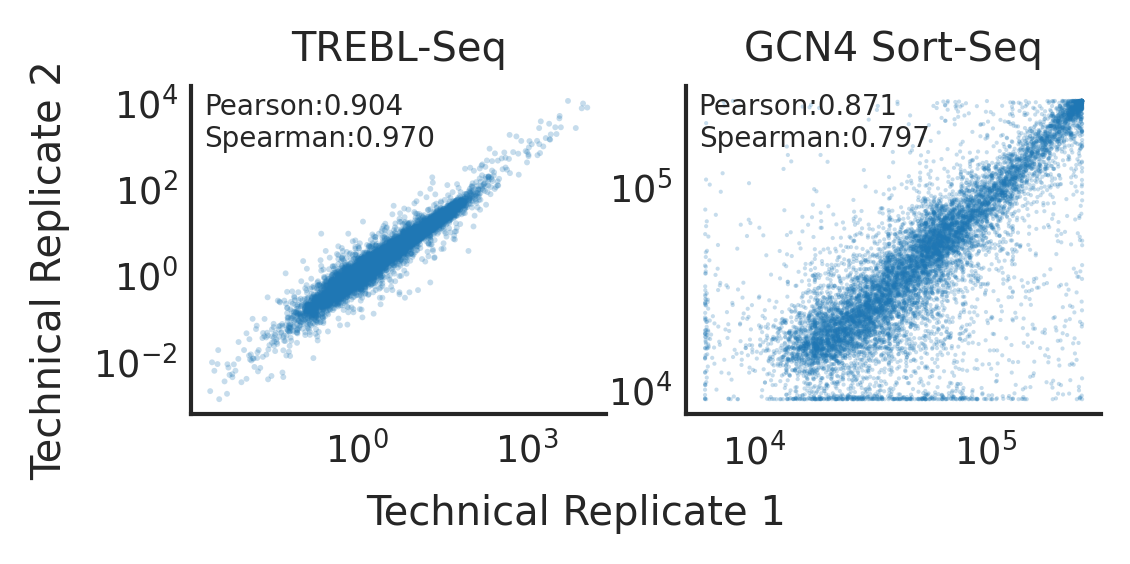

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr

sns.set_style('white')
sns.set_context('paper')

# ----- Subset and prepare data for A -----
df_pivot_180 = df_pivot[df_pivot["Time"] == "180"].copy()
x = df_pivot_180["2"].to_numpy()
y = df_pivot_180["3"].to_numpy()

pearson_r_A, pearson_p_A = pearsonr(x, y)
spearman_r_A, spearman_p_A = spearmanr(x, y)

# ----- Prepare data for B -----
xB = facsdf_all["Activity_BioRepA_BYS4"].to_numpy()
yB = facsdf_all["Activity_BioRepB_BYS4"].to_numpy()

pearson_r_B, pearson_p_B = pearsonr(xB, yB)
spearman_r_B, spearman_p_B = spearmanr(xB, yB)

# ----- Create figure with subplots -----
fig, axs = plt.subplots(1, 2, figsize=(3.5, 1.6), dpi=300)

# ==================
# PANEL A
# ==================
ax = axs[0]
sns.scatterplot(
    data=df_pivot_180,
    x='2',
    y='3',
    edgecolor='none',
    alpha=0.25,
    s=2,
    ax=ax
)
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlabel("Technical Replicate 1", labelpad=1)
#ax.set_ylabel("Technical Replicate 2", labelpad=1)
sns.despine(ax=ax)

# Add correlation annotation
ax.text(
    0.03, 0.98,
    f"Pearson:{pearson_r_A:.3f}\nSpearman:{spearman_r_A:.3f}",
    ha='left', va='top',
    transform=ax.transAxes,
    fontsize='x-small'
)

for label in ax.get_xticklabels():
    label.set_y(0.05)
for label in ax.get_yticklabels():
    label.set_x(0.05)

# ==================
# PANEL B
# ==================
ax2 = axs[1]
sns.scatterplot(
    data=facsdf_all,
    x='Activity_BioRepA_BYS4',
    y='Activity_BioRepB_BYS4',
    ax=ax2,
    s=1,
    edgecolor='none',
    alpha=0.25
)
ax2.set_xscale('log')
ax2.set_yscale('log')
#ax2.set_xlabel("Synthetic Replicate 1", labelpad=1)
#ax2.set_ylabel("Synthetic Replicate 2", labelpad=1)
sns.despine(ax=ax2)

# Add correlation annotation
ax2.text(
    0.03, 0.98,
    f"Pearson:{pearson_r_B:.3f}\nSpearman:{spearman_r_B:.3f}",
    ha='left', va='top',
    transform=ax2.transAxes,
    fontsize='x-small'
)

for ax in axs:
    ax.set_xlabel("")
    ax.set_ylabel("")

fig.supxlabel("Technical Replicate 1", y = -0.05, fontsize = 'medium')
fig.supylabel("Technical Replicate 2", x = -0.02, fontsize = 'medium')

axs[0].set_title("TREBL-Seq")
ax2.set_title("GCN4 Sort-Seq")

for label in ax2.get_xticklabels():
    label.set_y(0.05)
for label in ax2.get_yticklabels():
    label.set_x(0.05)

# ==================
# Final layout
# ==================
plt.tight_layout(pad=0)
plt.savefig("../output/grant_resub_figs_v2/fig4_gcn4_combined.pdf", bbox_inches='tight')
plt.savefig("../output/grant_resub_figs_v2/fig4_gcn4_combined.png", bbox_inches='tight')
plt.show()


Comparison to synthetics

# Figure 5: Multiple BCs

In [21]:
filtered_cat_2

Barcode_RPTR  RPTR_UMIs  Reads_RPTR         RPTR_BC  \
0       TATACATCCACCAT        402     25490.0  TATACATCCACCAT   
1       AAGTGGTGAGAAGC       2784    167960.0  AAGTGGTGAGAAGC   
2       GTACGAAGTCAGTG       1349     79520.0  GTACGAAGTCAGTG   
3       CTATTCCGAAATAT       1012     66011.0  CTATTCCGAAATAT   
4       AAAGTTCTCAGACA        690     41207.0  AAAGTTCTCAGACA   
...                ...        ...         ...             ...   
347119  TTCAGAGAAAGCGC         13       254.0  TTCAGAGAAAGCGC   
347120  AAATCAGGTGCGCT          3        84.0  AAATCAGGTGCGCT   
347121  AATAAATTGTTATG          1        32.0  AATAAATTGTTATG   
347122  ATAAAACTAGCCTG          1        22.0  ATAAAACTAGCCTG   
347123  CTTGGCTAACTGGC          2         2.0  CTTGGCTAACTGGC   

                                                       AD        AD_BC  \
0       GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...  ACTCGGAATTG   
1       GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...  CATCTAGGAAA   
2       TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...  TGGGAGCCCTT   
3       ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...  AAGTTCTTTCA   
4       TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...  TCTTAGGCTCG   
...                                                   ...          ...   
347119  AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...  CGGGGTGTCTG   
347120  AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...  GAAAACTTTAA   
347121  TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...  CGCCAGGCGCT   
347122  TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...  GCATGAGTTAG   
347123  TCTAGAAGAAGGAAAGGTCCATTGCCAGCTATTGCTGTTGATCCAT...  CCGAACTTATC   

                                                  AD_ADBC   Barcode_AD  \
0       GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...  ACTCGGAATTG   
1       GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...  CATCTAGGAAA   
2       TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...  TGGGAGCCCTT   
3       ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...  AAGTTCTTTCA   
4       TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...  TCTTAGGCTCG   
...                                                   ...          ...   
347119  AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...  CGGGGTGTCTG   
347120  AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...  GAAAACTTTAA   
347121  TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...  CGCCAGGCGCT   
347122  TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...  GCATGAGTTAG   
347123  TCTAGAAGAAGGAAAGGTCCATTGCCAGCTATTGCTGTTGATCCAT...  CCGAACTTATC   

                                                     Tile  AD_UMIs  Reads_AD  \
0       GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...      646    7557.0   
1       GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...      806    9306.0   
2       TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...      657    7982.0   
3       ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...      167    2170.0   
4       TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...      917   11109.0   
...                                                   ...      ...       ...   
347119  AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...       57     416.0   
347120  AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...       53     414.0   
347121  TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...      313    2896.0   
347122  TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...      536    4436.0   
347123  TCTAGAAGAAGGAAAGGTCCATTGCCAGCTATTGCTGTTGATCCAT...      679    5996.0   

           Ratio  Ratio_negCTRLnorm Library Time sample  
0       0.622291           5.651387     3_5    5      3  
1       3.454094          31.368640     3_5    5      3  
2       2.053272          18.646962     3_5    5      3  
3       6.059880          55.033299     3_5    5      3  
4       0.752454           6.833470     3_5    5      3  
...          ...                ...     ...  ...    ...  
347119  0.228070           0.575070   1_240  240      1  
347120  0.056604          

In [22]:
# Per AD timepoint and sample, what is the standard deviation between AD BCs?
AD_BCs_agg = concatenated_df[["AD", "Ratio_negCTRLnorm", "Time", "sample"]].groupby(["AD", "Time", "sample"]).agg([np.mean, np.std, "count"]).reset_index()#.dropna()
AD_BCs_agg.columns = ["AD", "Time", "sample", "mean", "std", "BC_count"]
AD_BCs_agg["Relative Std. Dev."] = AD_BCs_agg["std"] / AD_BCs_agg["mean"]
AD_BCs_agg = AD_BCs_agg[AD_BCs_agg["AD"].isin(filtered_cat_2["AD"])] # Remove outliers
AD_BCs_agg

AD Time sample  \
0       AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...    0      1   
1       AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...    0      2   
2       AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...    0      3   
3       AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...   10      1   
4       AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...   10      2   
...                                                   ...  ...    ...   
231124  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...   30      2   
231125  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...   30      3   
231126  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...    5      1   
231127  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...    5      2   
231128  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...    5      3   

            mean        std  BC_count  Relative Std. Dev.  
0       1.582093        NaN         1                 NaN  
1       0.921957        NaN         1                 NaN  
2       1.258584        NaN         1                 NaN  
3       1.289787        NaN         1                 NaN  
4       1.002675        NaN         1                 NaN  
...          ...        ...       ...                 ...  
231124  7.493609  10.523603         2            1.404344  
231125  8.934322  12.525078         2            1.401906  
231126  7.713425        NaN         1                 NaN  
231127  4.285752        NaN         1                 NaN  
231128  2.635341   3.640156         2            1.381285  

[230942 rows x 7 columns]

In [23]:
# 37% of set has multiple BCs
len(AD_BCs_agg[AD_BCs_agg["Relative Std. Dev."].isna()]) / len(AD_BCs_agg)

0.6355232049605528

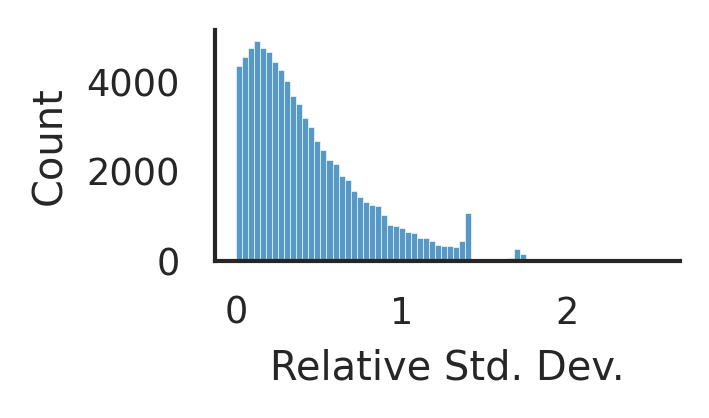

In [24]:
# For ADs with multiple BCs
plt.figure(dpi = 300, figsize = (2,1))
ax = sns.histplot(AD_BCs_agg['Relative Std. Dev.'], bins = 70)
sns.despine()

In [25]:
from Bio.Seq import Seq
qcdf["AAseq"] = qcdf["Tile"].apply(lambda seq: str(Seq(seq).translate()))
qcdf

Tile        AD_BC  \
0       GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...  ACTCGGAATTG   
1       ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...  AAGTTCTTTCA   
2       TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...  TCTTAGGCTCG   
3       CAAAGACCAACTAGACCACAAGTTCCATTGTTCTCTCAATCTACTG...  GCCCTTGTATT   
4       TTGTTTATGGATGCTTCTGCTCCACCATCTGCTTCATTTACTGATT...  GCTCGTTACCG   
...                                                   ...          ...   
124122  GCTAGATCTGTTACTAAACCATCTCATGTTGCTGGTGTTAATGCTA...  TTCAACCTGCT   
124123  CCAAAATCTGGTTCTAGGAAACATTCTTCTGTTGCTGGTGTTAATT...  TGATGTACGGT   
124124  GGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCTCTT...  ACCGCGGGCCG   
124125  GTTACTACTACTTCTTCTTCTTCTAGAAGGAAATCTGGTGGTTCTC...  CTTCCCTCCCT   
124126  ACTTCTGCTTCTTCTGCTTCTCAAATTGTTGTTCATCCAGGTGGTG...  GCCCCCCGTTG   

               RPTR_BC  RPTR_UMIs  AD_UMIs  Ratio_negCTRLnorm Time sample  \
0       TATACATCCACCAT        402      646           5.651387    5      3   
1       CTATTCCGAAATAT       1012      167          55.033299    5      3   
2       AAAGTTCTCAGACA        690      917           6.833470    5      3   
3       TTAGTATTTTATCT        140      533           2.385406    5      3   
4       AAAAACTAATTCTA        459      111          37.553569    5      3   
...                ...        ...      ...                ...  ...    ...   
124122  AACGAATAAAACAA        109      379           0.725170  240      1   
124123  TGTTAGGTGATAAC         22      148           0.374812  240      1   
124124  ATAATACGTGTACA         11        5           5.547214  240      1   
124125  CGCCACTCACCACT         30       63           1.200696  240      1   
124126  TATGTAATTAACCT         12        9           3.361948  240      1   

                                                     Name    is_control  \
0        Eurotiomycetes_jgi|Penatra1|67166|gm1.1253_g_256  experimental   
1        Eurotiomycetes_jgi|Penatra1|67166|gm1.1253_g_296  experimental   
2       Sordariomycetes_jgi|Colac2|683025|estExt_Genew...  experimental   
3       Leotiomycetes_jgi|Rhier1|657659|fgenesh1_pg.13...  experimental   
4       Eurotiomycetes_jgi|Aspind2_1|119317|CE119316_2...  experimental   
...                                                   ...           ...   
124122      Afla_EED46972.1_AspergillusFlavusNRRL3357_131  experimental   
124123  Xylonomycetes_jgi|Trigu1|1045435|fgenesh1_pg.2...  experimental   
124124  Sordariomycetes_jgi|Verdah1|362640|estExt_Gene...  experimental   
124125  Sordariomycetes_jgi|Acral2|2034848|fgenesh1_kg...  experimental   
124126  Dothideomycetes_jgi|Ternu1|295555|estExt_Genew...  experimental   

           GFP_mean  mCherry_mean  Activity_SCglucose  \
0       2550.414931   3813.713778        71546.924661   
1       8798.171241   1017.694945       261940.998463   
2       3248.307011   2321.034628       102890.752186   
3       1762.120378   2637.450831        46665.516224   
4       5148.434170   2383.548911       161936.816547   
...             ...           ...                 ...   
124122   270.500000   1081.691640        51021.993644   
124123   370.737233   2473.781472        23650.129864   
124124  2594.613575   3341.401808        46857.078856   
124125   270.500000   3068.675866        29693.319420   
124126   520.344064    994.359181        53134.342697   

                                           AAseq  
0       GTISPKDLMMDASVPPSGTFTDLSTPSFESPGNFSQNTSP  
1       MFTDLDVAGHEDWPSLFDHSSEPLNAFDLATLDAAAAYSV  
2       LDLDDFTGFEGGASTTYSSPAMPSVFDVGPTLGTVSPQDL  
3       QRPTRPQVPLFSQSTGNIPQTPNMAMQGNLLYALSLAEAG  
4       LFMDASAPPSASFTDLSTPSFDSPGYFSQDTSPMFGTDLD  
...                                          ...  
124122  ARSVTKPSHVAGVNARQRKPLPPIKFDSQDPVAMKRARNT  
124123  PKSGSRKHSSVAGVNSRRRDKPLPPIVVDDPSDLIAVKRA  
124124  GSSGEYDVAGSQWFSLFPDQNASVETTGAEQPLGDRVQNS  
124125  VTTTSSSSRRKSGGSPASGRHSSVAGVGSRKRDKPLPPII  
124126  TSASSASQIVVHPGGESLQRKRSSATNSPAIFSPAVKHSS  

[124127 rows x 14 columns]

In [26]:
qcdf["is_control"].value_counts()

is_control
experimental    121894
high               828
low                735
mid                670
Name: count, dtype: int64

In [27]:
qcdf_high_controls = qcdf[qcdf["is_control"] == "high"]
qcdf_high_controls

Tile        AD_BC  \
547     TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...  ATAAACACAGG   
548     TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...  ATAAACACAGG   
549     TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...  ATAAACACAGG   
550     TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...  ATAAACACAGG   
977     TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...  ATAAACACAGG   
...                                                   ...          ...   
123404  ACTGACTTTATTGATGAAGAAGTCTTGATGTCTTTGGTTATTGAAA...  ACCTCCGTGTG   
123443  TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...  ATCGATTACTA   
123444  TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...  ATCGATTACTA   
123445  TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...  ATCGATTACTA   
123446  TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...  ATCGATTACTA   

               RPTR_BC  RPTR_UMIs  AD_UMIs  Ratio_negCTRLnorm Time sample  \
547     TATTTCCACTCAAT       1985      200          90.134701    5      3   
548     TATTTCCACTCAAT       1985      200          90.134701    5      3   
549     TATTTCCACTCAAT       1985      200          90.134701    5      3   
550     TATTTCCACTCAAT       1985      200          90.134701    5      3   
977     AATTTCCACTCAAT          3      200           0.136224    5      3   
...                ...        ...      ...                ...  ...    ...   
123404  TCTGAGTCCAAATC       8658      541          40.352698  240      1   
123443  AACCTAATCTCTTA      16100     1162          34.935906  240      1   
123444  AACCTAATCTCTTA      16100     1162          34.935906  240      1   
123445  AACCTAATCTCTTA      16100     1162          34.935906  240      1   
123446  AACCTAATCTCTTA      16100     1162          34.935906  240      1   

                           Name is_control  GFP_mean  mCherry_mean  \
547     Gnc4Lib_Disorder_HIGH_0       high    8923.0   1498.397363   
548     Gnc4Lib_Disorder_HIGH_0       high    8923.0   1498.397363   
549     Gnc4Lib_Disorder_HIGH_0       high    8923.0   1498.397363   
550     Gnc4Lib_Disorder_HIGH_0       high    8923.0   1498.397363   
977     Gnc4Lib_Disorder_HIGH_0       high    8923.0   1498.397363   
...                         ...        ...       ...           ...   
123404                 CITED2_0       high    8923.0    712.187215   
123443  Gnc4Lib_Disorder_HIGH_0       high    8923.0   1498.397363   
123444  Gnc4Lib_Disorder_HIGH_0       high    8923.0   1498.397363   
123445  Gnc4Lib_Disorder_HIGH_0       high    8923.0   1498.397363   
123446  Gnc4Lib_Disorder_HIGH_0       high    8923.0   1498.397363   

        Activity_SCglucose                                     AAseq  
547          261410.705323  STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR  
548          261410.705323  STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR  
549          261410.705323  STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR  
550          261410.705323  STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR  
977          261410.705323  STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR  
...                    ...                                       ...  
123404       262003.249427  TDFIDEEVLMSLVIEMGLDRIKELPELWLGQNEFDFMTDF  
123443       261410.705323  STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR  
123444       261410.705323  STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR  
123445       261410.705323  STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR  
123446       261410.705323  STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR  

[828 rows x 14 columns]

In [28]:
# bc_counts = qcdf[["Tile", "Name", "AD_BC"]].drop_duplicates().groupby(["Tile", "Name"]).count().rename(columns = {"AD_BC" : "BC_count"}).reset_index()
# bc_counts[bc_counts["BC_count"] == 3]#["Name"].iloc[1]

In [29]:
bc_counts = qcdf_high_controls[["Name", "AD_BC"]].drop_duplicates().groupby(["Name"]).count().rename(columns = {"AD_BC" : "BC_count"}).reset_index()
bc_counts

Name  BC_count
0                          CITED2_0         3
1                    CITED2_ARO2A_0         2
2                         GCN4alt_0         1
3      Gnc4Lib_ChopOrthologs_HIGH_0         5
4           Gnc4Lib_Disorder_HIGH_0         5
5  Gnc4Lib_HoldChargeDisorder_LOW_0         2
6              Gnc4Lib_Kappa_HIGH_0         2
7                       VP16C_L2I_0         1

In [30]:
# bc_counts = pd.merge(bc_counts, final_means_cat.reset_index()[["Tile", "Avg_StdDev"]])
# bc_counts_std_dev_ord = bc_counts[bc_counts["BC_count"] >= 3].sort_values(by = "Avg_StdDev")
# bc_counts_std_dev_ord.head(15)

In [31]:
ad_df = qcdf[qcdf["Name"].str.contains("Gnc4Lib_ChopOrthologs_HIGH_0")]
ad_df = ad_df[ad_df["sample"] == "2"]

# group by tile, time, and sample
ad_df = (
    ad_df.groupby(["Name", "Activity_SCglucose", "AD_BC", "Tile", "Time"])["Ratio_negCTRLnorm"]
      .agg(["mean", "std"])
      .reset_index()
)

# ensure Time is numeric
ad_df["Time"] = pd.to_numeric(ad_df["Time"], errors="coerce")
ad_df = ad_df.sort_values(["Name", "Time"])
ad_df = ad_df[ad_df["Tile"].isin(filtered_cat_2["AD"])]
ad_df

Name  Activity_SCglucose        AD_BC  \
0   Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  AAAACAAGCAC   
7   Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  GAAGATGTCAC   
14  Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  GCTAGTTTAGA   
21  Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  TATAGCACTCG   
6   Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  AAAACAAGCAC   
13  Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  GAAGATGTCAC   
20  Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  GCTAGTTTAGA   
27  Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  TATAGCACTCG   
1   Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  AAAACAAGCAC   
8   Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  GAAGATGTCAC   
15  Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  GCTAGTTTAGA   
22  Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  TATAGCACTCG   
2   Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  AAAACAAGCAC   
9   Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  GAAGATGTCAC   
16  Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  GCTAGTTTAGA   
23  Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  TATAGCACTCG   
5   Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  AAAACAAGCAC   
12  Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  GAAGATGTCAC   
19  Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  GCTAGTTTAGA   
26  Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  TATAGCACTCG   
3   Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  AAAACAAGCAC   
10  Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  GAAGATGTCAC   
17  Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  GCTAGTTTAGA   
24  Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  TATAGCACTCG   
4   Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  AAAACAAGCAC   
11  Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  GAAGATGTCAC   
18  Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  GCTAGTTTAGA   
25  Gnc4Lib_ChopOrthologs_HIGH_0          260539.372  TATAGCACTCG   

                                                 Tile  Time        mean  std  
0   TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...     0    1.982374  NaN  
7   TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...     0    2.875651  NaN  
14  TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...     0    2.782149  NaN  
21  TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...     0    1.045810  NaN  
6   TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...     5   53.605490  NaN  
13  TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...     5   62.047457  NaN  
20  TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...     5   54.759649  NaN  
27  TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...     5   36.941164  NaN  
1   TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...    10  123.895678  NaN  
8   TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...    10  127.175624  NaN  
15  TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...    10  110.920578  NaN  
22  TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...    10   84.201308  NaN  
2   TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...    15  179.054700  NaN  
9   TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...    15  174.269725  NaN  
16  TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...    15  163.574832  NaN  
23  TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...    15  150.800398  NaN  
5   TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...    30  306.570773  NaN  
12  TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...    30  244.479564  NaN  
19  TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...    30  302.939163  NaN  
26  TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...    30  152.356532  NaN  
3   TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...   180   59.306001  NaN  
10  TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...   180   47.653808  NaN  
17  TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...   180   65.540254  NaN  
24  TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...   180   38.789386  NaN  
4   TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT.

In [32]:
ad_df["Time"].value_counts()

Time
0      4
5      4
10     4
15     4
30     4
180    4
240    4
Name: count, dtype: int64

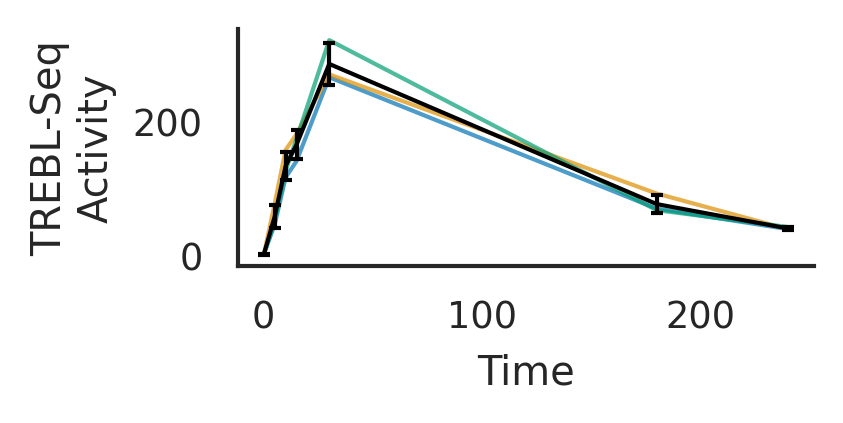

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Filtered dataframe (your existing code)
ad_df = qcdf[qcdf["Name"].str.contains("CITED2_0")]
ad_df = ad_df[ad_df["sample"] == "1"]

# Group by tile, time, and sample
ad_df = (
    ad_df.groupby(["Name", "Activity_SCglucose", "AD_BC", "Tile", "Time"])["Ratio_negCTRLnorm"]
         .agg(["mean", "std"])
         .reset_index()
)

# Ensure Time is numeric
ad_df["Time"] = pd.to_numeric(ad_df["Time"], errors="coerce")
ad_df = ad_df.sort_values(["Name", "Time"])
ad_df = ad_df[ad_df["Tile"].isin(filtered_cat_2["AD"])]

# Compute overall mean and std across tiles at each time
overall = ad_df.groupby("Time").agg(
    mean=("mean", "mean"),  # average of all tile means at this time
    std=("mean", "std")     # std of all tile means at this time
).reset_index()

# Create figure and axis
fig, ax = plt.subplots(figsize=(3, 1.5), dpi=300)

# Palette for individual AD_BC lines
names = ad_df["AD_BC"].unique()
palette_dict = dict(zip(names, sns.color_palette("colorblind", n_colors=len(names))))

# Plot individual AD_BC lines
sns.lineplot(
    data=ad_df,
    x="Time",
    y="mean",
    hue="AD_BC",
    linewidth=1,
    legend=False,
    palette=palette_dict,
    alpha=0.7,
    ax=ax
)

# Overlay overall mean with std as error bars
ax.errorbar(
    overall["Time"],
    overall["mean"],
    yerr=overall["std"],
    color="black",
    linewidth=1,
    capsize=1.5,
    label="Average ± SD"
)

ax.set_xlabel("Time")
ax.set_ylabel("TREBL-Seq\nActivity")
plt.tight_layout()
sns.despine()
plt.show()

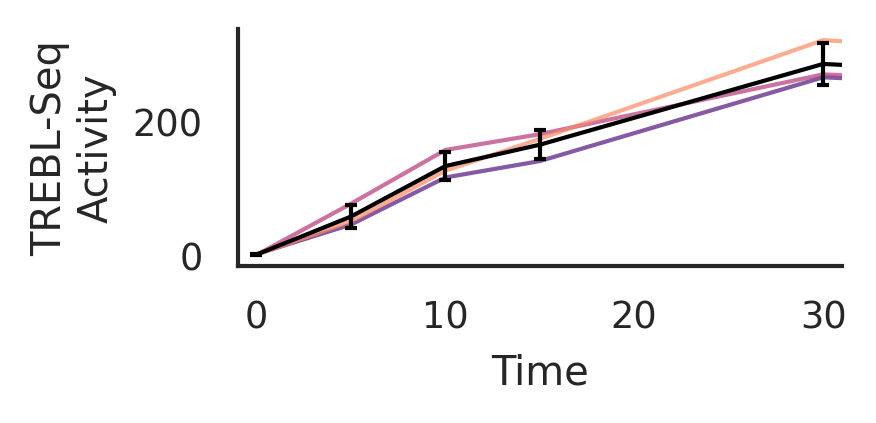

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Filtered dataframe (your existing code)
ad_df = qcdf[qcdf["Name"].str.contains("CITED2_0")]
ad_df = ad_df[ad_df["sample"] == "1"]

# Group by tile, time, and sample
ad_df = (
    ad_df.groupby(["Name", "Activity_SCglucose", "AD_BC", "Tile", "Time"])["Ratio_negCTRLnorm"]
         .agg(["mean", "std"])
         .reset_index()
)

# Ensure Time is numeric
ad_df["Time"] = pd.to_numeric(ad_df["Time"], errors="coerce")
ad_df = ad_df.sort_values(["Name", "Time"])
ad_df = ad_df[ad_df["Tile"].isin(filtered_cat_2["AD"])]

# Compute overall mean and std across tiles at each time
overall = ad_df.groupby("Time").agg(
    mean=("mean", "mean"),  # average of all tile means at this time
    std=("mean", "std")     # std of all tile means at this time
).reset_index()

# Create figure and axis
fig, ax = plt.subplots(figsize=(3, 1.5), dpi=300)

# Palette for individual AD_BC lines
names = ad_df["AD_BC"].unique()
palette_dict = dict(zip(names, sns.color_palette("magma", n_colors=len(names))))

# Plot individual AD_BC lines
sns.lineplot(
    data=ad_df,
    x="Time",
    y="mean",
    hue="AD_BC",
    linewidth=1,
    legend=False,
    palette=palette_dict,
    alpha=0.7,
    ax=ax
)

# Overlay overall mean with std as error bars
ax.errorbar(
    overall["Time"],
    overall["mean"],
    yerr=overall["std"],
    color="black",
    linewidth=1,
    capsize=1.5,
    label="Average ± SD"
)

ax.set_xlabel("Time")
ax.set_ylabel("TREBL-Seq\nActivity")
ax.set_xlim(-1,31)
plt.tight_layout()
sns.despine()
#plt.savefig("../output/grant_resub_figs_v2/fig5.png", bbox_inches="tight")
plt.show()

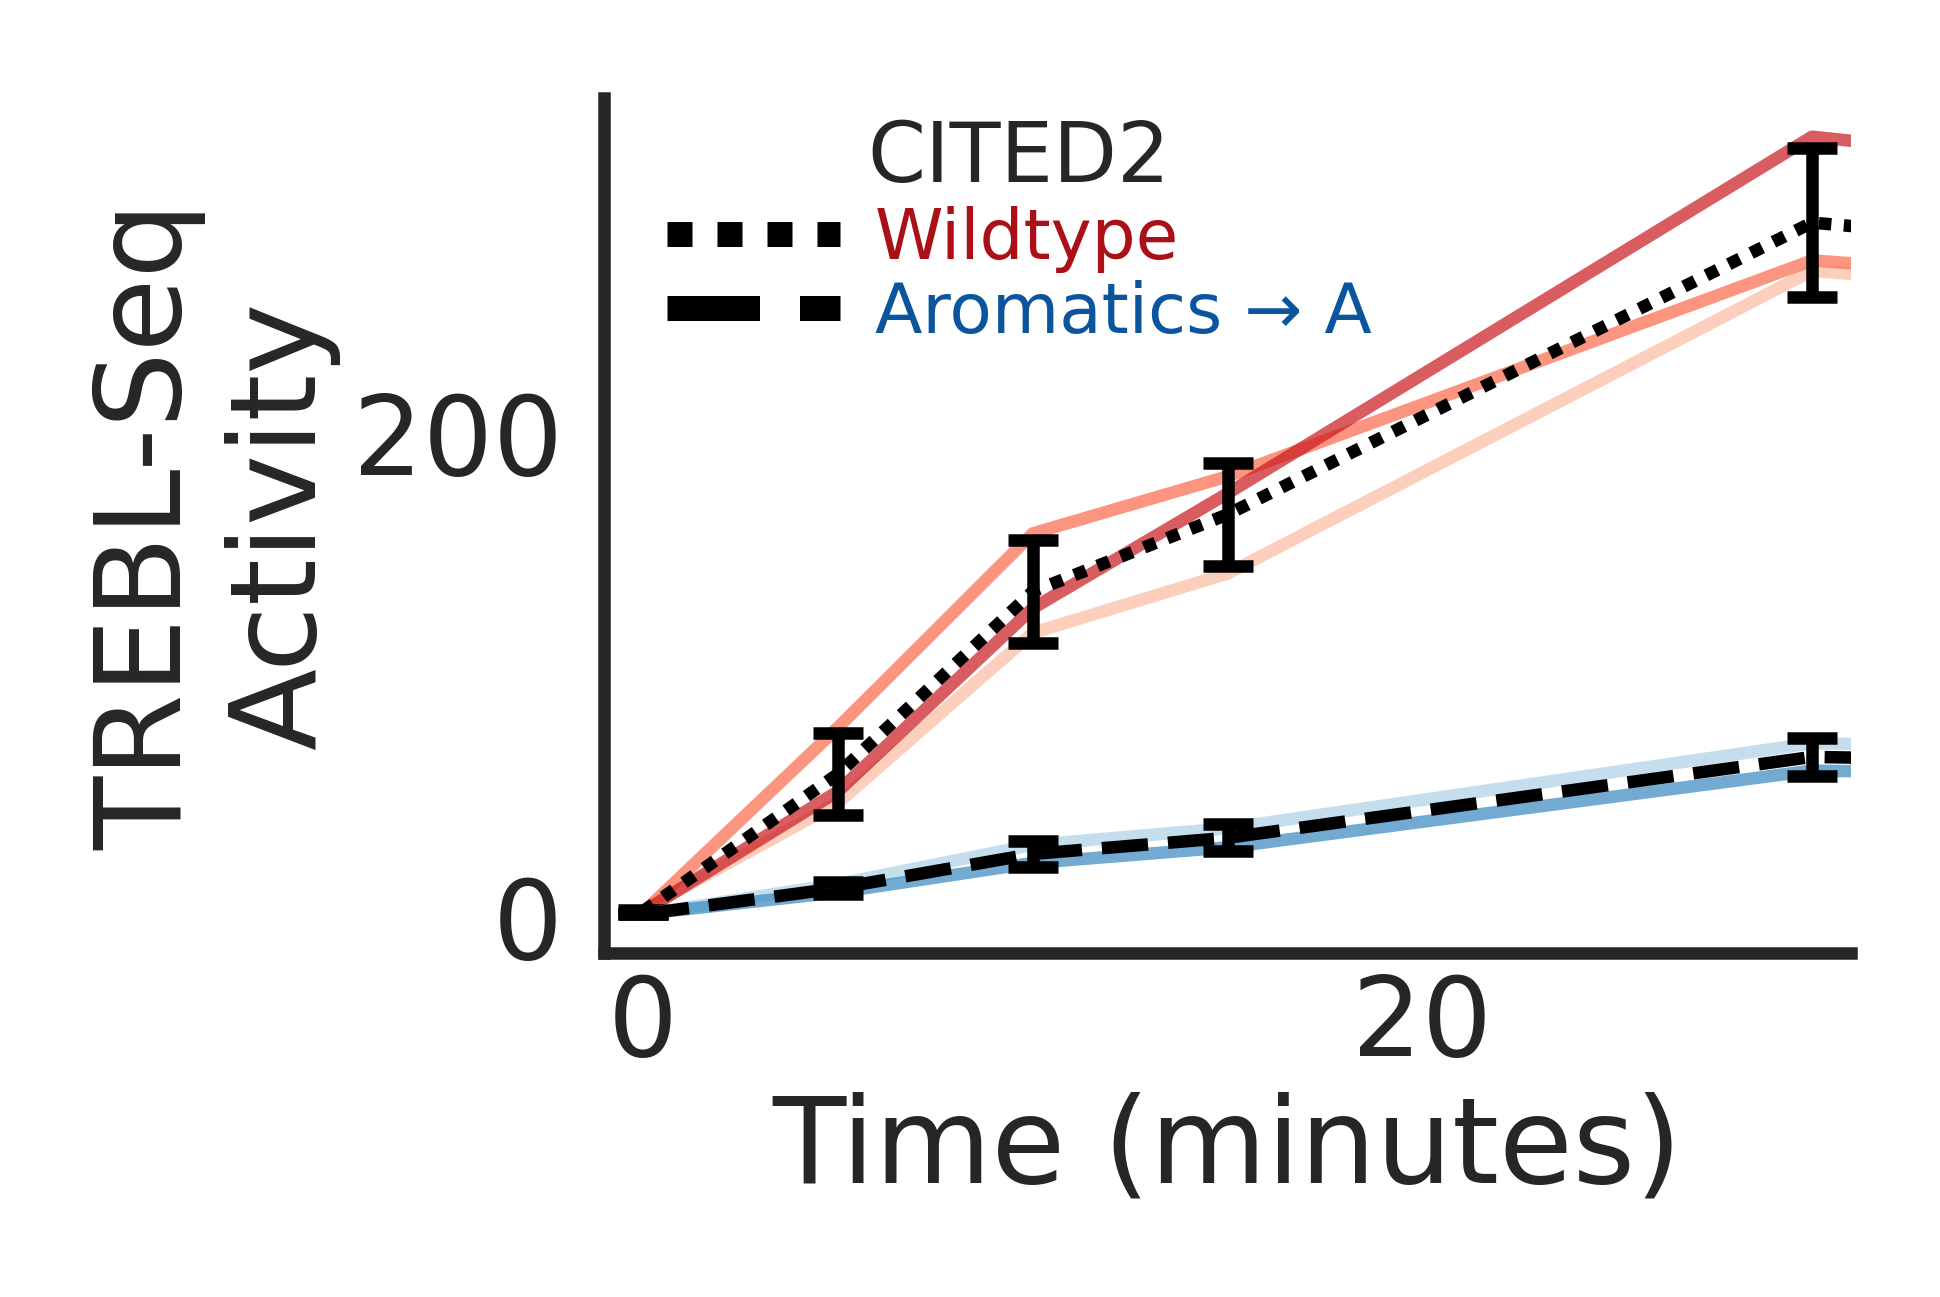

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import pandas as pd
import numpy as np

sns.set_style('white')

# Define the ADs and their line styles
ad_info = {
    "CITED2_0": {"palette": "Reds", "linestyle": (0, (1,1))},        # dotted
    "CITED2_ARO2A_0": {"palette": "Blues", "linestyle": "dashed"} # dashed
}

fig, ax = plt.subplots(figsize=(2.25,1.5), dpi=900)

for ad_name, props in ad_info.items():
    # Filter dataframe
    ad_df = qcdf[qcdf["Name"] == ad_name]
    ad_df = ad_df[ad_df["sample"] == "1"]
    ad_df = ad_df[ad_df["Tile"].isin(filtered_cat_2["AD"])]

    # Group by tile, time, AD_BC
    ad_df_grouped = (
        ad_df.groupby(["AD_BC", "Tile", "Time"])["Ratio_negCTRLnorm"]
             .agg(["mean", "std"])
             .reset_index()
    )

    # Ensure Time numeric
    ad_df_grouped["Time"] = pd.to_numeric(ad_df_grouped["Time"], errors="coerce")
    ad_df_grouped = ad_df_grouped.sort_values(["AD_BC", "Time"])

    # Plot individual tile lines
    names = ad_df_grouped["AD_BC"].unique()
    palette_dict = dict(zip(names, sns.color_palette(props["palette"], n_colors=len(names))))
    sns.lineplot(
        data=ad_df_grouped,
        x="Time",
        y="mean",
        hue="AD_BC",
        palette=palette_dict,
        linewidth=1,
        alpha=0.7,
        legend=False,
        ax=ax
    )

    # Compute overall mean ± std across tiles at each time
    overall = ad_df_grouped.groupby("Time").agg(
        mean=("mean", "mean"),
        std=("mean", "std")
    ).reset_index()

    # Plot overall mean ± SD with specified line style
    ax.errorbar(
        overall["Time"],
        overall["mean"],
        yerr=overall["std"],
        color="black",
        linewidth=1,
        capsize=2,
        linestyle=props["linestyle"]
    )

# Set labels, limits, log scale
ax.set_xlabel("Time (minutes)", labelpad =1)
ax.set_ylabel("TREBL-Seq\nActivity", labelpad =1)
ax.set_xlim(-1,31)
#ax.set_yscale('log')

for label in ax.get_xticklabels():
    label.set_y(0.1)  # move x tick labels closer; adjust value as needed

for label in ax.get_yticklabels():
    label.set_x(0.05)  # move y tick labels closer; adjust value as needed
    
sns.despine()
plt.tight_layout()



# Create custom legend handles
legend_handles = [
    mlines.Line2D([], [], color='black', 
                  linestyle=ad_info["CITED2_0"]["linestyle"], linewidth=2, label="Wildtype"),
    mlines.Line2D([], [], color='black', 
                  linestyle=ad_info["CITED2_ARO2A_0"]["linestyle"], linewidth=2, label="Aromatics → A")
]

# Add legend
leg = ax.legend(handles=legend_handles, 
                fontsize='xx-small', 
                frameon=False, 
                handletextpad=0.5,
               handlelength=2.5,
               labelspacing=0.1, 
                title_fontsize='x-small',  # legend title
               title="CITED2",
                loc='upper left',
    bbox_to_anchor=(0, 1.05)   # shift outside the plot
            )

# Change text color individually
for text, color in zip(leg.get_texts(), [sns.color_palette('Reds')[-1], sns.color_palette('Blues')[-1]]):
    text.set_color(color)

plt.savefig("../output/grant_resub_figs_v2/fig5_linear.pdf", bbox_inches="tight")
plt.savefig("../output/grant_resub_figs_v2/fig5_linear.png", bbox_inches="tight")
plt.show()


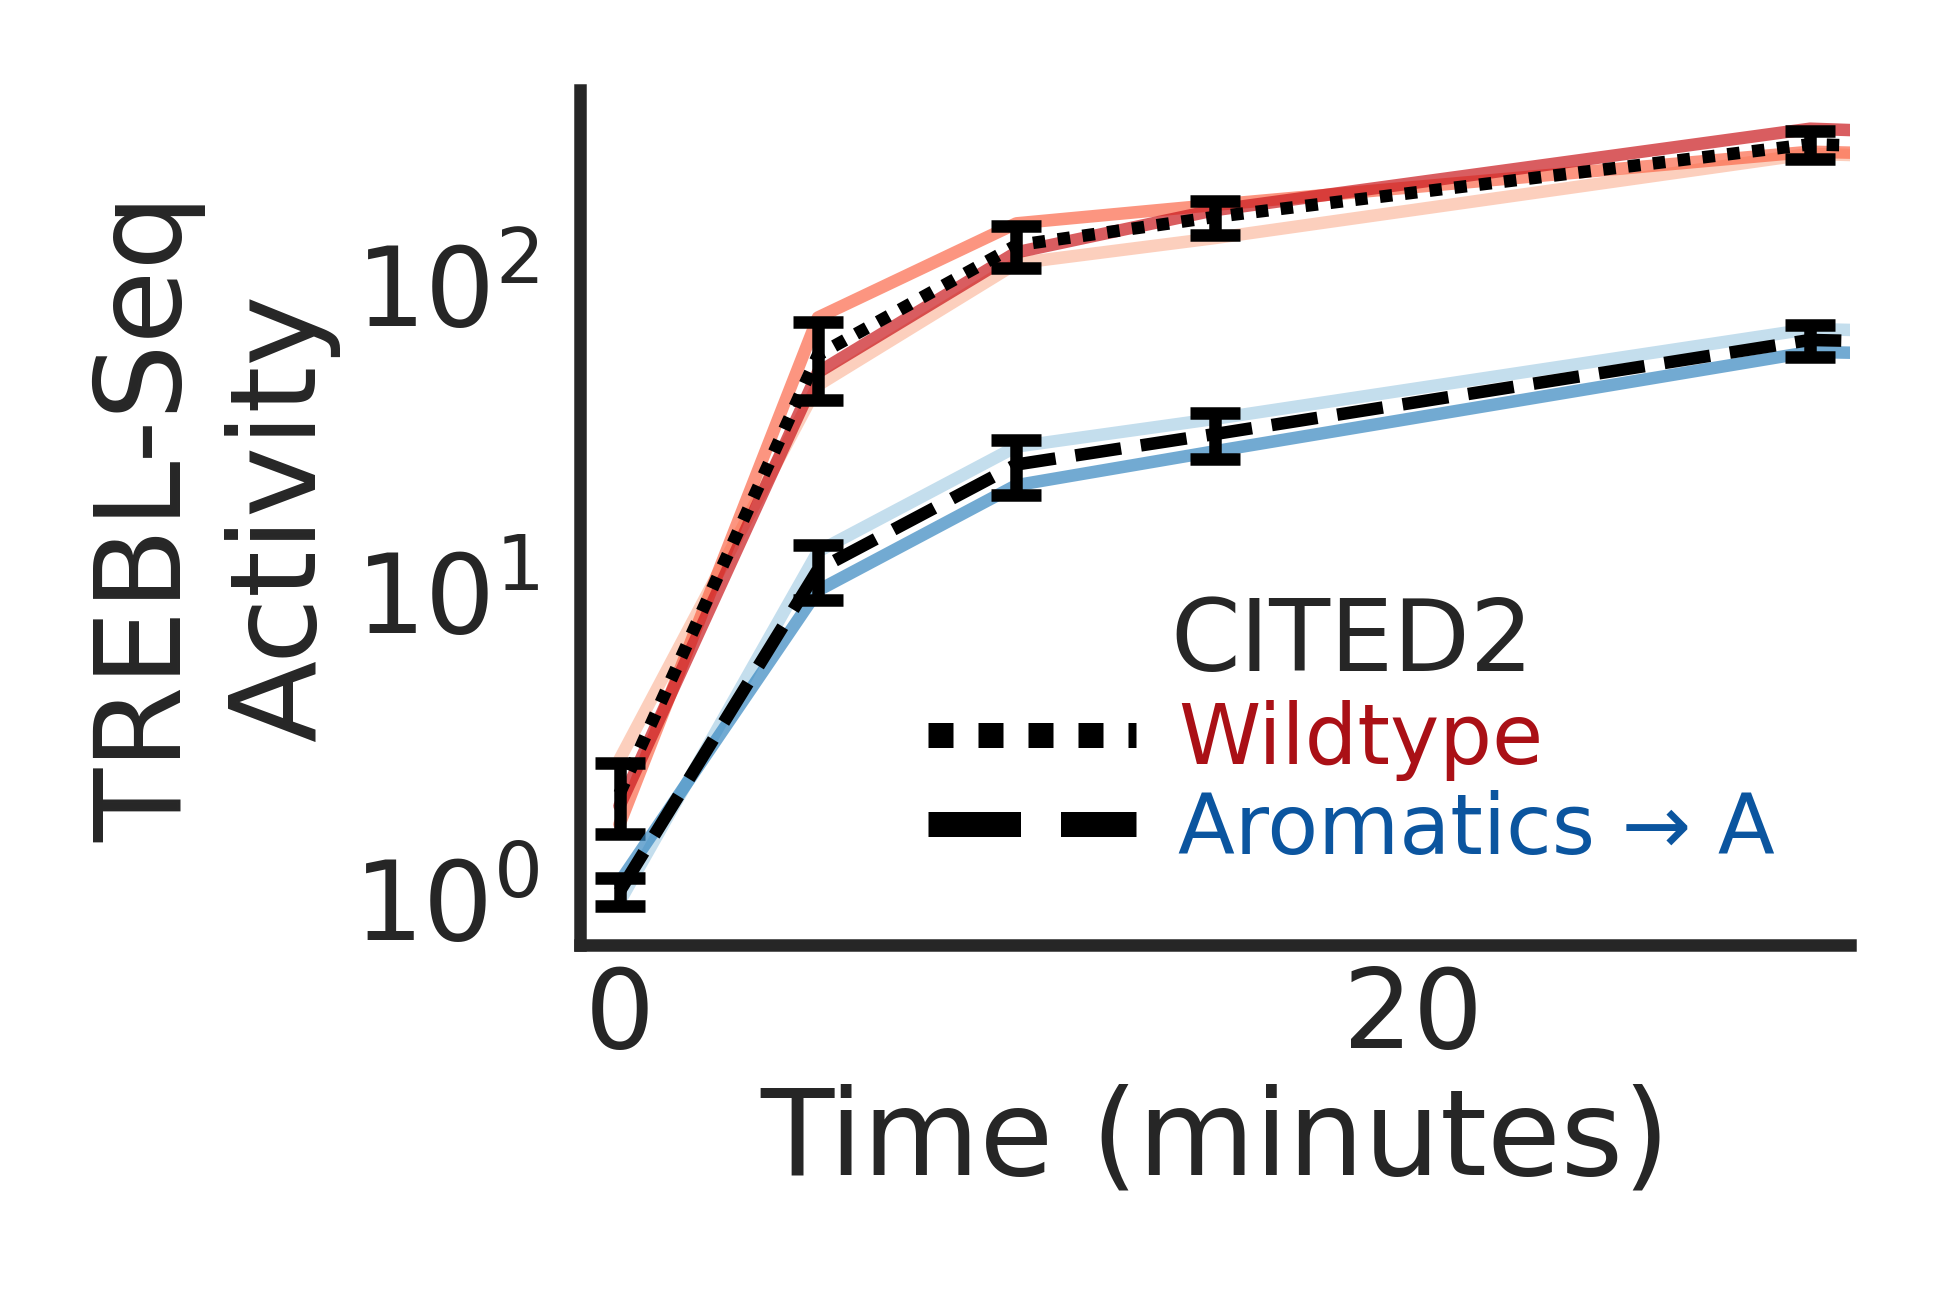

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import pandas as pd
import numpy as np

sns.set_style('white')

# Define the ADs and their line styles
ad_info = {
    "CITED2_0": {"palette": "Reds", "linestyle": (0, (1,1))},        # dotted
    "CITED2_ARO2A_0": {"palette": "Blues", "linestyle": "dashed"} # dashed
}

fig, ax = plt.subplots(figsize=(2.25,1.5), dpi=900)

for ad_name, props in ad_info.items():
    # Filter dataframe
    ad_df = qcdf[qcdf["Name"] == ad_name]
    ad_df = ad_df[ad_df["sample"] == "1"]
    ad_df = ad_df[ad_df["Tile"].isin(filtered_cat_2["AD"])]

    # Group by tile, time, AD_BC
    ad_df_grouped = (
        ad_df.groupby(["AD_BC", "Tile", "Time"])["Ratio_negCTRLnorm"]
             .agg(["mean", "std"])
             .reset_index()
    )

    # Ensure Time numeric
    ad_df_grouped["Time"] = pd.to_numeric(ad_df_grouped["Time"], errors="coerce")
    ad_df_grouped = ad_df_grouped.sort_values(["AD_BC", "Time"])

    # Plot individual tile lines
    names = ad_df_grouped["AD_BC"].unique()
    palette_dict = dict(zip(names, sns.color_palette(props["palette"], n_colors=len(names))))
    sns.lineplot(
        data=ad_df_grouped,
        x="Time",
        y="mean",
        hue="AD_BC",
        palette=palette_dict,
        linewidth=1,
        alpha=0.7,
        legend=False,
        ax=ax
    )

    # Compute overall mean ± std across tiles at each time
    overall = ad_df_grouped.groupby("Time").agg(
        mean=("mean", "mean"),
        std=("mean", "std")
    ).reset_index()

    # Plot overall mean ± SD with specified line style
    ax.errorbar(
        overall["Time"],
        overall["mean"],
        yerr=overall["std"],
        color="black",
        linewidth=1,
        capsize=2,
        linestyle=props["linestyle"]
    )

# Set labels, limits, log scale
ax.set_xlabel("Time (minutes)", labelpad =1)
ax.set_ylabel("TREBL-Seq\nActivity", labelpad =1)
ax.set_xlim(-1,31)
ax.set_yscale('log')

for label in ax.get_xticklabels():
    label.set_y(0.1)  # move x tick labels closer; adjust value as needed

for label in ax.get_yticklabels():
    label.set_x(0.05)  # move y tick labels closer; adjust value as needed
    
sns.despine()
plt.tight_layout()



# Create custom legend handles
legend_handles = [
    mlines.Line2D([], [], color='black', 
                  linestyle=ad_info["CITED2_0"]["linestyle"], linewidth=2, label="Wildtype"),
    mlines.Line2D([], [], color='black', 
                  linestyle=ad_info["CITED2_ARO2A_0"]["linestyle"], linewidth=2, label="Aromatics → A")
]

# Add legend
leg = ax.legend(handles=legend_handles, 
                fontsize='x-small', 
                frameon=False, 
                handletextpad=0.5,
               handlelength=2.5,
               labelspacing=0.1, 
                title_fontsize='small',  # legend title
               title="CITED2",
                loc='lower right'
            )

# Change text color individually
for text, color in zip(leg.get_texts(), [sns.color_palette('Reds')[-1], sns.color_palette('Blues')[-1]]):
    text.set_color(color)

plt.savefig("../output/grant_resub_figs_v2/fig5_log.pdf", bbox_inches="tight")
plt.savefig("../output/grant_resub_figs_v2/fig5_log.png", bbox_inches="tight")
plt.show()


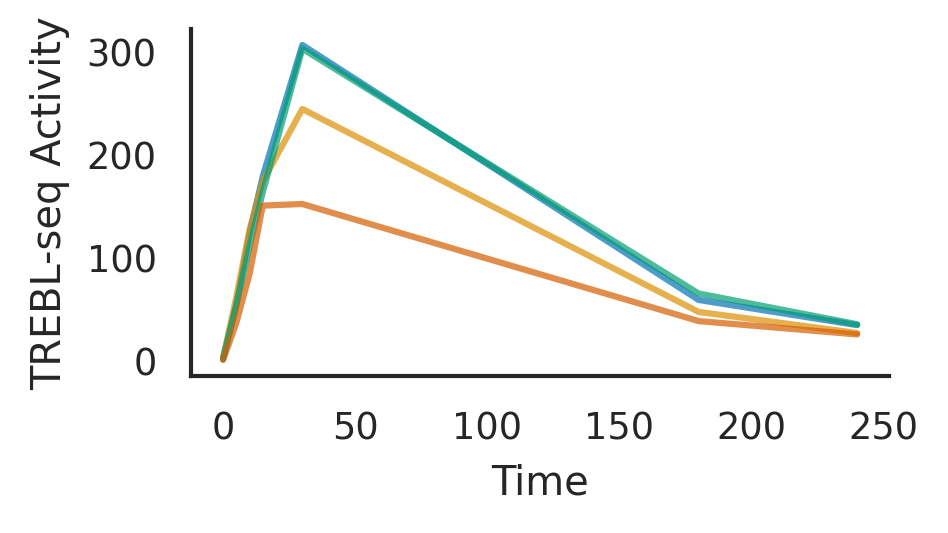

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

ad_df = qcdf[qcdf["Name"].str.contains("Gnc4Lib_ChopOrthologs_HIGH_0")]
ad_df = ad_df[ad_df["sample"] == "2"]

# group by tile, time, and sample
ad_df = (
    ad_df.groupby(["Name", "Activity_SCglucose", "AD_BC", "Tile", "Time"])["Ratio_negCTRLnorm"]
      .agg(["mean", "std"])
      .reset_index()
)

# ensure Time is numeric
ad_df["Time"] = pd.to_numeric(ad_df["Time"], errors="coerce")
ad_df = ad_df.sort_values(["Name", "Time"])
ad_df = ad_df[ad_df["Tile"].isin(filtered_cat_2["AD"])]

# Create a single figure and axis
fig, ax = plt.subplots(figsize=(3,1.5), dpi=300)

# Create palette
names = ad_df["AD_BC"].unique()
palette_dict = dict(zip(names, sns.color_palette("colorblind", n_colors=len(names))))

# Line plot
sns.lineplot(
    data=ad_df,
    x="Time",
    y="mean",
    hue="AD_BC",
    linewidth=1.5,
    legend=False,
    palette=palette_dict,
    alpha=0.7,
    ax=ax
)

# # Your two series
# means = final_means_cat.loc[ad_df["Tile"].iloc[0]]
# stds = std_devs_cat.loc[ad_df["Tile"].iloc[0]]

# # Keep only numeric time indices
# means_numeric = means[means.index.to_series().apply(lambda x: str(x).isdigit())]
# stds_numeric = stds[stds.index.to_series().apply(lambda x: str(x).isdigit())]

# # Convert to int/float
# means_numeric.index = means_numeric.index.astype(int)
# stds_numeric.index = stds_numeric.index.astype(int)
# means_numeric = means_numeric.astype(float)
# stds_numeric = stds_numeric.astype(float)

# # Align on common timepoints
# df = pd.DataFrame({"mean": means_numeric, "std": stds_numeric}).sort_index()

# # Add error bars (overlay on same ax)
# ax.errorbar(
#     df.index,
#     df["mean"],
#     yerr=df["std"],
#     fmt="-o",
#     capsize=3,
#     linewidth=1,
#     markersize=3,
#     color="black"  # or pick from palette_dict if you want it matching
# )

# Labels and style
ax.set_ylabel("TREBL-seq Activity")
#ax.set_title("CITED2", y=0.9)
sns.despine()
#ax.set_ylim(0, None)
# ax.set_xlim(-1,31)
# ax.set_yscale('log')

#plt.savefig("grant_resub_figs/fig5.png", bbox_inches="tight")
plt.show()

# Figure 6: allelic series

In [45]:
gcn4_design = pd.read_csv("../data/Gcn4Array_Design.csv")
gcn4_design_vars = gcn4_design[(gcn4_design["Name"].str.contains("GCN4alt"))].drop_duplicates(subset = "ADseq")
gcn4_design_vars

Unnamed: 0                                     ADseq              Name  \
20687           8  DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIP         GCN4alt_0   
20688           9  DDAVVESAASSSTDSTPMFEYENLEDNSKEWTSLFDNDIP   GCN4alt_FF_AA_0   
20689          10  DDAVVESFFSSSTDSTPAAEAENAEDNSKEWTSLFDNDIP  GCN4alt_MFYL_A_0   
20690          11  DDAVVESFFSSSTDSTPMFEYENLEDNSKEATSAADNDIP   GCN4alt_WLF_A_0   
20691          12  DDAVVESAASSSTDSTPAAEAENAEDNSKEATSAADNDIP   GCN4alt_ALLAS_0   
20692          13  DDAVVESAASSSTDSTPMAEAENLEDNSKEATSLADNDIP   GCN4alt_ARO_A_0   
20693          14  DDAVVESFFSSSTDSTPMFEYENAEDNSKEWTSAFDNDIP     GCN4alt_L_A_0   

                                                ArrayDNA  
20687  GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...  
20688  GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...  
20689  GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...  
20690  GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...  
20691  GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...  
20692  GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...  
20693  GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...

In [46]:
names = ["GCN4alt_0", "GCN4alt_ARO_A_0", "GCN4alt_FF_AA_0", "GCN4alt_MFYL_A_0", "GCN4alt_WLF_A_0"]

In [47]:
#gcn4_comparison = qcdf[qcdf["Name"].isin(gcn4_design_vars["Name"])]
gcn4_comparison = qcdf[qcdf["Name"].isin(names)]
gcn4_comparison

Tile        AD_BC  \
173     GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...  ATTTTTGGATT   
2303    GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...  GTCACCTTTTG   
4540    GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...  GATACCTTAGA   
6924    GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...  ATTTTTGGATT   
8583    GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...  GTCACCTTTTG   
...                                                   ...          ...   
115072  GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...  ATTTTTGGATT   
116620  GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...  GATACCTTAGA   
118243  GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...  ATTTTTGGATT   
119974  GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...  GTCACCTTTTG   
122956  GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...  GATACCTTAGA   

               RPTR_BC  RPTR_UMIs  AD_UMIs  Ratio_negCTRLnorm Time sample  \
173     TAAGTTGCCTGTAG        165      479           3.128311    5      3   
2303    CAACTATACATACC       3412      373          83.073345    5      3   
4540    TCGAACCATTCATT        120     1586           0.687131    5      3   
6924    TAAGTTGCCTGTAG        156      634           2.646424    5      1   
8583    CAACTATACATACC       3497      495          75.982670    5      1   
...                ...        ...      ...                ...  ...    ...   
115072  TAAGTTGCCTGTAG        921      644           4.102879  180      2   
116620  TCGAACCATTCATT        249     1595           0.447872  180      2   
118243  TAAGTTGCCTGTAG        944      720           3.305916  240      1   
119974  CAACTATACATACC       4118      556          18.675138  240      1   
122956  TCGAACCATTCATT        491     2177           0.568690  240      1   

                   Name is_control  Stdev_BYS4_BioReps  Activity_SCglucose  
173     GCN4alt_WLF_A_0        low         4166.906065        32126.202553  
2303          GCN4alt_0       high         3049.781700       258453.390222  
4540    GCN4alt_ARO_A_0        low         2018.945359        13761.263345  
6924    GCN4alt_WLF_A_0        low         4166.906065        32126.202553  
8583          GCN4alt_0       high         3049.781700       258453.390222  
...                 ...        ...                 ...                 ...  
115072  GCN4alt_WLF_A_0        low         4166.906065        32126.202553  
116620  GCN4alt_ARO_A_0        low         2018.945359        13761.263345  
118243  GCN4alt_WLF_A_0        low         4166.906065        32126.202553  
119974        GCN4alt_0       high         3049.781700       258453.390222  
122956  GCN4alt_ARO_A_0        low         2018.945359        13761.263345  

[63 rows x 12 columns]

In [49]:
# group by tile, time, and sample
agg_df = (
    gcn4_comparison.groupby(["Name", "Activity_SCglucose", "Stdev_BYS4_BioReps", "Tile", "Time"])["Ratio_negCTRLnorm"]
      .agg(["mean", "std"])
      .reset_index()
)
agg_df

Name  Activity_SCglucose  Stdev_BYS4_BioReps  \
0         GCN4alt_0       258453.390222         3049.781700   
1         GCN4alt_0       258453.390222         3049.781700   
2         GCN4alt_0       258453.390222         3049.781700   
3         GCN4alt_0       258453.390222         3049.781700   
4         GCN4alt_0       258453.390222         3049.781700   
5         GCN4alt_0       258453.390222         3049.781700   
6         GCN4alt_0       258453.390222         3049.781700   
7   GCN4alt_ARO_A_0        13761.263345         2018.945359   
8   GCN4alt_ARO_A_0        13761.263345         2018.945359   
9   GCN4alt_ARO_A_0        13761.263345         2018.945359   
10  GCN4alt_ARO_A_0        13761.263345         2018.945359   
11  GCN4alt_ARO_A_0        13761.263345         2018.945359   
12  GCN4alt_ARO_A_0        13761.263345         2018.945359   
13  GCN4alt_ARO_A_0        13761.263345         2018.945359   
14  GCN4alt_WLF_A_0        32126.202553         4166.906065   
15  GCN4alt_WLF_A_0        32126.202553         4166.906065   
16  GCN4alt_WLF_A_0        32126.202553         4166.906065   
17  GCN4alt_WLF_A_0        32126.202553         4166.906065   
18  GCN4alt_WLF_A_0        32126.202553         4166.906065   
19  GCN4alt_WLF_A_0        32126.202553         4166.906065   
20  GCN4alt_WLF_A_0        32126.202553         4166.906065   

                                                 Tile Time        mean  \
0   GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...    0    4.315016   
1   GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...   10  126.247939   
2   GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...   15  182.989983   
3   GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...  180   29.130946   
4   GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...  240   16.771738   
5   GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...   30  256.456633   
6   GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...    5   74.563962   
7   GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...    0    0.531558   
8   GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...   10    0.635939   
9   GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...   15    0.583853   
10  GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...  180    0.537760   
11  GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...  240    0.608330   
12  GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...   30    0.544633   
13  GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...    5    0.665972   
14  GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...    0    1.210236   
15  GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...   10    3.359375   
16  GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...   15    5.106224   
17  GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...  180    4.435358   
18  GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...  240    3.085491   
19  GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...   30    7.360456   
20  GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...    5    2.662463   

          std  
0    0.480951  
1   15.041298  
2   12.723474  
3    6.388928  
4    3.940558  
5   35.633499  
6    9.300250  
7    0.206364  
8    0.036218  
9    0.064678  
10   0.077852  
11   0.068920  
12   0.015755  
13   0.067579  
14   0.269587  
15   0.450313  
16   0.229393  
17   0.944459  
18   0.194093  
19   1.083566  
20   0.458039

In [53]:
agg_df.groupby("Name").agg(
    mean_activity=("Activity_SCglucose", "first"),
    stdev=("Stdev_BYS4_BioReps", "first")  # get the corresponding stdev
)

mean_activity        stdev
Name                                       
GCN4alt_0        258453.390222  3049.781700
GCN4alt_ARO_A_0   13761.263345  2018.945359
GCN4alt_WLF_A_0   32126.202553  4166.906065

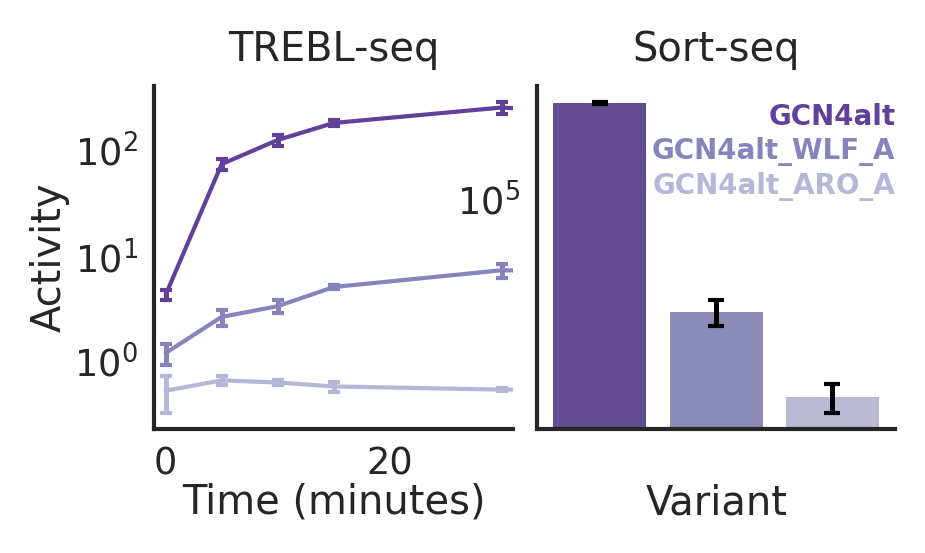

In [60]:
sns.set_style('white')
sns.set_context('paper')
# ensure Time is numeric
agg_df["Time"] = pd.to_numeric(agg_df["Time"], errors="coerce")
agg_df = agg_df.sort_values(["Name", "Time"])

# ----- create palette ordered by decreasing activity -----
# get mean activity for each Name (or first measurement, as in your bar plot)
activity_order = agg_df.groupby("Name")["Activity_SCglucose"].first().sort_values(ascending=False)
names_sorted = activity_order.index.tolist()

# create palette in the same order
palette = dict(zip(names_sorted, sns.color_palette("Purples_r", n_colors=len(names_sorted) + 1)))


# create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(2.5,1.25), dpi =300)

# ----- subplot 1: line plot with error bars -----
ax = axes[0]
sns.lineplot(
    data=agg_df,
    x="Time",
    y="mean",
    hue="Name",
    linewidth=1,
    ax=ax,
    legend=False,         # remove legend here
    markeredgecolor=None, # remove marker edge
    palette=palette
)

# add error bars
for name, sub in agg_df.groupby("Name"):
    ax.errorbar(
        sub["Time"],
        sub["mean"],
        yerr=sub["std"],
        fmt="none",
        capsize=1.5,
        color=palette[name]
    )

ax.set_yscale("log")
ax.set_xlabel("Time (minutes)", labelpad = 0)
ax.set_ylabel("Activity", labelpad = 1)
ax.tick_params(axis='both')
sns.despine(ax=ax)
ax.set_title("TREBL-seq")
ax.set_xlim(-1, 31)

# ----- subplot 2: bar plot sorted decreasing -----
ax2 = axes[1]
activity_df = agg_df.groupby("Name").agg(
    mean_activity=("Activity_SCglucose", "first"),
    stdev=("Stdev_BYS4_BioReps", "first")  # get the corresponding stdev
).sort_values(by = "mean_activity", ascending=False).reset_index()

sns.barplot(
    data=activity_df,
    x="Name",
    y="mean_activity",
    ax=ax2,
    palette={name: palette[name] for name in activity_df["Name"]},
    dodge=False,
    edgecolor = 'none'
)


# add error bars
ax2.errorbar(
    x=range(len(activity_df)),          # bar positions
    y=activity_df["mean_activity"],
    yerr=activity_df["stdev"],
    fmt='none',
    ecolor='black',                     # error bar color
    capsize=2
)

ax2.set_yscale("log")
ax2.set_xlabel("Variant",labelpad = 13)
ax2.set_ylabel("")
ax2.tick_params(axis='y')
ax2.set_xticks([])  # hide x-axis ticks since we have legend text
sns.despine(ax=ax2)
ax2.set_title("Sort-seq")

# ----- custom legend as colored text (top-right of ax2) -----
for i, name in enumerate(activity_df["Name"]):
    ax2.text(
        1, 0.95 - i*0.1,     # x slightly outside, y decreasing
        name[:-2],
        color=palette[name],
        transform=ax2.transAxes,
        fontsize='x-small',
        va='top',
        ha = 'right',
        fontweight = 'bold'
    )

#ax.set_ylim(None, 950)

for label in ax.get_xticklabels():
    label.set_y(0.05)  # move x tick labels closer; adjust value as needed

for label in ax.get_yticklabels():
    label.set_x(0.05)  # move y tick labels closer; adjust value as needed
    
# for label in ax2.get_xticklabels():
#     label.set_y(-10)  # move x tick labels closer; adjust value as needed

for label in ax2.get_yticklabels():
    label.set_x(0.05)  # move y tick labels closer; adjust value as needed
    
plt.tight_layout(pad = -1.5)
plt.savefig("../output/grant_resub_figs_v2/fig6.pdf", dpi=300, bbox_inches="tight")
plt.savefig("../output/grant_resub_figs_v2/fig6.png", dpi=300, bbox_inches="tight")
plt.show()

# Figure 8: Speed vs strength

In [45]:
cols_ordered = final_means_cat.iloc[:, :-3].reindex(sorted(final_means_cat.iloc[:, :-3].columns, key=lambda x: float(x)), axis=1)
cols_ordered

Time                                                       0          5  \
Tile                                                                      
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...  1.254211   1.351119   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...  1.265805   2.077828   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...  1.166629   1.621634   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...  1.984682   0.934068   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...  0.679833   0.959878   
...                                                      ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  1.124169  10.208349   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  1.676623  16.050106   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  1.981525   6.746955   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...  0.492827   0.759847   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...  1.062329   4.878173   

Time                                                       10         15  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.062693   1.532920   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   1.819540   1.700459   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   1.000460   0.730895   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   1.299895   1.467031   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   1.127691   1.071415   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  18.108378  25.314241   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  30.615512  26.635877   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  14.324264  20.019784   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.493409   0.619496   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   5.834273   9.334746   

Time                                                       30        180  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.787659   1.240728   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   1.885667   2.317024   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   0.797948   0.709995   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   1.947597   1.668606   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   1.427080   1.504457   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  38.055564  15.885584   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  73.708402  24.434864   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  42.340589  19.689651   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.649877   0.570966   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...  10.378588   3.606807   

Time                                                      240  
Tile                                                           
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.206545  
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   2.080985  
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   0.732983  
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   1.693269  
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   1.322705  
...                                                       ...  
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  11.023455  
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  17.924639  
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  12.861237  
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.409002  
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   1.934392  

[10934 rows x 7 columns]

In [46]:
linear_t_half = kinetics_analysis.analyze_tiles_lin_parallel(cols_ordered, max_workers = 32)
linear_t_half = pd.concat(linear_t_half)
linear_t_half

 Number of decreasing tiles 0
Increasing dfs:10934
Total dfs:10934


Processing tiles (linear): 100%|██████████| 10934/10934 [00:07<00:00, 1400.88it/s]


T1/2   0   5  10  15  \
Tile                                                                            
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...  14.872564 NaN NaN NaN NaN   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   3.236422 NaN NaN NaN NaN   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...        NaN NaN NaN NaN NaN   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   2.500000 NaN NaN NaN NaN   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   8.940911 NaN NaN NaN NaN   
...                                                       ...  ..  ..  ..  ..   
TTTGGTTCTGAATCTGAATTTAGATCTCAACAACAACAACAACAACA...  23.552820 NaN NaN NaN NaN   
TTTGGTTCTGCTGACTTTGATACTACTGCTGGTGATCCATGGTTTCC...  10.515140 NaN NaN NaN NaN   
TTTGTCTTGTTGTCTTTGTTTCCAAATGGTTTGTTGCCAGATGGTCA...   9.273422 NaN NaN NaN NaN   
TTTGTTAAACAAGAATCTCCAGCTTTGGCTGAATTGGCTTTGTGTAA...  17.496505 NaN NaN NaN NaN   
TTTGTTCCAGCTGCTTATCATTATCCAGCTCCACCACCAATGATGCC...  64.472156 NaN NaN NaN NaN   

                                                    30  180  240  
Tile                                                              
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA... NaN  NaN  NaN  
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA... NaN  NaN  NaN  
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA... NaN  NaN  NaN  
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG... NaN  NaN  NaN  
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG... NaN  NaN  NaN  
...                                                 ..  ...  ...  
TTTGGTTCTGAATCTGAATTTAGATCTCAACAACAACAACAACAACA... NaN  NaN  NaN  
TTTGGTTCTGCTGACTTTGATACTACTGCTGGTGATCCATGGTTTCC... NaN  NaN  NaN  
TTTGTCTTGTTGTCTTTGTTTCCAAATGGTTTGTTGCCAGATGGTCA... NaN  NaN  NaN  
TTTGTTAAACAAGAATCTCCAGCTTTGGCTGAATTGGCTTTGTGTAA... NaN  NaN  NaN  
TTTGTTCCAGCTGCTTATCATTATCCAGCTCCACCACCAATGATGCC... NaN  NaN  NaN  

[10934 rows x 8 columns]

In [47]:
linear_slope_intercept = kinetics_analysis.analyze_tiles_parallel_slope_intercept(cols_ordered, max_workers = 32)
linear_slope_intercept

 Number of decreasing tiles 0
Increasing dfs:10934
Total dfs:10934


Processing tiles: 100%|██████████| 10934/10934 [00:08<00:00, 1324.55it/s]


Slope  Intercept
Tile                                                                    
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   0.019137   1.168071
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   0.003537   1.702894
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   0.091001   1.166629
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   0.003116   1.003739
AAACAATTGCAATGGAAACAATTTCAGAATTATCAAAGAAGAAGATT...   0.126292   0.989327
...                                                       ...        ...
TTTGGTTCTGGATTTGATGTTTCTCCAAACTTTGCTGGTTCTGACTT...  32.767884 -40.148184
TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTGC...   0.008586   1.763131
TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATAG...   0.008334   2.072454
TTTGTTATTGGTTCTCAAATTGCTGGTCATGAGAAGATCTTGCAAGA...   0.000000   0.691670
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...   1.363273   0.723353

[10934 rows x 2 columns]

In [48]:
final_means_cat = pd.merge(final_means_cat, linear_t_half[["T1/2"]], left_index = True, right_index=True, how = 'left')
final_means_cat

0         10  \
Tile                                                                      
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...  1.254211   1.062693   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...  1.265805   1.819540   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...  1.166629   1.000460   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...  1.984682   1.299895   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...  0.679833   1.127691   
...                                                      ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  1.124169  18.108378   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  1.676623  30.615512   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  1.981525  14.324264   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...  0.492827   0.493409   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...  1.062329   5.834273   

                                                           15        180  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.532920   1.240728   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   1.700459   2.317024   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   0.730895   0.709995   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   1.467031   1.668606   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   1.071415   1.504457   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  25.314241  15.885584   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  26.635877  24.434864   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  20.019784  19.689651   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.619496   0.570966   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   9.334746   3.606807   

                                                          240         30  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.206545   1.787659   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   2.080985   1.885667   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   0.732983   0.797948   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   1.693269   1.947597   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   1.322705   1.427080   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  11.023455  38.055564   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  17.924639  73.708402   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  12.861237  42.340589   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.409002   0.649877   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   1.934392  10.378588   

                                                            5       Vmax  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.351119   1.787659   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   2.077828   2.317024   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   1.621634   1.621634   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   0.934068   1.984682   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   0.959878   1.504457   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  10.208349  38.055564   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  16.050106  73.708402   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...   6.746955  42.340589   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.759847   0.759847   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   4.878173  10.378588   

                                                    Avg_StdDev  Activity  \
Tile                                    

In [49]:
final_means_cat = pd.merge(final_means_cat, linear_slope_intercept[["Slope", "Intercept"]], left_index = True, right_index=True, how = 'left')
final_means_cat

0         10  \
Tile                                                                      
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...  1.254211   1.062693   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...  1.265805   1.819540   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...  1.166629   1.000460   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...  1.984682   1.299895   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...  0.679833   1.127691   
...                                                      ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  1.124169  18.108378   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  1.676623  30.615512   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  1.981525  14.324264   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...  0.492827   0.493409   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...  1.062329   5.834273   

                                                           15        180  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.532920   1.240728   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   1.700459   2.317024   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   0.730895   0.709995   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   1.467031   1.668606   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   1.071415   1.504457   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  25.314241  15.885584   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  26.635877  24.434864   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  20.019784  19.689651   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.619496   0.570966   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   9.334746   3.606807   

                                                          240         30  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.206545   1.787659   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   2.080985   1.885667   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   0.732983   0.797948   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   1.693269   1.947597   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   1.322705   1.427080   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  11.023455  38.055564   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  17.924639  73.708402   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  12.861237  42.340589   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.409002   0.649877   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   1.934392  10.378588   

                                                            5       Vmax  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.351119   1.787659   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   2.077828   2.317024   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   1.621634   1.621634   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   0.934068   1.984682   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   0.959878   1.504457   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  10.208349  38.055564   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  16.050106  73.708402   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...   6.746955  42.340589   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.759847   0.759847   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   4.878173  10.378588   

                                                    Avg_StdDev  Activity  \
Tile                                    

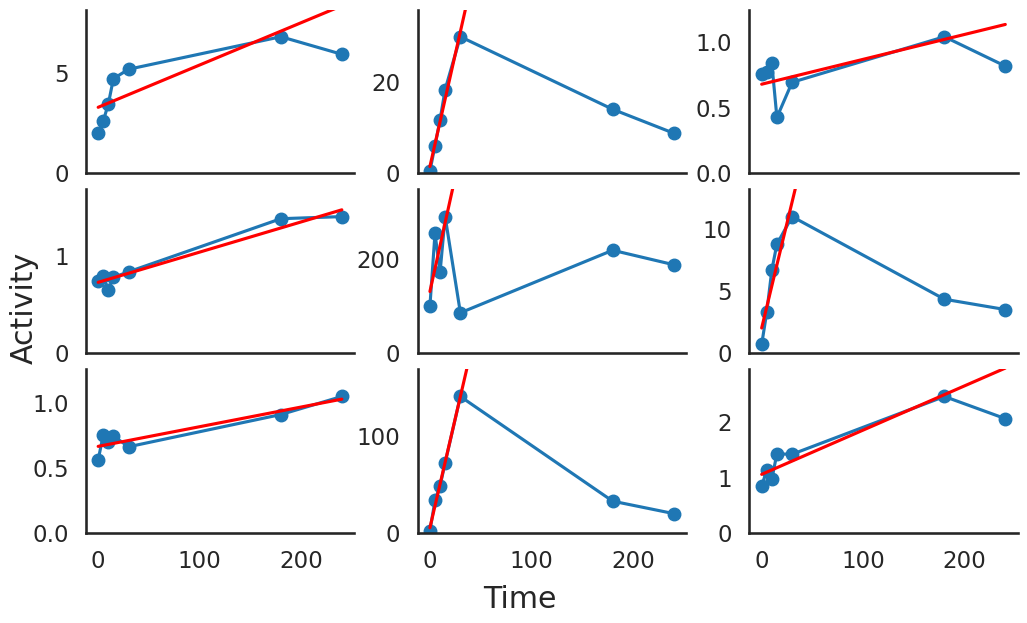

In [50]:
# Define time points (column names that are numeric)
time_cols = ['0', '5', '10', '15', '30', '180', '240']
time_points = np.array(time_cols, dtype=float)

# Sample 9 random rows
sample_rows = final_means_cat.sample(9)

sns.set_context('talk')
# Create 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(10,6), sharex = True)
axes = axes.flatten()

for ax, (_, row) in zip(axes, sample_rows.iterrows()):
    tile_name = row.name
    activity = row[time_cols].values.flatten()
    slope = row['Slope']
    intercept = row['Intercept']
    fit_line = slope * time_points + intercept

    # Plot observed and fit
    ax.plot(time_points, activity, 'o-', label='Observed')
    ax.plot(time_points, fit_line, 'r-', label='Fit')
    #ax.set_title(tile_name, fontsize=10)
    ax.set_xlabel('Time')
    ax.set_ylabel('Activity')
    ax.set_ylim(0, max(activity) * 1.2)
    ax.set_xlabel("")
    ax.set_ylabel("")

fig.supxlabel("Time", y = -0.01)
fig.supylabel("Activity", x = -0.01)

sns.despine()
plt.tight_layout(pad=0.1)
plt.show()

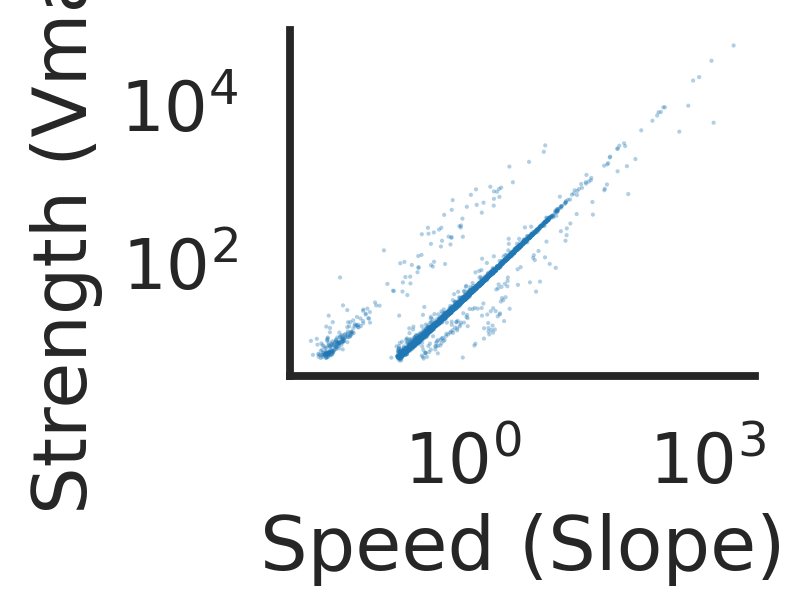

In [51]:
## ACTIVE TILES ONLY
plt.figure(dpi = 300, figsize= (2,1.5))
ax = sns.scatterplot(data=final_means_cat[final_means_cat["Activity"] == "active"], 
                     x = "Slope", y = "Vmax", alpha=0.35, s=1, edgecolor = 'none')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Speed (Slope)")
ax.set_ylabel("Strength (Vmax)")
sns.despine()
# plt.savefig("grant_resub_figs/fig8.png", dpi=300, bbox_inches="tight")

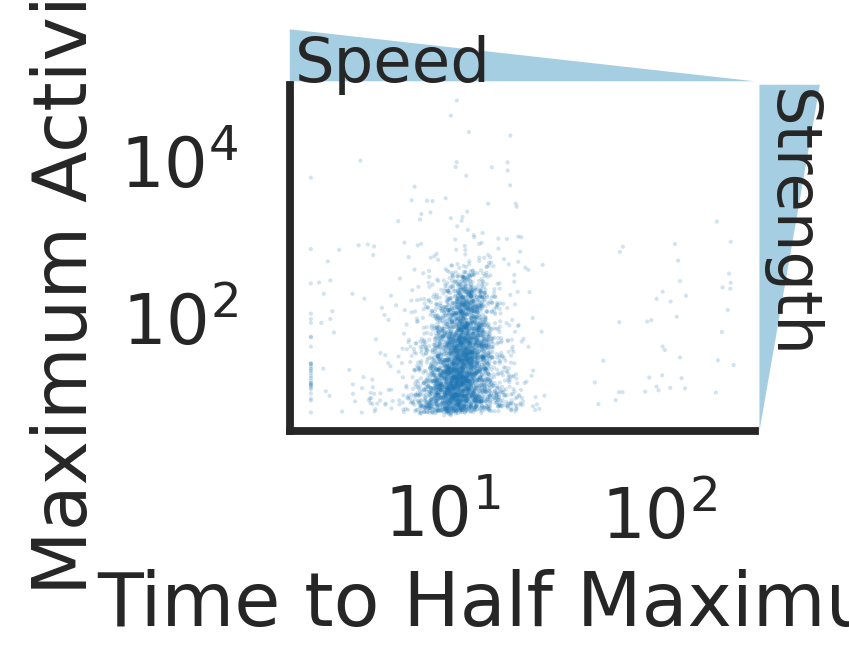

In [52]:
import matplotlib.patches as patches


blue_color = sns.color_palette('Paired')[0]

plt.figure(figsize=(2,1.5), dpi = 300)
ax = sns.scatterplot(
    data=final_means_cat[final_means_cat["Activity"] == "active"], 
    x="T1/2", y="Vmax", alpha=0.2, s=1, edgecolor='none'
)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Time to Half Maximum")
ax.set_ylabel("Maximum Activity")

# --- Add big ramp triangles ---
# Top ramp (Strength ↑)
strength_ramp = patches.Polygon(
    [[0, 1.01], [1, 1.01], [0, 1.16]],   # x,y in axes coords
    transform=ax.transAxes, clip_on=False,
    facecolor=blue_color, alpha=1, edgecolor="none"
)
ax.add_patch(strength_ramp)
ax.text(0.01, 1.06, "Speed", transform=ax.transAxes,
        ha="left", va="center", fontsize='small')

# Right ramp (Speed ↑, since x is inverted)
speed_ramp = patches.Polygon(
    [[1.01, 0], [1.14, 1], [1.01, 1]],   # x,y in axes coords
    transform=ax.transAxes, clip_on=False,
    facecolor=blue_color, alpha=1, edgecolor="none"
)
ax.add_patch(speed_ramp)
ax.text(1.01, 0.99, "Strength", transform=ax.transAxes,
        ha="left", va="top", fontsize='small', rotation=-90)

sns.despine()
plt.savefig("../output/grant_resub_figs_v2/fig8.png", dpi=300, bbox_inches="tight")


In [53]:
# ## ACTIVE TILES ONLY
# plt.figure(dpi = 300, figsize= (2,1.5))
# ax = sns.scatterplot(data=final_means_cat, 
#                      x = "T1/2", y = "Vmax", alpha=0.15, s=1, edgecolor = 'none')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlabel("Speed (T1/2)")
# ax.set_ylabel("Strength (Vmax)")
# ax.invert_xaxis()
# sns.despine()
# #plt.savefig("grant_resub_figs/fig8.png", dpi=300, bbox_inches="tight")

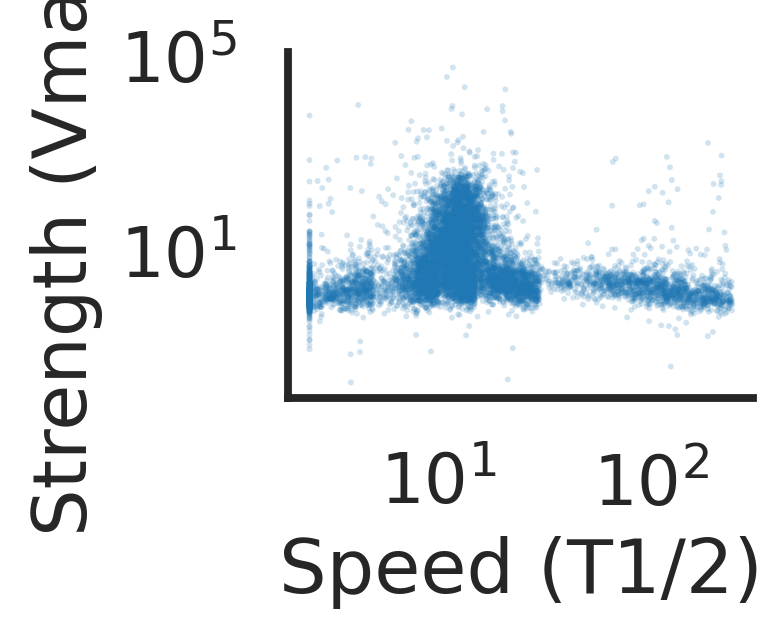

In [54]:
## ACTIVE AND INACTIVE TILES
plt.figure(dpi = 300, figsize= (2,1.5))
ax = sns.scatterplot(data=final_means_cat, 
                     x = "T1/2", y = "Vmax", alpha=0.2, s=2, edgecolor = 'none')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Speed (T1/2)")
ax.set_ylabel("Strength (Vmax)")
sns.despine()


# Hill fit, figure 8

In [55]:
cols_ordered

Time                                                       0          5  \
Tile                                                                      
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...  1.254211   1.351119   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...  1.265805   2.077828   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...  1.166629   1.621634   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...  1.984682   0.934068   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...  0.679833   0.959878   
...                                                      ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  1.124169  10.208349   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  1.676623  16.050106   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  1.981525   6.746955   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...  0.492827   0.759847   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...  1.062329   4.878173   

Time                                                       10         15  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.062693   1.532920   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   1.819540   1.700459   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   1.000460   0.730895   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   1.299895   1.467031   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   1.127691   1.071415   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  18.108378  25.314241   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  30.615512  26.635877   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  14.324264  20.019784   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.493409   0.619496   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   5.834273   9.334746   

Time                                                       30        180  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.787659   1.240728   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   1.885667   2.317024   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   0.797948   0.709995   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   1.947597   1.668606   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   1.427080   1.504457   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  38.055564  15.885584   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  73.708402  24.434864   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  42.340589  19.689651   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.649877   0.570966   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...  10.378588   3.606807   

Time                                                      240  
Tile                                                           
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.206545  
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   2.080985  
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   0.732983  
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   1.693269  
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   1.322705  
...                                                       ...  
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  11.023455  
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  17.924639  
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  12.861237  
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.409002  
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   1.934392  

[10934 rows x 7 columns]

In [56]:
hill_t_half = kinetics_analysis.analyze_tiles_parallel_hill_only(cols_ordered, n_jobs = 32)
hill_t_half = pd.concat(hill_t_half)[["Hill_T1/2"]]
hill_t_half

 Number of decreasing tiles 0
Increasing dfs:10934
Total dfs:10934


Analyzing tiles: 100%|██████████| 10934/10934 [08:39<00:00, 21.06it/s]


Hill_T1/2
Tile                                                         
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...        NaN
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...        NaN
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...        NaN
AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATTT...  14.213885
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...        NaN
...                                                       ...
TTTGTCTTGTTTGATCAACCAACTCATCCAAATAATTTGCCTAAGAG...        NaN
TTTGTCTTGTTGTCTTTGTTTCCAAATGGTTTGTTGCCAGATGGTCA...        NaN
TTTGTTAAATCTTTGAAAGGTAGGAAACCATTGACTGGTGTTGCTTT...        NaN
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...        NaN
TTTGTCTTGTTTCCATCTACTGCTCCAAATCCAGCTACTTCTACTAC...        NaN

[10934 rows x 1 columns]

In [57]:
hill_t_half.dropna()

Hill_T1/2
Tile                                                         
AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATTT...  14.213885
AAACCATTCTATGAAGAATGTTCTAACTTTCAATACTTCTCTCCACA...  13.692257
AAACAATTGGCTTTGTATTCTAGATCTGGTTTGAGATCTCATTCTAC...  19.857544
AAACACTTTGCTGTTGAAGATTTGAGAATCTTGGAATCTGGTTTGAC...  22.144820
AAACCAGAAATTATTGGTGAATTGTCTTGTCATTTGCCAACTGCTGG...  12.797085
...                                                       ...
TTTGATTCTCCAGATGTTGCTGAATCATTTGAAACTTCTCCATTGTT...  14.463049
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  16.255263
TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTGC...  41.331135
TTTGTTCCAGCTGCTTATCATTATCCAGCTCCACCACCAATGATGCC...  57.194735
TTTGTTAAACAAGAATCTCCAGCTTTGGCTGAATTGGCTTTGTGTAA...  14.778897

[5434 rows x 1 columns]

In [58]:
final_means_cat = pd.merge(final_means_cat, hill_t_half[["Hill_T1/2"]], left_index = True, right_index=True, how = 'left')
final_means_cat

0         10  \
Tile                                                                      
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...  1.254211   1.062693   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...  1.265805   1.819540   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...  1.166629   1.000460   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...  1.984682   1.299895   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...  0.679833   1.127691   
...                                                      ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  1.124169  18.108378   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  1.676623  30.615512   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  1.981525  14.324264   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...  0.492827   0.493409   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...  1.062329   5.834273   

                                                           15        180  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.532920   1.240728   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   1.700459   2.317024   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   0.730895   0.709995   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   1.467031   1.668606   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   1.071415   1.504457   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  25.314241  15.885584   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  26.635877  24.434864   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  20.019784  19.689651   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.619496   0.570966   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   9.334746   3.606807   

                                                          240         30  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.206545   1.787659   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   2.080985   1.885667   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   0.732983   0.797948   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   1.693269   1.947597   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   1.322705   1.427080   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  11.023455  38.055564   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  17.924639  73.708402   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  12.861237  42.340589   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.409002   0.649877   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   1.934392  10.378588   

                                                            5       Vmax  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.351119   1.787659   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   2.077828   2.317024   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   1.621634   1.621634   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   0.934068   1.984682   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   0.959878   1.504457   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  10.208349  38.055564   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  16.050106  73.708402   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...   6.746955  42.340589   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.759847   0.759847   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   4.878173  10.378588   

                                                    Avg_StdDev  Activity  \
Tile                                    

In [59]:
final_means_cat.to_csv("../output/EC_data_with_hill_t_half.csv")

In [3]:
final_means_cat = pd.read_csv("../output/EC_data_with_hill_t_half.csv")
final_means_cat

Tile         0         10  \
0      AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...  1.254211   1.062693   
1      AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...  1.265805   1.819540   
2      AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATA...  1.166629   1.000460   
3      AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTC...  1.984682   1.299895   
4      AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGAT...  0.679833   1.127691   
...                                                  ...       ...        ...   
10929  TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTC...  1.124169  18.108378   
10930  TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATG...  1.676623  30.615512   
10931  TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCAT...  1.981525  14.324264   
10932  TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTA...  0.492827   0.493409   
10933  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...  1.062329   5.834273   

              15        180        240         30          5       Vmax  \
0       1.532920   1.240728   1.206545   1.787659   1.351119   1.787659   
1       1.700459   2.317024   2.080985   1.885667   2.077828   2.317024   
2       0.730895   0.709995   0.732983   0.797948   1.621634   1.621634   
3       1.467031   1.668606   1.693269   1.947597   0.934068   1.984682   
4       1.071415   1.504457   1.322705   1.427080   0.959878   1.504457   
...          ...        ...        ...        ...        ...        ...   
10929  25.314241  15.885584  11.023455  38.055564  10.208349  38.055564   
10930  26.635877  24.434864  17.924639  73.708402  16.050106  73.708402   
10931  20.019784  19.689651  12.861237  42.340589   6.746955  42.340589   
10932   0.619496   0.570966   0.409002   0.649877   0.759847   0.759847   
10933   9.334746   3.606807   1.934392  10.378588   4.878173  10.378588   

       Avg_StdDev  Activity       T1/2     Slope  Intercept  Hill_T1/2  
0        0.431083  inactive  14.872564  0.019137   1.168071        NaN  
1        0.356520  inactive   3.236422  0.003537   1.702894        NaN  
2        0.269212  inactive   2.500000  0.091001   1.166629        NaN  
3        0.981397  inactive        NaN  0.000000   1.984682        NaN  
4        0.396125  inactive   8.940911  0.003116   1.003739        NaN  
...           ...       ...        ...       ...        ...        ...  
10929    2.313608    active  11.027974  1.207128   4.076608  11.037016  
10930    6.074092    active  18.523277  2.288599   2.274113        NaN  
10931    2.990464    active  16.438976  1.363273   0.723353  16.255263  
10932    0.197610  inactive   2.500000  0.053404   0.492827        NaN  
10933    2.099788    active   9.404795  0.294821   2.759770   8.235146  

[10934 rows x 15 columns]

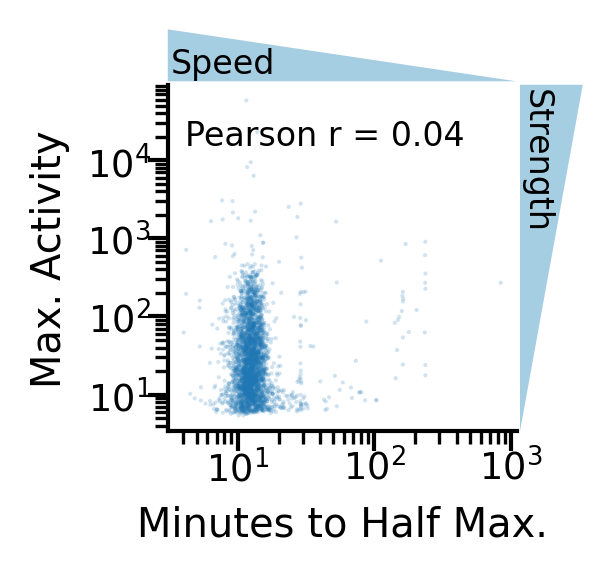

In [4]:
import matplotlib.patches as patches
from scipy.stats import pearsonr

sns.set_context('paper')

blue_color = sns.color_palette('Paired')[0]

# --- Filter data for active variants ---
df = final_means_cat[final_means_cat["Activity"] == "active"].copy()

plt.figure(figsize=(1.5,1.5), dpi=300)
ax = sns.scatterplot(
    data=df,
    x="Hill_T1/2", y="Vmax",
    alpha=0.2, s=1, edgecolor='none'
)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Minutes to Half Max.")
ax.set_ylabel("Max. Activity")

# --- Compute Pearson correlation (on log values to match plot) ---
valid = df[["Hill_T1/2", "Vmax"]].replace([np.inf, -np.inf], np.nan).dropna()
x_log = np.log10(valid["Hill_T1/2"])
y_log = np.log10(valid["Vmax"])
r, _ = pearsonr(x_log, y_log)

# Add text annotation (Pearson r only)
ax.text(
    0.05, 0.9, f"Pearson r = {r:.2f}",
    transform=ax.transAxes,
    fontsize="small", ha="left", va="top"
)

# --- Add big ramp triangles ---
# Top ramp (Speed ↑)
strength_ramp = patches.Polygon(
    [[0, 1.01], [1, 1.01], [0, 1.16]],
    transform=ax.transAxes, clip_on=False,
    facecolor=blue_color, alpha=1, edgecolor="none"
)
ax.add_patch(strength_ramp)
ax.text(0.01, 1.06, "Speed", transform=ax.transAxes,
        ha="left", va="center", fontsize='small')

# Right ramp (Strength ↑)
speed_ramp = patches.Polygon(
    [[1.01, 0], [1.19, 1], [1.01, 1]],
    transform=ax.transAxes, clip_on=False,
    facecolor=blue_color, alpha=1, edgecolor="none"
)
ax.add_patch(speed_ramp)
ax.text(1.01, 0.99, "Strength", transform=ax.transAxes,
        ha="left", va="top", fontsize='small', rotation=-90)

# Move tick labels slightly inward
for label in ax.get_xticklabels():
    label.set_y(0.05)

for label in ax.get_yticklabels():
    label.set_x(0.05)

sns.despine()
plt.savefig("../output/grant_resub_figs_v2/fig8_option2.pdf", dpi=300, bbox_inches="tight")
plt.savefig("../output/grant_resub_figs_v2/fig8_option2.png", dpi=300, bbox_inches="tight")
plt.show()

# What is the range of TREBL scores at each time point?

In [4]:
final_means_cat

Tile         0         10  \
0      AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...  1.254211   1.062693   
1      AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...  1.265805   1.819540   
2      AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATA...  1.166629   1.000460   
3      AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTC...  1.984682   1.299895   
4      AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGAT...  0.679833   1.127691   
...                                                  ...       ...        ...   
10929  TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTC...  1.124169  18.108378   
10930  TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATG...  1.676623  30.615512   
10931  TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCAT...  1.981525  14.324264   
10932  TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTA...  0.492827   0.493409   
10933  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...  1.062329   5.834273   

              15        180        240         30          5       Vmax  \
0       1.532920   1.240728   1.206545   1.787659   1.351119   1.787659   
1       1.700459   2.317024   2.080985   1.885667   2.077828   2.317024   
2       0.730895   0.709995   0.732983   0.797948   1.621634   1.621634   
3       1.467031   1.668606   1.693269   1.947597   0.934068   1.984682   
4       1.071415   1.504457   1.322705   1.427080   0.959878   1.504457   
...          ...        ...        ...        ...        ...        ...   
10929  25.314241  15.885584  11.023455  38.055564  10.208349  38.055564   
10930  26.635877  24.434864  17.924639  73.708402  16.050106  73.708402   
10931  20.019784  19.689651  12.861237  42.340589   6.746955  42.340589   
10932   0.619496   0.570966   0.409002   0.649877   0.759847   0.759847   
10933   9.334746   3.606807   1.934392  10.378588   4.878173  10.378588   

       Avg_StdDev  Activity       T1/2     Slope  Intercept  Hill_T1/2  
0        0.431083  inactive  14.872564  0.019137   1.168071        NaN  
1        0.356520  inactive   3.236422  0.003537   1.702894        NaN  
2        0.269212  inactive   2.500000  0.091001   1.166629        NaN  
3        0.981397  inactive        NaN  0.000000   1.984682        NaN  
4        0.396125  inactive   8.940911  0.003116   1.003739        NaN  
...           ...       ...        ...       ...        ...        ...  
10929    2.313608    active  11.027974  1.207128   4.076608  11.037016  
10930    6.074092    active  18.523277  2.288599   2.274113        NaN  
10931    2.990464    active  16.438976  1.363273   0.723353  16.255263  
10932    0.197610  inactive   2.500000  0.053404   0.492827        NaN  
10933    2.099788    active   9.404795  0.294821   2.759770   8.235146  

[10934 rows x 15 columns]

In [5]:
final_means_cat_range = final_means_cat[["0","5","10","15","30","180","240"]].describe()
final_means_cat_range = final_means_cat_range.T
final_means_cat_range = final_means_cat_range.reset_index()
final_means_cat_range  = final_means_cat_range.rename(columns = {"index" : "time"})
final_means_cat_range["time"] = final_means_cat_range["time"].astype(int)
final_means_cat_range["strength_ratio"] = final_means_cat_range["max"] / final_means_cat_range["min"]
final_means_cat_range

time    count       mean         std       min       25%       50%  \
0     0  10934.0   2.951927   25.798981  0.004144  0.760708  1.005880   
1     5  10934.0  11.530841  180.214899  0.006021  0.935291  1.538324   
2    10  10934.0  19.281497  283.184264  0.010527  0.933238  1.760931   
3    15  10934.0  28.415487  598.541236  0.006788  0.999639  2.025787   
4    30  10934.0  43.476106  763.346151  0.015845  1.088524  2.487474   
5   180  10934.0  17.730551  236.128808  0.003060  1.178837  2.626687   
6   240  10934.0  11.851191  134.701072  0.004271  1.142212  2.325896   

         75%           max  strength_ratio  
0   1.426206   1373.798316    3.315446e+05  
1   3.910787  13920.927577    2.312110e+06  
2   6.440505  17642.592358    1.675925e+06  
3   8.681961  52047.748798    7.667970e+06  
4  12.964882  58411.129153    3.686508e+06  
5   8.276962  11639.633642    3.803970e+06  
6   6.123668   9152.949176    2.142849e+06

<Axes: xlabel='time', ylabel='strength_ratio'>

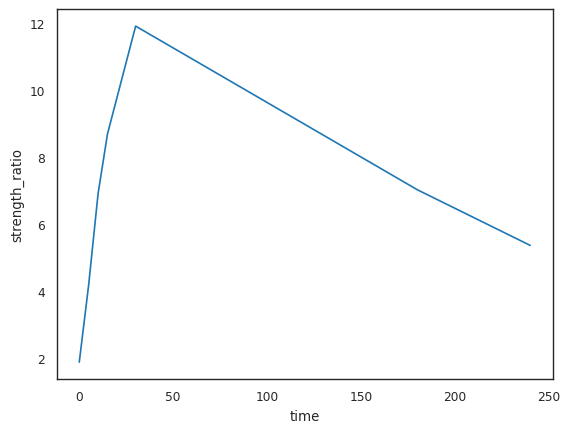

In [85]:
sns.lineplot(data = final_means_cat_range, x = "time", y = "strength_ratio")

# Hill fit figure 8 fixed

In [8]:
hill_final_means_cat = final_means_cat[["Tile", "0", "5", "10", "15", "30","Activity"]]
# Calculate row-wise max
hill_final_means_cat['vmax'] = hill_final_means_cat[["0", "5", "10", "15", "30"]].max(axis=1)
hill_final_means_cat

Tile         0          5  \
0      AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...  1.254211   1.351119   
1      AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...  1.265805   2.077828   
2      AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATA...  1.166629   1.621634   
3      AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTC...  1.984682   0.934068   
4      AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGAT...  0.679833   0.959878   
...                                                  ...       ...        ...   
10929  TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTC...  1.124169  10.208349   
10930  TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATG...  1.676623  16.050106   
10931  TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCAT...  1.981525   6.746955   
10932  TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTA...  0.492827   0.759847   
10933  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...  1.062329   4.878173   

              10         15         30  Activity       vmax  
0       1.062693   1.532920   1.787659  inactive   1.787659  
1       1.819540   1.700459   1.885667  inactive   2.077828  
2       1.000460   0.730895   0.797948  inactive   1.621634  
3       1.299895   1.467031   1.947597  inactive   1.984682  
4       1.127691   1.071415   1.427080  inactive   1.427080  
...          ...        ...        ...       ...        ...  
10929  18.108378  25.314241  38.055564    active  38.055564  
10930  30.615512  26.635877  73.708402    active  73.708402  
10931  14.324264  20.019784  42.340589    active  42.340589  
10932   0.493409   0.619496   0.649877  inactive   0.759847  
10933   5.834273   9.334746  10.378588    active  10.378588  

[10934 rows x 8 columns]

In [9]:
hill_final_means_cat_log = hill_final_means_cat.copy(deep = True)

In [10]:
for col in ["0", "5", "10", "15", "30"]:
    hill_final_means_cat_log[col] = np.log(hill_final_means_cat_log[col])
hill_final_means_cat_log

Tile         0         5  \
0      AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...  0.226507  0.300933   
1      AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...  0.235708  0.731323   
2      AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATA...  0.154119  0.483434   
3      AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTC...  0.685459 -0.068207   
4      AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGAT... -0.385908 -0.040949   
...                                                  ...       ...       ...   
10929  TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTC...  0.117044  2.323206   
10930  TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATG...  0.516782  2.775715   
10931  TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCAT...  0.683867  1.909091   
10932  TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTA... -0.707596 -0.274638   
10933  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...  0.060463  1.584771   

             10        15        30  Activity       vmax  
0      0.060806  0.427174  0.580907  inactive   1.787659  
1      0.598584  0.530898  0.634281  inactive   2.077828  
2      0.000459 -0.313485 -0.225711  inactive   1.621634  
3      0.262284  0.383241  0.666597  inactive   1.984682  
4      0.120172  0.068980  0.355630  inactive   1.427080  
...         ...       ...       ...       ...        ...  
10929  2.896375  3.231367  3.639047    active  38.055564  
10930  3.421507  3.282259  4.300117    active  73.708402  
10931  2.661955  2.996721  3.745746    active  42.340589  
10932 -0.706417 -0.478848 -0.430973  inactive   0.759847  
10933  1.763750  2.233744  2.339745    active  10.378588  

[10934 rows x 8 columns]

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fit_and_plot_hill(activity, time = [0,5,10,15,30], show_plot=True):
    """
    Fit a Hill function to time–activity data and return the half-life.
    
    Parameters
    ----------
    time : array-like
        Time points (e.g., [0, 5, 10, 15, 20]).
    activity : array-like
        Corresponding activity values (same length as time).
    show_plot : bool, optional
        If True, displays a plot of data and fitted curve (default True).

    Returns
    -------
    t_half : float
        Estimated half-life (time when activity reaches half of its max).
    popt : tuple
        Best-fit parameters (A, Kd, n, C).
    """
    # Hill function: A * t^n / (Kd^n + t^n) + C
    def hill_fn(t, A, Kd, n, C):
        return A * (t**n) / (Kd**n + t**n) + C

    # Initial parameter guesses
    A0 = max(activity) - min(activity)
    Kd0 = np.median(time)
    n0 = 1.0
    C0 = min(activity)
    p0 = [A0, Kd0, n0, C0]

    # Fit curve
    popt, _ = curve_fit(hill_fn, time, activity, p0=p0, maxfev=2000)

    A, Kd, n, C = popt

    # Compute half-life (time at half-max activity)
    half_max = (max(activity) + min(activity)) / 2
    # Solve A * t^n / (Kd^n + t^n) + C = half_max for t
    t_half = Kd * ((half_max - C) / (A + C - half_max))**(1/n)

    # Plot
    if show_plot:
        t_fit = np.linspace(min(time), max(time), 200)
        y_fit = hill_fn(t_fit, *popt)
        plt.figure(figsize=(6,4))
        plt.scatter(time, activity, color="blue", label="Data", zorder=3)
        plt.plot(t_fit, y_fit, color="red", label="Hill fit", linewidth=2)
        plt.axvline(t_half, color="green", linestyle="--", label=f"t₁/₂ = {t_half:.2f}")
        plt.xlabel("Time")
        plt.ylabel("Activity")
        plt.legend()
        plt.title("Hill Function Fit")
        plt.tight_layout()
        plt.show()

    return t_half, popt

In [10]:
time_cols = ['0', '5', '10', '15', '30']


In [11]:
hill_final_means_cat_log[time_cols].iloc[7]

0    -0.206307
5     0.620721
10    0.738753
15    1.114469
30    1.549479
Name: 7, dtype: float64

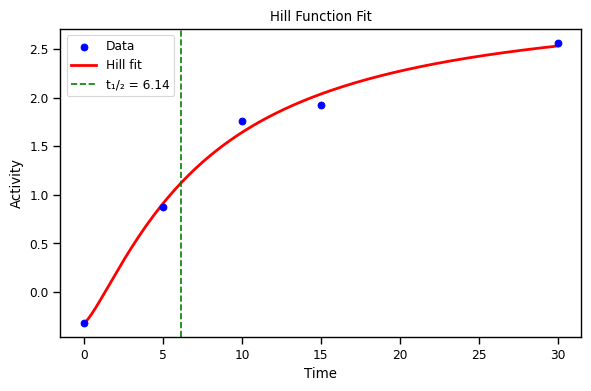

(6.144084718011703,
 array([ 3.33514063,  7.5934179 ,  1.28839101, -0.31918013]))

In [12]:
fit_and_plot_hill(hill_final_means_cat_log[time_cols].iloc[5])

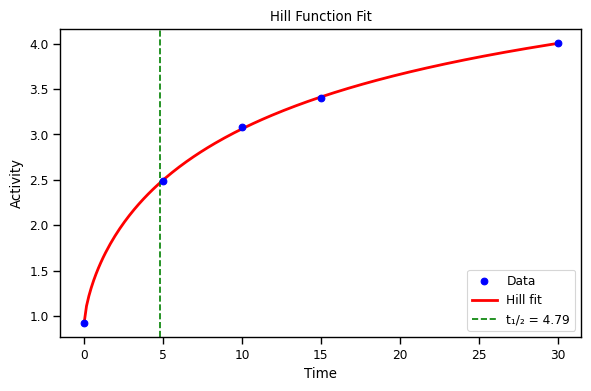

(4.7917647225865165,
 array([ 4.91231275, 14.47099327,  0.70893546,  0.9247065 ]))

In [13]:
fit_and_plot_hill(hill_final_means_cat_log[time_cols].iloc[6])

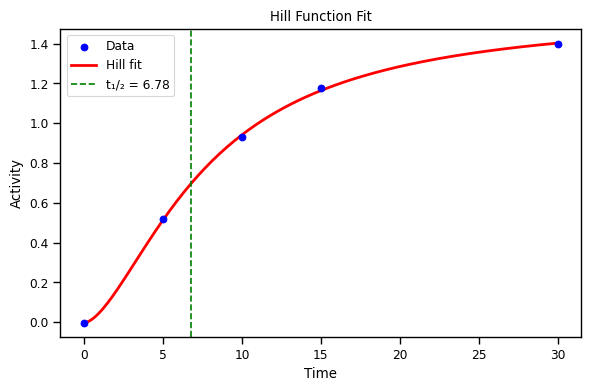

(6.7843658117259515,
 array([ 1.55726927e+00,  7.67011725e+00,  1.63502651e+00, -3.37166932e-03]))

In [14]:
fit_and_plot_hill(hill_final_means_cat_log[time_cols].iloc[9])

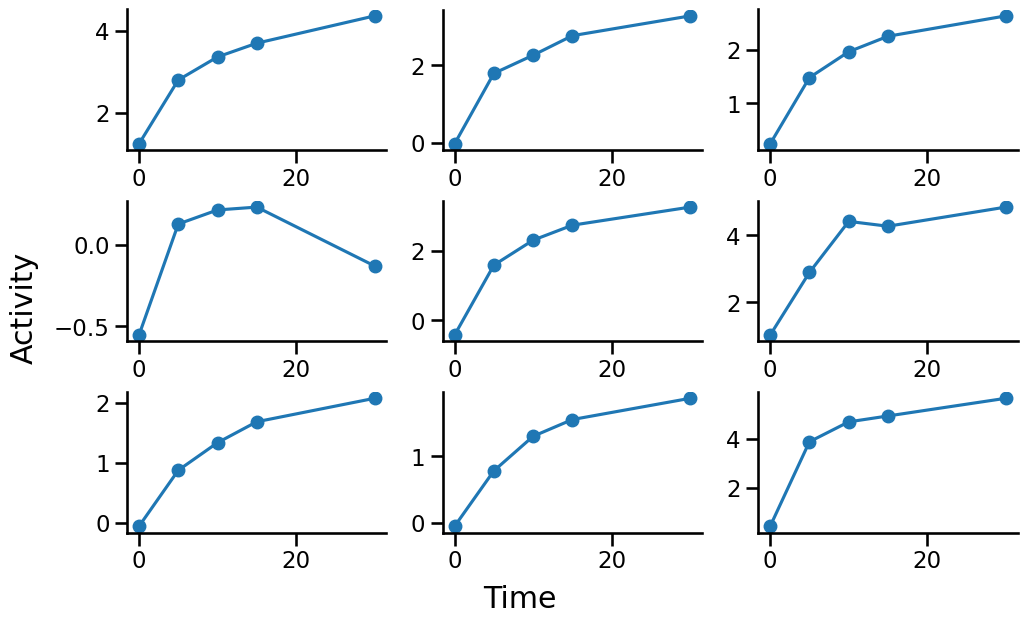

In [15]:
# Define time points (column names that are numeric)
time_points = np.array(time_cols, dtype=float)

# Sample 9 random rows
sample_rows = hill_final_means_cat_log.sample(9)

sns.set_context('talk')
# Create 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(10,6))
axes = axes.flatten()

for ax, (_, row) in zip(axes, sample_rows.iterrows()):
    tile_name = row.name
    activity = row[time_cols].values.flatten()

    # Plot observed and fit
    ax.plot(time_points, activity, 'o-', label='Observed')
    #ax.set_title(tile_name, fontsize=10)
    ax.set_xlabel('Time')
    ax.set_ylabel('Activity')
    ax.set_xlabel("")
    ax.set_ylabel("")

fig.supxlabel("Time", y = -0.01)
fig.supylabel("Activity", x = -0.01)

sns.despine()
plt.tight_layout(pad=0.1)
plt.show()

In [16]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define Hill function
def hill_fn(t, A, Kd, n, C):
    return A * (t**n) / (Kd**n + t**n) + C

# Fit helper
def fit_hill_curve(time, activity):
    A0 = max(activity) - min(activity)
    Kd0 = np.median(time)
    n0 = 1.0
    C0 = min(activity)
    p0 = [A0, Kd0, n0, C0]

    bounds = (
        [0, 0, 0.1, min(activity) - abs(A0)],      
        [10*A0, max(time)*10, 5, max(activity)+abs(A0)]  
    )

    try:
        popt, _ = curve_fit(hill_fn, time, activity, p0=p0, bounds=bounds, maxfev=10000)
        y_fit = hill_fn(time, *popt)
        residuals = activity - y_fit
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((activity - np.mean(activity))**2)
        r_squared = 1 - (ss_res / ss_tot)  # R² value

        A, Kd, n, C = popt
        half_max = (max(activity) + min(activity)) / 2
        t_half = Kd * ((half_max - C) / (A + C - half_max)) ** (1 / n)

        return popt, t_half, r_squared
    except Exception:
        return None, None, None

NameError: name 'fit_hill_curve' is not defined

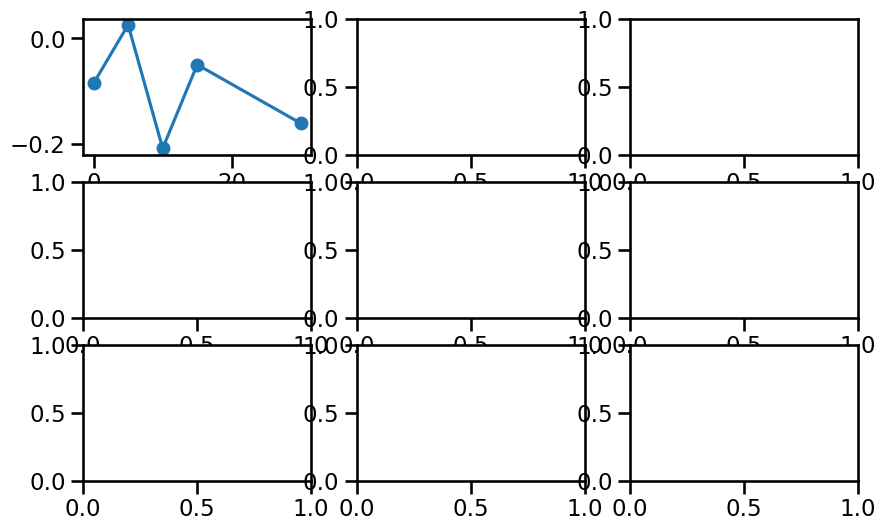

In [14]:


# Your existing code
time_cols = ['0', '5', '10', '15', '30']
time_points = np.array(time_cols, dtype=float)
sample_rows = hill_final_means_cat_log.sample(9, random_state = 7)

sns.set_context('talk')
fig, axes = plt.subplots(3, 3, figsize=(10,6))
axes = axes.flatten()

for ax, (_, row) in zip(axes, sample_rows.iterrows()):
    tile_name = row.name
    activity = row[time_cols].values.astype(float)

    # Plot raw data
    ax.plot(time_points, activity, 'o-', label='Observed', color='tab:blue')

    popt, t_half, r2 = fit_hill_curve(time_points, activity)
    
    # Only plot good fits
    if popt is not None and r2 is not None and r2 > 0.8:  # threshold for good fit
        t_fit = np.linspace(min(time_points), max(time_points), 200)
        y_fit = hill_fn(t_fit, *popt)
        ax.plot(t_fit, y_fit, color='tab:red', lw=2, label='Hill fit')
        if np.isfinite(t_half):
            ax.axvline(t_half, color='green', ls='--', lw=1)
            ax.text(t_half, np.max(activity), f"t₁/₂={t_half:.1f}", fontsize=8, color='green', ha='left', va='bottom')
    else:
        ax.text(0.5, 0.5, "Poor fit", ha='center', va='center', transform=ax.transAxes, color='gray', fontsize=8)


    ax.set_xlabel("")
    ax.set_ylabel("")
    #ax.set_title(str(tile_name), fontsize=9)

# Shared labels
fig.supxlabel("Time", y=-0.01)
fig.supylabel("Log(Activity)", x=-0.01)

sns.despine()
plt.tight_layout(pad=0.3)
plt.show()


In [101]:
time_points

array([ 0.,  5., 10., 15., 30.])

In [11]:
hill_final_means_cat_log

Tile         0         5  \
0      AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...  0.226507  0.300933   
1      AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...  0.235708  0.731323   
2      AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATA...  0.154119  0.483434   
3      AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTC...  0.685459 -0.068207   
4      AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGAT... -0.385908 -0.040949   
...                                                  ...       ...       ...   
10929  TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTC...  0.117044  2.323206   
10930  TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATG...  0.516782  2.775715   
10931  TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCAT...  0.683867  1.909091   
10932  TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTA... -0.707596 -0.274638   
10933  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...  0.060463  1.584771   

             10        15        30  Activity       vmax  
0      0.060806  0.427174  0.580907  inactive   1.787659  
1      0.598584  0.530898  0.634281  inactive   2.077828  
2      0.000459 -0.313485 -0.225711  inactive   1.621634  
3      0.262284  0.383241  0.666597  inactive   1.984682  
4      0.120172  0.068980  0.355630  inactive   1.427080  
...         ...       ...       ...       ...        ...  
10929  2.896375  3.231367  3.639047    active  38.055564  
10930  3.421507  3.282259  4.300117    active  73.708402  
10931  2.661955  2.996721  3.745746    active  42.340589  
10932 -0.706417 -0.478848 -0.430973  inactive   0.759847  
10933  1.763750  2.233744  2.339745    active  10.378588  

[10934 rows x 8 columns]

In [17]:
from joblib import Parallel, delayed
from tqdm import tqdm

time_cols = ['0', '5', '10', '15', '30']

# Updated helper wrapper
def fit_row(activity, time_points, r2_thresh=0.8):
    activity = np.array(activity, dtype=float)
    popt, t_half, r2 = fit_hill_curve(time_points, activity)
    
    # Only keep good fits
    if popt is not None and r2 is not None and r2 >= r2_thresh:
        return popt, t_half
    else:
        return None, None

# Convert DataFrame to list of activities
activities = [row[time_cols].values.astype(float) for _, row in hill_final_means_cat_log.iterrows()]

# Parallel fit with progress bar
results = Parallel(n_jobs=-1)(
    delayed(fit_row)(activity, time_points) for activity in tqdm(activities, desc="Fitting Hill curves")
)

# Unpack results
popts, t_halfs = zip(*results)

# Save only good fits
hill_final_means_cat_log["hill_t_half"] = t_halfs
hill_final_means_cat_log["hill_params"] = popts

# Filter out rows where fit failed
hill_final_means_cat_log_filtered = hill_final_means_cat_log.dropna(subset=["hill_t_half", "hill_params"])

hill_final_means_cat_log_filtered.head()



Fitting Hill curves:   0%|          | 32/10934 [00:00<03:04, 59.19it/s]
/tmp/ipykernel_1014028/4132858867.py:33: RuntimeWarning: invalid value encountered in scalar power
Fitting Hill curves:   1%|          | 64/10934 [00:01<04:57, 36.51it/s]/tmp/ipykernel_1014028/4132858867.py:33: RuntimeWarning: invalid value encountered in scalar power
/tmp/ipykernel_1014028/4132858867.py:33: RuntimeWarning: invalid value encountered in scalar power
/tmp/ipykernel_1014028/4132858867.py:33: RuntimeWarning: invalid value encountered in scalar power
/tmp/ipykernel_1014028/4132858867.py:33: RuntimeWarning: invalid value encountered in scalar power
/tmp/ipykernel_1014028/4132858867.py:33: RuntimeWarning: invalid value encountered in scalar power
/tmp/ipykernel_1014028/4132858867.py:33: RuntimeWarning: invalid value encountered in scalar power
/tmp/ipykernel_1014028/4132858867.py:33: RuntimeWarning: invalid value encountered in scalar power
/tmp/ipykernel_1014028/4132858867.py:33: RuntimeWarning: invalid

Tile         0         5  \
1  AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...  0.235708  0.731323   
4  AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGAT... -0.385908 -0.040949   
5  AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT... -0.315877  0.875605   
6  AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...  0.924886  2.491699   
7  AAACAATTGCAATGGAAACAATTTCAGAATTATCAAAGAAGAAGAT... -0.206307  0.620721   

         10        15        30  Activity       vmax   hill_t_half  \
1  0.598584  0.530898  0.634281  inactive   2.077828  1.193576e-09   
4  0.120172  0.068980  0.355630  inactive   1.427080  6.262632e+00   
5  1.756897  1.921675  2.560428    active  12.941360  6.144085e+00   
6  3.079092  3.395884  4.005092    active  54.876878  4.791765e+00   
7  0.738753  1.114469  1.549479  inactive   4.709017  6.780219e+00   

                                         hill_params  
1  [0.41946059649628537, 3.1505350310613345e-11, ...  
4  [3.010472674029048, 299.9999999992042, 0.50962...  
5  [3.335144802458477, 7.593435279178039, 1.28838...  
6  [4.912311709109133, 14.470984225183688, 0.7089...  
7  [7.955466297797078, 299.99999999999994, 0.5528...

In [18]:
hill_final_means_cat_log_filtered

Tile         0         5  \
1      AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...  0.235708  0.731323   
4      AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGAT... -0.385908 -0.040949   
5      AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT... -0.315877  0.875605   
6      AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...  0.924886  2.491699   
7      AAACAATTGCAATGGAAACAATTTCAGAATTATCAAAGAAGAAGAT... -0.206307  0.620721   
...                                                  ...       ...       ...   
10928  TTTGTTCCAGCTGCTTATCATTATCCAGCTCCACCACCAATGATGC... -0.230563  0.068410   
10929  TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTC...  0.117044  2.323206   
10930  TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATG...  0.516782  2.775715   
10931  TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCAT...  0.683867  1.909091   
10933  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...  0.060463  1.584771   

             10        15        30  Activity       vmax   hill_t_half  \
1      0.598584  0.530898  0.634281  inactive   2.077828  1.193576e-09   
4      0.120172  0.068980  0.355630  inactive   1.427080  6.262632e+00   
5      1.756897  1.921675  2.560428    active  12.941360  6.144085e+00   
6      3.079092  3.395884  4.005092    active  54.876878  4.791765e+00   
7      0.738753  1.114469  1.549479  inactive   4.709017  6.780219e+00   
...         ...       ...       ...       ...        ...           ...   
10928  0.095413  0.344689  0.432822  inactive   1.541602  6.931898e+00   
10929  2.896375  3.231367  3.639047    active  38.055564  3.015022e+00   
10930  3.421507  3.282259  4.300117    active  73.708402  2.890778e+00   
10931  2.661955  2.996721  3.745746    active  42.340589  6.812345e+00   
10933  1.763750  2.233744  2.339745    active  10.378588  2.523722e+00   

                                             hill_params  
1      [0.41946059649628537, 3.1505350310613345e-11, ...  
4      [3.010472674029048, 299.9999999992042, 0.50962...  
5      [3.335144802458477, 7.593435279178039, 1.28838...  
6      [4.912311709109133, 14.470984225183688, 0.7089...  
7      [7.955466297797078, 299.99999999999994, 0.5528...  
...                                                  ...  
10928  [1.1643510405319137, 20.62945895579907, 0.8511...  
10929  [4.293193477347537, 4.69171125464282, 0.821546...  
10930  [12.209431043509486, 299.9999999999996, 0.3659...  
10931  [4.35393349433047, 12.639895497844464, 0.98781...  
10933  [2.952767492749935, 4.877082129231965, 0.70612...  

[6899 rows x 10 columns]

In [19]:
hill_final_means_cat_log_filtered.to_csv("../data/hill_final_means_cat_log_filtered.csv")

In [20]:
hill_final_means_cat_log_filtered = pd.read_csv("../data/hill_final_means_cat_log_filtered.csv")
hill_final_means_cat_log_filtered

Unnamed: 0                                               Tile         0  \
0              1  AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...  0.235708   
1              4  AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGAT... -0.385908   
2              5  AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT... -0.315877   
3              6  AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...  0.924886   
4              7  AAACAATTGCAATGGAAACAATTTCAGAATTATCAAAGAAGAAGAT... -0.206307   
...          ...                                                ...       ...   
6894       10928  TTTGTTCCAGCTGCTTATCATTATCCAGCTCCACCACCAATGATGC... -0.230563   
6895       10929  TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTC...  0.117044   
6896       10930  TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATG...  0.516782   
6897       10931  TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCAT...  0.683867   
6898       10933  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...  0.060463   

             5        10        15        30  Activity       vmax  \
0     0.731323  0.598584  0.530898  0.634281  inactive   2.077828   
1    -0.040949  0.120172  0.068980  0.355630  inactive   1.427080   
2     0.875605  1.756897  1.921675  2.560428    active  12.941360   
3     2.491699  3.079092  3.395884  4.005092    active  54.876878   
4     0.620721  0.738753  1.114469  1.549479  inactive   4.709017   
...        ...       ...       ...       ...       ...        ...   
6894  0.068410  0.095413  0.344689  0.432822  inactive   1.541602   
6895  2.323206  2.896375  3.231367  3.639047    active  38.055564   
6896  2.775715  3.421507  3.282259  4.300117    active  73.708402   
6897  1.909091  2.661955  2.996721  3.745746    active  42.340589   
6898  1.584771  1.763750  2.233744  2.339745    active  10.378588   

       hill_t_half                                        hill_params  
0     1.193576e-09  [4.19460596e-01 3.15053503e-11 1.10613755e-01 ...  
1     6.262632e+00  [  3.01047267 300.           0.50962298  -0.38...  
2     6.144085e+00  [ 3.3351448   7.59343528  1.28838791 -0.31918006]  
3     4.791765e+00  [ 4.91231171 14.47098423  0.7089356   0.9247065 ]  
4     6.780219e+00  [ 7.95546630e+00  3.00000000e+02  5.52838661e-...  
...            ...                                                ...  
6894  6.931898e+00  [ 1.16435104 20.62945896  0.85112224 -0.22871423]  
6895  3.015022e+00      [4.29319348 4.69171125 0.82154657 0.1171242 ]  
6896  2.890778e+00  [ 12.20943104 300.           0.36594183   0.52...  
6897  6.812345e+00  [ 4.35393349 12.6398955   0.98781897  0.68255233]  
6898  2.523722e+00      [2.95276749 4.87708213 0.70612914 0.06106997]  

[6899 rows x 11 columns]

In [22]:
hill_final_means_cat_log_filtered_vmax_fixed = hill_final_means_cat_log_filtered
hill_final_means_cat_log_filtered_vmax_fixed['Vmax'] = hill_final_means_cat_log_filtered_vmax_fixed[["0", "5", "10", "15", "30"]].max(axis=1)
hill_final_means_cat_log_filtered_vmax_fixed = hill_final_means_cat_log_filtered_vmax_fixed.drop(columns = ["Unnamed: 0"])
hill_final_means_cat_log_filtered_vmax_fixed

Tile         0         5  \
0     AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...  0.235708  0.731323   
1     AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGAT... -0.385908 -0.040949   
2     AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT... -0.315877  0.875605   
3     AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...  0.924886  2.491699   
4     AAACAATTGCAATGGAAACAATTTCAGAATTATCAAAGAAGAAGAT... -0.206307  0.620721   
...                                                 ...       ...       ...   
6894  TTTGTTCCAGCTGCTTATCATTATCCAGCTCCACCACCAATGATGC... -0.230563  0.068410   
6895  TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTC...  0.117044  2.323206   
6896  TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATG...  0.516782  2.775715   
6897  TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCAT...  0.683867  1.909091   
6898  TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...  0.060463  1.584771   

            10        15        30  Activity       vmax   hill_t_half  \
0     0.598584  0.530898  0.634281  inactive   2.077828  1.193576e-09   
1     0.120172  0.068980  0.355630  inactive   1.427080  6.262632e+00   
2     1.756897  1.921675  2.560428    active  12.941360  6.144085e+00   
3     3.079092  3.395884  4.005092    active  54.876878  4.791765e+00   
4     0.738753  1.114469  1.549479  inactive   4.709017  6.780219e+00   
...        ...       ...       ...       ...        ...           ...   
6894  0.095413  0.344689  0.432822  inactive   1.541602  6.931898e+00   
6895  2.896375  3.231367  3.639047    active  38.055564  3.015022e+00   
6896  3.421507  3.282259  4.300117    active  73.708402  2.890778e+00   
6897  2.661955  2.996721  3.745746    active  42.340589  6.812345e+00   
6898  1.763750  2.233744  2.339745    active  10.378588  2.523722e+00   

                                            hill_params      Vmax  
0     [4.19460596e-01 3.15053503e-11 1.10613755e-01 ...  0.731323  
1     [  3.01047267 300.           0.50962298  -0.38...  0.355630  
2     [ 3.3351448   7.59343528  1.28838791 -0.31918006]  2.560428  
3     [ 4.91231171 14.47098423  0.7089356   0.9247065 ]  4.005092  
4     [ 7.95546630e+00  3.00000000e+02  5.52838661e-...  1.549479  
...                                                 ...       ...  
6894  [ 1.16435104 20.62945896  0.85112224 -0.22871423]  0.432822  
6895      [4.29319348 4.69171125 0.82154657 0.1171242 ]  3.639047  
6896  [ 12.20943104 300.           0.36594183   0.52...  4.300117  
6897  [ 4.35393349 12.6398955   0.98781897  0.68255233]  3.745746  
6898      [2.95276749 4.87708213 0.70612914 0.06106997]  2.339745  

[6899 rows x 11 columns]

In [24]:
hill_final_means_cat_log_filtered_vmax_fixed.to_csv("../data/hill_final_means_cat_log_filtered_vmax_fixed.csv")

In [31]:
np.log(2.317024)

0.8402836036184317

In [18]:
hill_final_means_cat_log_filtered

Unnamed: 0.1  Unnamed: 0         0         5        10        15  \
0                0           1  0.235708  0.731323  0.598584  0.530898   
1                1           4 -0.385908 -0.040949  0.120172  0.068980   
2                2           5 -0.315877  0.875605  1.756897  1.921675   
3                3           6  0.924886  2.491699  3.079092  3.395884   
4                4           7 -0.206307  0.620721  0.738753  1.114469   
...            ...         ...       ...       ...       ...       ...   
6894          6894       10928 -0.230563  0.068410  0.095413  0.344689   
6895          6895       10929  0.117044  2.323206  2.896375  3.231367   
6896          6896       10930  0.516782  2.775715  3.421507  3.282259   
6897          6897       10931  0.683867  1.909091  2.661955  2.996721   
6898          6898       10933  0.060463  1.584771  1.763750  2.233744   

            30       Vmax  Activity   hill_t_half  \
0     0.634281   2.317024  inactive  1.193576e-09   
1     0.355630   1.504457  inactive  6.262632e+00   
2     2.560428  12.941360    active  6.144085e+00   
3     4.005092  54.876878    active  4.791765e+00   
4     1.549479   4.709017  inactive  6.780219e+00   
...        ...        ...       ...           ...   
6894  0.432822   2.924939  inactive  6.931898e+00   
6895  3.639047  38.055564    active  3.015022e+00   
6896  4.300117  73.708402    active  2.890778e+00   
6897  3.745746  42.340589    active  6.812345e+00   
6898  2.339745  10.378588    active  2.523722e+00   

                                            hill_params  
0     [4.19460596e-01 3.15053503e-11 1.10613755e-01 ...  
1     [  3.01047267 300.           0.50962298  -0.38...  
2     [ 3.3351448   7.59343528  1.28838791 -0.31918006]  
3     [ 4.91231171 14.47098423  0.7089356   0.9247065 ]  
4     [ 7.95546630e+00  3.00000000e+02  5.52838661e-...  
...                                                 ...  
6894  [ 1.16435104 20.62945896  0.85112224 -0.22871423]  
6895      [4.29319348 4.69171125 0.82154657 0.1171242 ]  
6896  [ 12.20943104 300.           0.36594183   0.52...  
6897  [ 4.35393349 12.6398955   0.98781897  0.68255233]  
6898      [2.95276749 4.87708213 0.70612914 0.06106997]  

[6899 rows x 11 columns]

In [54]:
hill_final_means_cat_log_active = hill_final_means_cat_log_filtered[hill_final_means_cat_log_filtered["Activity"] == "active"]
hill_final_means_cat_log_active_fast = hill_final_means_cat_log_active[hill_final_means_cat_log_active["hill_t_half"] < 0.05]
hill_final_means_cat_log_active_fast

Unnamed: 0         0         5        10        15        30  \
409          714 -0.968349  2.505549  1.764328  1.837413  2.289871   
744         1209  0.477790  2.178900  1.623685  1.857823  2.044090   
1215        2098 -0.513564  1.420710  0.867869  1.545405  1.344439   
2112        3504  1.800317  3.913932  4.123624  4.131562  3.595866   
2820        4662 -1.939147  2.656850  3.460653  1.713199  2.346308   
3429        5558 -0.260103  1.513783  1.146918  1.464354  1.235802   
3459        5594  4.879130  6.150160  5.914598  6.320844  6.244263   
3734        6029  1.178543  2.289833  2.134933  2.398484  2.392531   
4220        6804  0.331294  1.571085  1.317782  1.396680  1.551664   
4969        8009  1.246819  4.577793  4.511586  4.724542  5.127518   
5289        8534 -0.106430  0.960093  1.102883  1.311065  0.789888   
6211       10011  0.914930  2.611714  3.017154  2.078804  2.875671   
6742       10748  5.591621  6.393920  6.704413  6.216158  6.412290   

            Vmax Activity   hill_t_half  \
409    12.250283   active  4.196670e-09   
744     8.836583   active  1.155355e-08   
1215    8.192725   active  4.790118e-06   
2112   62.275115   active  1.625587e-09   
2820   31.837762   active  1.279415e-08   
3429    6.019523   active  2.071813e-09   
3459  789.312601   active  2.165889e-02   
3734   11.006473   active  1.389235e-02   
4220    7.817165   active  2.917021e-09   
4969  168.598163   active  4.871327e-02   
5289   11.969229   active  2.632126e-08   
6211   85.886345   active  5.938168e-07   
6742  815.999159   active  1.232712e-07   

                                            hill_params  
409   [ 3.43134162e+00  2.63586765e-09  1.00080462e-...  
744   [1.62338280e+00 3.62380928e-09 1.00046737e-01 ...  
1215  [ 2.33180857e+00  5.03351760e-05  1.00000000e-...  
2112  [2.39892607e+00 1.90510581e-09 1.00000000e-01 ...  
2820  [ 5.03400015e+00  1.92092506e-09  1.00000032e-...  
3429  [ 1.79359321e+00  1.79684283e-09  1.00000000e-...  
3459  [3.21517978e+00 3.00000000e+02 1.30192970e-01 ...  
3734  [2.82546776e+00 3.00000000e+02 1.29259479e-01 ...  
4220  [1.25755447e+00 3.63639276e-09 1.00035126e-01 ...  
4969  [9.11560172e+00 3.00000000e+02 1.49913351e-01 ...  
5289  [ 1.28391101e+00  2.40671781e-09  1.00000000e-...  
6211  [2.03071360e+00 2.93708884e-07 1.00000000e-01 ...  
6742  [9.41253133e-01 2.28434268e-09 1.00070749e-01 ...

In [55]:
hill_final_means_cat_log_active["hill_coeff"] = hill_final_means_cat_log_active["hill_params"].str.extract("\[\s*[\d\.\-\+eE]+\s+[\d\.\-\+eE]+\s+([\d\.\-\+eE]+)").astype(float)
hill_final_means_cat_log_active

Unnamed: 0         0         5        10        15        30       Vmax  \
2              5 -0.315877  0.875605  1.756897  1.921675  2.560428  12.941360   
3              6  0.924886  2.491699  3.079092  3.395884  4.005092  54.876878   
6             10  0.671432  1.420956  1.821154  2.234417  2.751547  15.666855   
8             14 -0.307036  1.659381  2.184894  2.451213  3.389635  29.655114   
11            26  0.226944  1.202523  1.729562  1.824401  1.848504   8.506463   
...          ...       ...       ...       ...       ...       ...        ...   
6890       10922  0.068573  1.205999  2.177289  1.695744  3.559990  35.162836   
6895       10929  0.117044  2.323206  2.896375  3.231367  3.639047  38.055564   
6896       10930  0.516782  2.775715  3.421507  3.282259  4.300117  73.708402   
6897       10931  0.683867  1.909091  2.661955  2.996721  3.745746  42.340589   
6898       10933  0.060463  1.584771  1.763750  2.233744  2.339745  10.378588   

     Activity  hill_t_half                                        hill_params  \
2      active     6.144085  [ 3.3351448   7.59343528  1.28838791 -0.31918006]   
3      active     4.791765  [ 4.91231171 14.47098423  0.7089356   0.9247065 ]   
6      active     8.072107  [ 3.30990011 17.6273937   1.00219417  0.6730855 ]   
8      active     4.586057  [ 13.84685482 300.           0.44823281  -0.30...   
11     active     4.366788      [1.62998552 4.38187472 3.0199473  0.22697528]   
...       ...          ...                                                ...   
6890   active    10.436783  [2.02954257e+01 3.00000000e+02 7.11495696e-01 ...   
6895   active     3.015022      [4.29319348 4.69171125 0.82154657 0.1171242 ]   
6896   active     2.890778  [ 12.20943104 300.           0.36594183   0.52...   
6897   active     6.812345  [ 4.35393349 12.6398955   0.98781897  0.68255233]   
6898   active     2.523722      [2.95276749 4.87708213 0.70612914 0.06106997]   

      hill_coeff  
2       1.288388  
3       0.708936  
6       1.002194  
8       0.448233  
11      3.019947  
...          ...  
6890    0.711496  
6895    0.821547  
6896    0.365942  
6897    0.987819  
6898    0.706129  

[3708 rows x 11 columns]

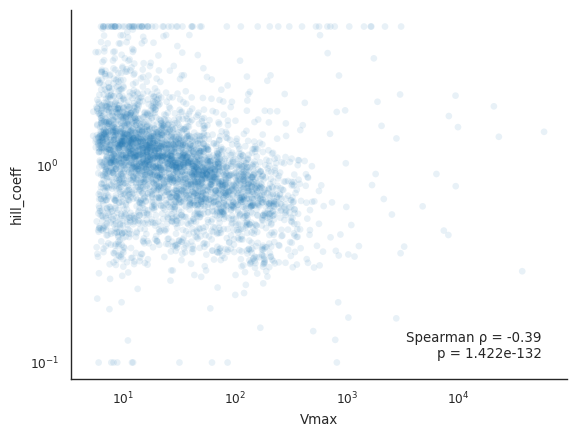

In [56]:
# Scatter plot
ax = sns.scatterplot(
    data=hill_final_means_cat_log_active, 
    x="Vmax", 
    y="hill_coeff", 
    alpha=0.1, 
    edgecolor='none'
)
ax.set_xscale('log')
ax.set_yscale('log')

# Compute Spearman correlation
x = hill_final_means_cat_log_active["Vmax"]
y = hill_final_means_cat_log_active["hill_coeff"]
corr, pval = spearmanr(x, y)

# Add correlation text to plot
ax.text(
    0.95, 0.05, 
    f"Spearman ρ = {corr:.2f}\np = {pval:.3e}", 
    transform=ax.transAxes, 
    verticalalignment='bottom', ha = 'right'
)
sns.despine()
plt.show()

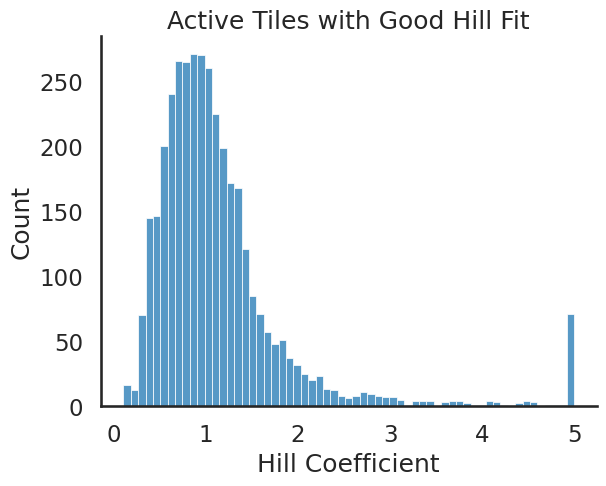

In [57]:
sns.set_context('talk')
sns.histplot(hill_final_means_cat_log_active["hill_coeff"])
plt.xlabel("Hill Coefficient")
plt.title("Active Tiles with Good Hill Fit")
sns.despine()

In [13]:

# Your existing code
time_cols = ['0', '5', '10', '15', '30']
time_points = np.array(time_cols, dtype=float)
sample_rows = hill_final_means_cat_log_active_fast.sample(9, random_state = 17)

sns.set_context('talk')
fig, axes = plt.subplots(3, 3, figsize=(10,6))
axes = axes.flatten()

for ax, (_, row) in zip(axes, sample_rows.iterrows()):
    tile_name = row.name
    activity = row[time_cols].values.astype(float)

    # Plot raw data
    ax.plot(time_points, activity, 'o-', label='Observed', color='tab:blue')

    popt, t_half, r2 = fit_hill_curve(time_points, activity)
    
    # Only plot good fits
    if popt is not None and r2 is not None and r2 > 0.8:  # threshold for good fit
        t_fit = np.linspace(min(time_points), max(time_points), 200)
        y_fit = hill_fn(t_fit, *popt)
        ax.plot(t_fit, y_fit, color='tab:red', lw=2, label='Hill fit')
        if np.isfinite(t_half):
            ax.axvline(t_half, color='green', ls='--', lw=1)
            ax.text(t_half, np.max(activity), f"t₁/₂={t_half:.1f}", fontsize=8, color='green', ha='left', va='bottom')
    else:
        ax.text(0.5, 0.5, "Poor fit", ha='center', va='center', transform=ax.transAxes, color='gray', fontsize=8)


    ax.set_xlabel("")
    ax.set_ylabel("")
    #ax.set_title(str(tile_name), fontsize=9)

# Shared labels
fig.supxlabel("Time", y=-0.01)
fig.supylabel("Log(Activity)", x=-0.01)

sns.despine()
plt.tight_layout(pad=0.3)
plt.show()


NameError: name 'hill_final_means_cat_log_active_fast' is not defined

In [59]:
hill_final_means_cat_log_active = hill_final_means_cat_log_filtered[hill_final_means_cat_log_filtered["Activity"] == "active"]
hill_final_means_cat_log_active

Unnamed: 0         0         5        10        15        30       Vmax  \
2              5 -0.315877  0.875605  1.756897  1.921675  2.560428  12.941360   
3              6  0.924886  2.491699  3.079092  3.395884  4.005092  54.876878   
6             10  0.671432  1.420956  1.821154  2.234417  2.751547  15.666855   
8             14 -0.307036  1.659381  2.184894  2.451213  3.389635  29.655114   
11            26  0.226944  1.202523  1.729562  1.824401  1.848504   8.506463   
...          ...       ...       ...       ...       ...       ...        ...   
6890       10922  0.068573  1.205999  2.177289  1.695744  3.559990  35.162836   
6895       10929  0.117044  2.323206  2.896375  3.231367  3.639047  38.055564   
6896       10930  0.516782  2.775715  3.421507  3.282259  4.300117  73.708402   
6897       10931  0.683867  1.909091  2.661955  2.996721  3.745746  42.340589   
6898       10933  0.060463  1.584771  1.763750  2.233744  2.339745  10.378588   

     Activity  hill_t_half                                        hill_params  
2      active     6.144085  [ 3.3351448   7.59343528  1.28838791 -0.31918006]  
3      active     4.791765  [ 4.91231171 14.47098423  0.7089356   0.9247065 ]  
6      active     8.072107  [ 3.30990011 17.6273937   1.00219417  0.6730855 ]  
8      active     4.586057  [ 13.84685482 300.           0.44823281  -0.30...  
11     active     4.366788      [1.62998552 4.38187472 3.0199473  0.22697528]  
...       ...          ...                                                ...  
6890   active    10.436783  [2.02954257e+01 3.00000000e+02 7.11495696e-01 ...  
6895   active     3.015022      [4.29319348 4.69171125 0.82154657 0.1171242 ]  
6896   active     2.890778  [ 12.20943104 300.           0.36594183   0.52...  
6897   active     6.812345  [ 4.35393349 12.6398955   0.98781897  0.68255233]  
6898   active     2.523722      [2.95276749 4.87708213 0.70612914 0.06106997]  

[3708 rows x 10 columns]

NameError: name 'fit_hill_curve' is not defined

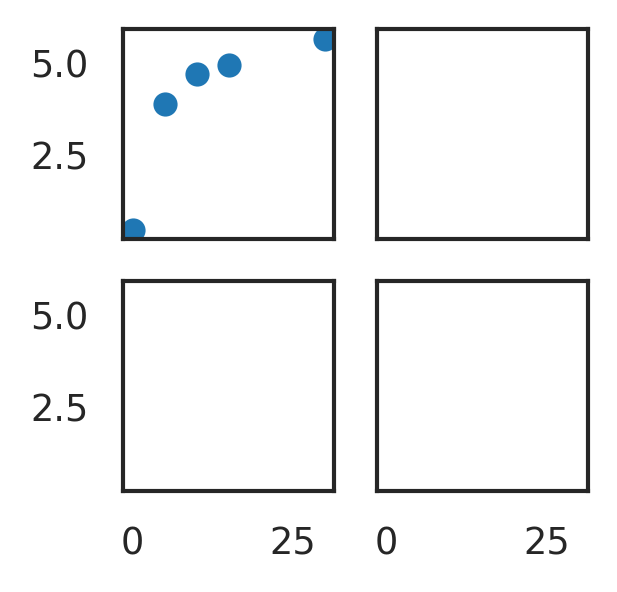

In [60]:
sns.set_style('white')

# Your existing code
time_cols = ['0', '5', '10', '15', '30']
time_points = np.array(time_cols, dtype=float)
sample_rows = hill_final_means_cat_log_active.sample(9, random_state = 17)

sns.set_context('paper')
fig, axes = plt.subplots(2, 2, figsize=(2,2), dpi = 300, sharex = True, sharey = True)
axes = axes.flatten()

for ax, (_, row) in zip(axes, sample_rows.iterrows()):
    tile_name = row.name
    activity = row[time_cols].values.astype(float)

    # Plot raw data
    ax.plot(time_points, activity, 'o', label='Observed', color='tab:blue')

    popt, t_half, r2 = fit_hill_curve(time_points, activity)
    
    # Only plot good fits
    if popt is not None and r2 is not None and r2 > 0.8:  # threshold for good fit
        t_fit = np.linspace(min(time_points), max(time_points), 200)
        y_fit = hill_fn(t_fit, *popt)
        ax.plot(t_fit, y_fit, color='tab:blue', lw=2, label='Hill fit')
        if np.isfinite(t_half):
            ax.axvline(t_half, color='green', ls='--', lw=1)
            ax.text(t_half + 1, 0, f"t₁/₂={t_half:.1f}", fontsize='x-small', color='green', ha='left', va='bottom')
    else:
        ax.text(0.5, 0.5, "Poor fit", ha='center', va='center', transform=ax.transAxes, color='gray', fontsize=8)


    ax.set_xlabel("")
    ax.set_ylabel("")
    #ax.set_title(str(tile_name), fontsize=9)

    # Move tick labels slightly inward
    for label in ax.get_xticklabels():
        label.set_y(0.06)
    
    for label in ax.get_yticklabels():
        label.set_x(0.06)

    ax.set_xlim(-2,32)
    ax.set_ylim(-0.5, 6.2)

# Shared labels
fig.supxlabel("Time (minutes)", y=-0.01)
fig.supylabel("Log(Activity)", x=-0.01)

sns.despine()
plt.tight_layout(pad=0.35)
plt.savefig("../output/grant_resub_figs_v2/fig8_example_fits_split.png", bbox_inches = 'tight')
plt.savefig("../output/grant_resub_figs_v2/fig8_example_fits_split.pdf", bbox_inches = 'tight')
plt.show()


In [61]:
hill_final_means_cat_log_active

Unnamed: 0         0         5        10        15        30       Vmax  \
2              5 -0.315877  0.875605  1.756897  1.921675  2.560428  12.941360   
3              6  0.924886  2.491699  3.079092  3.395884  4.005092  54.876878   
6             10  0.671432  1.420956  1.821154  2.234417  2.751547  15.666855   
8             14 -0.307036  1.659381  2.184894  2.451213  3.389635  29.655114   
11            26  0.226944  1.202523  1.729562  1.824401  1.848504   8.506463   
...          ...       ...       ...       ...       ...       ...        ...   
6890       10922  0.068573  1.205999  2.177289  1.695744  3.559990  35.162836   
6895       10929  0.117044  2.323206  2.896375  3.231367  3.639047  38.055564   
6896       10930  0.516782  2.775715  3.421507  3.282259  4.300117  73.708402   
6897       10931  0.683867  1.909091  2.661955  2.996721  3.745746  42.340589   
6898       10933  0.060463  1.584771  1.763750  2.233744  2.339745  10.378588   

     Activity  hill_t_half                                        hill_params  
2      active     6.144085  [ 3.3351448   7.59343528  1.28838791 -0.31918006]  
3      active     4.791765  [ 4.91231171 14.47098423  0.7089356   0.9247065 ]  
6      active     8.072107  [ 3.30990011 17.6273937   1.00219417  0.6730855 ]  
8      active     4.586057  [ 13.84685482 300.           0.44823281  -0.30...  
11     active     4.366788      [1.62998552 4.38187472 3.0199473  0.22697528]  
...       ...          ...                                                ...  
6890   active    10.436783  [2.02954257e+01 3.00000000e+02 7.11495696e-01 ...  
6895   active     3.015022      [4.29319348 4.69171125 0.82154657 0.1171242 ]  
6896   active     2.890778  [ 12.20943104 300.           0.36594183   0.52...  
6897   active     6.812345  [ 4.35393349 12.6398955   0.98781897  0.68255233]  
6898   active     2.523722      [2.95276749 4.87708213 0.70612914 0.06106997]  

[3708 rows x 10 columns]

<Axes: xlabel='Vmax', ylabel='Count'>

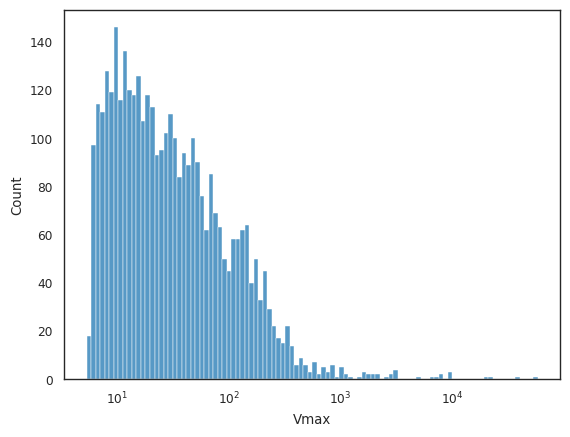

In [62]:
sns.histplot(hill_final_means_cat_log_active["Vmax"], bins = 100, log_scale = (True, False))

<Axes: xlabel='hill_t_half', ylabel='Count'>

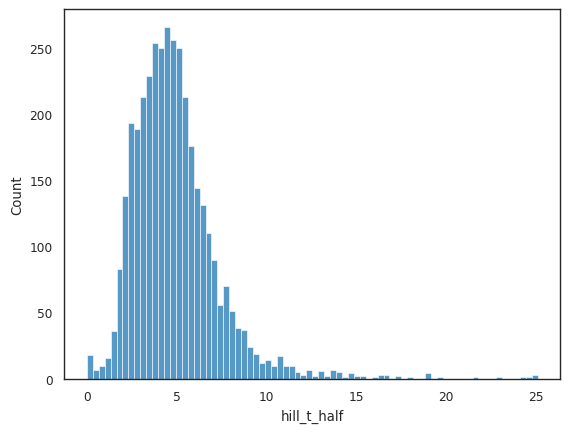

In [63]:
sns.histplot(hill_final_means_cat_log_active["hill_t_half"])

In [64]:
hill_final_means_cat_log_active[(12.5 < hill_final_means_cat_log_active["Vmax"]) & (hill_final_means_cat_log_active["Vmax"] < 13)]

Unnamed: 0         0         5        10        15        30       Vmax  \
2              5 -0.315877  0.875605  1.756897  1.921675  2.560428  12.941360   
106          207  0.170028  1.552884  1.983861  2.339808  2.558270  12.913455   
164          323 -0.408169  1.261905  1.866820  2.137093  2.558544  12.916997   
402          705 -0.166120  0.588798  1.905945  2.192213  2.533417  12.596471   
403          706  0.545971  1.545046  1.768626  1.771268  2.547794  12.778881   
469          789  0.212381  1.163345  1.673948  1.986304  2.548551  12.788558   
518          856  0.361573  1.144081  1.832754  2.180297  2.534212  12.606496   
719         1173  0.454234  1.622816  1.909271  2.297454  2.560239  12.938907   
757         1228  0.207703  1.618544  2.058654  2.073345  2.562831  12.972488   
781         1257  0.416978  1.319271  1.617235  2.055298  2.564607  12.995548   
782         1258  0.488482  0.930758  1.916888  2.449491  2.529604  12.548542   
862         1374 -0.442253  1.534413  1.775144  2.187571  2.532307  12.582500   
876         1398 -0.339057  0.994710  1.821729  2.189534  2.562331  12.966000   
994         1575  0.286376  1.031865  1.747795  2.125563  2.558266  12.913401   
1479        2487  0.047438  1.604345  2.340904  2.479933  2.560199  12.938393   
1556        2605  0.047789  1.464931  2.070824  2.266799  2.559298  12.926742   
1872        3120  0.314365  1.477471  2.240412  2.269562  2.534566  12.610950   
2164        3570 -0.871498  1.010465  1.477553  1.728700  2.563912  12.986518   
2208        3657  0.371436  1.590873  2.147340  2.539630  2.541796  12.702464   
2226        3689  0.205265  1.402161  1.986587  2.224765  2.536644  12.637186   
2306        3833  0.341531  1.305297  1.885858  2.115313  2.547141  12.770543   
2571        4271 -0.113140  1.162739  1.736563  2.109145  2.556447  12.889934   
2882        4772  0.067899  1.023813  1.846185  2.230147  2.562610  12.969625   
2977        4917  0.686853  1.264694  1.449087  1.436838  2.532991  12.591109   
3375        5486  0.122994  1.236867  1.810353  2.103393  2.552148  12.834644   
4038        6513  1.086469  1.372676  1.710752  2.087813  2.555904  12.882934   
4265        6860 -0.157420  0.806976  1.429100  1.750713  2.558741  12.919540   
4393        7056 -0.119171  0.996471  1.722830  1.856528  2.533758  12.600776   
4409        7083  0.176379  0.993887  1.630778  1.907055  2.555060  12.872072   
4471        7189  0.121774  1.068192  1.766582  1.977373  2.530386  12.558351   
4838        7826  0.508454  0.916308  1.409724  1.647442  2.534446  12.609449   
4843        7832  0.510730  0.566811  2.008396  2.370629  2.298073  12.596860   
4891        7894  0.207195  1.393828  1.900424  2.139199  2.543330  12.721963   
5017        8073  0.207740  1.397832  1.843748  2.098135  2.543980  12.730237   
5124        8257  0.708522  1.500471  1.870737  2.371526  2.564567  12.995031   
5228        8429  0.469175  1.536361  2.075133  2.530280  2.488430  12.557018   
5290        8535  0.046605  1.493987  2.158138  2.255275  2.525909  12.502252   
5297        8546  0.297990  1.571136  1.911213  2.328754  2.536585  12.636439   
5458        8790 -0.461371  1.220541  1.934816  2.121527  2.552143  12.834577   
5509        8856  0.019338  0.833513  1.664143  2.044320  2.535808  12.626628   
5652        9126 -0.091564  1.236276  1.802491  2.148133  2.532738  12.587926   
5699        9216 -0.065256  1.245134  2.005879  2.238973  2.552386  12.837698   
5886        9516  0.493585  1.256785  1.715583  2.064534  2.549153  12.796259   
5913        9551  0.588128  1.173669  1.857061  2.142439  2.557526  12.903853   
6315       10166  0.216724  1.430013  1.842880  2.048780  2.538898  12.665705   
6386       10277 -0.016979  1.319589  1.941075  2.301772  2.549559  12.801462   
6395       10288  0.243175  1.158915  1.765832  2.068708  2.556714  12.893386   
6456       10366 -0.470901  1.171210  1.880979  2.061385  2.533340  12.595501   
6558       10512 -0.200388  1.264340 

In [65]:
hill_final_means_cat_log_active.loc[[2, 4038]]


Unnamed: 0         0         5        10        15        30       Vmax  \
2              5 -0.315877  0.875605  1.756897  1.921675  2.560428  12.941360   
4038        6513  1.086469  1.372676  1.710752  2.087813  2.555904  12.882934   

     Activity  hill_t_half                                        hill_params  
2      active     6.144085  [ 3.3351448   7.59343528  1.28838791 -0.31918006]  
4038   active    11.076049  [ 1.894048   14.55560309  1.71360472  1.09187136]

In [66]:
hill_final_means_cat_log_active.loc[[2, 106]]

Unnamed: 0         0         5        10        15        30       Vmax  \
2             5 -0.315877  0.875605  1.756897  1.921675  2.560428  12.941360   
106         207  0.170028  1.552884  1.983861  2.339808  2.558270  12.913455   

    Activity  hill_t_half                                        hill_params  
2     active     6.144085  [ 3.3351448   7.59343528  1.28838791 -0.31918006]  
106   active     3.960718      [2.73351175 4.98600901 1.10716768 0.1706363 ]

In [67]:
hill_final_means_cat_log_active[(3.5 < hill_final_means_cat_log_active["hill_t_half"]) & (hill_final_means_cat_log_active["hill_t_half"] < 4.5)].sort_values(by = "Vmax")

Unnamed: 0         0         5        10        15        30  \
2162        3566 -0.845848  0.709040  1.315940  1.414304  1.733878   
81           182 -0.364085  0.825642  1.359958  1.506180  1.760845   
5678        9178 -0.834900  0.732134  1.368962  1.723082  1.767097   
5849        9462 -0.505601  0.926388  1.565408  1.787929  1.751345   
5007        8063 -0.381188  0.804326  1.115905  1.418129  1.791029   
...          ...       ...       ...       ...       ...       ...   
5661        9141  2.943674  5.195811  6.148229  6.357763  6.150301   
4637        7488  4.122329  5.552486  6.372498  6.290602  6.702375   
3017        4971  3.324138  5.533505  6.329100  6.748375  6.523700   
4513        7266  5.218825  6.587672  7.299972  7.415434  6.784001   
607          994  4.736557  7.013472  7.653176  8.295493  8.756687   

             Vmax Activity  hill_t_half  \
2162     5.662569   active     3.664795   
81       5.817352   active     4.229839   
5678     5.853837   active     4.096557   
5849     5.977061   active     4.154054   
5007     5.995616   active     4.142794   
...           ...      ...          ...   
5661   576.954050   active     4.287993   
4637   814.337515   active     4.358719   
3017   852.672064   active     4.020874   
4513  1661.430268   active     4.410040   
607   6353.028645   active     4.032733   

                                            hill_params  
2162  [ 2.74372602  4.01392542  1.30658583 -0.84638949]  
81    [ 2.26499641  4.61537331  1.41169148 -0.36447788]  
5678  [ 2.69613483  4.25075564  1.92135193 -0.83413649]  
5849  [ 2.30147456  4.16559323  2.69365441 -0.50527381]  
5007  [ 4.22850465 26.96039982  0.56737663 -0.38093694]  
...                                                 ...  
5661      [3.3009565  4.22352304 4.51932702 2.94376275]  
4637      [2.58347655 4.35827501 1.84869762 4.1204922 ]  
3017      [3.31298371 3.92742713 2.8256114  3.32475322]  
4513      [1.9546525  4.19428725 5.         5.21788411]  
607       [5.05753198 6.41591793 0.89813584 4.73764077]  

[753 rows x 10 columns]

NameError: name 'fit_hill_curve' is not defined

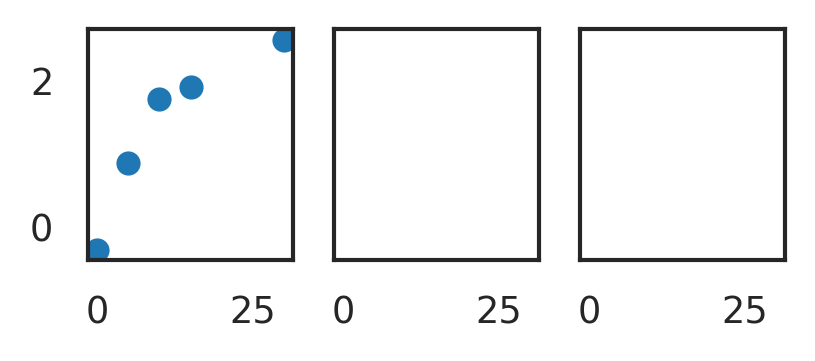

In [68]:
sns.set_style('white')

# Your existing code
time_cols = ['0', '5', '10', '15', '30']
time_points = np.array(time_cols, dtype=float)
sample_rows = hill_final_means_cat_log_active.loc[[2, 106, 2162]]

sns.set_context('paper')
fig, axes = plt.subplots(1,3, figsize=(3,1), dpi = 300, sharex = True, sharey = True)
axes = axes.flatten()

for ax, (_, row) in zip(axes, sample_rows.iterrows()):
    tile_name = row.name
    activity = row[time_cols].values.astype(float)

    # Plot raw data
    ax.plot(time_points, activity, 'o', label='Observed', color='tab:blue')

    popt, t_half, r2 = fit_hill_curve(time_points, activity)
    
    # Only plot good fits
    if popt is not None and r2 is not None and r2 > 0.8:  # threshold for good fit
        t_fit = np.linspace(min(time_points), max(time_points), 200)
        y_fit = hill_fn(t_fit, *popt)
        ax.plot(t_fit, y_fit, color='tab:blue', lw=2, label='Hill fit')
        if np.isfinite(t_half):
            ax.axvline(t_half, color='green', ls='--', lw=1)
            ax.text(t_half + 1, 0, f"t₁/₂={t_half:.1f}", fontsize='x-small', color='green', ha='left', va='bottom')
    else:
        ax.text(0.5, 0.5, "Poor fit", ha='center', va='center', transform=ax.transAxes, color='gray', fontsize=8)


    ax.set_xlabel("")
    ax.set_ylabel("")
    #ax.set_title(str(tile_name), fontsize=9)

    # Move tick labels slightly inward
    for label in ax.get_xticklabels():
        label.set_y(0.06)
    
    for label in ax.get_yticklabels():
        label.set_x(0.06)

    ax.set_xlim(-2,32)
    ax.set_ylim(-1.25, 3)

# Shared labels
fig.supxlabel("Time", y=-0.01)
fig.supylabel("Log(Activity)", x=-0.01)

sns.despine()
plt.tight_layout(pad=0.25)
plt.show()


In [69]:
hill_final_means_cat_log_active[(9.5 < hill_final_means_cat_log_active["Vmax"]) & (hill_final_means_cat_log_active["Vmax"] < 10.5)].sort_values(by = 'hill_t_half').iloc[-20:]

Unnamed: 0         0         5        10        15        30       Vmax  \
2985        4929  0.124150  0.828368  1.355315  1.778844  2.270726   9.686431   
6379       10268  0.674663  1.215303  1.586412  1.841597  2.277164  10.206639   
3186        5205 -0.112160  0.554684  1.328554  1.765547  2.315976  10.134809   
6311       10162  1.133355  0.508692  1.819273  2.323007  2.337904  10.359502   
5357        8624  1.155453  1.394847  1.927620  1.949818  2.313988  10.114677   
3650        5878  0.899029  0.555993  1.807989  1.541060  2.290730   9.882151   
2260        3736  1.235599  1.429573  1.780397  1.943348  2.149445  10.062367   
1277        2222  0.720785  1.157381  1.691570  1.820321  2.322451  10.200650   
3985        6422  0.662741  1.014602  1.634058  1.776577  2.269270   9.672334   
2603        4322  0.574778  1.233925  1.350782  1.795591  2.289836   9.873316   
1978        3293  0.352710  1.071098  1.244406  1.614545  2.263708   9.618693   
1158        1940  1.332785  1.448407  1.878262  1.974372  2.301913   9.993282   
6420       10323  0.575091  0.416646  1.529165  1.645862  2.350859  10.494578   
2483        4105  1.244847  1.112790  1.695435  1.935488  2.269497   9.674530   
758         1229  0.778015  0.833160  1.493629  1.743497  2.309604  10.070436   
2645        4387  0.631279  0.917325  1.421364  1.626389  2.327613  10.253436   
5444        8765  1.560552  1.235758  1.616825  1.940750  2.296134   9.935694   
804         1292 -0.016131  0.843458  0.760655  1.245046  2.294936   9.923797   
1724        2860  1.568857  1.841902  1.920104  1.780680  2.267350   9.976445   
3018        4972  0.263038  0.658041  0.640861  0.952227  2.318035  10.155703   

     Activity  hill_t_half                                        hill_params  
2985   active     8.096549  [ 2.72389121 11.18367956  1.34034554  0.12580215]  
6379   active     8.303219  [ 2.42791183 16.11709084  1.06759702  0.67464061]  
3186   active     8.356704  [ 2.76232784  9.60457472  1.73537291 -0.11327172]  
6311   active     8.394220      [1.59644773 9.20330758 5.         0.80553221]  
5357   active     8.631892      [1.25279117 9.14981207 1.94936768 1.14386216]  
3650   active     8.678195      [1.30855343 8.33731646 5.         0.70375777]  
2260   active     8.736618      [0.98313823 9.28195054 2.16494386 1.23312547]  
1277   active     8.790073  [ 2.06552892 12.23113569  1.35154253  0.71566181]  
3985   active     9.094406  [ 1.85511232 10.49894851  1.73018989  0.65310058]  
2603   active     9.164719  [  9.7838763  300.           0.67425609   0.58...  
1978   active     9.570975  [ 11.08895141 300.           0.68990015   0.36...  
1158   active    10.165397  [ 1.07802799 10.89227014  2.14022179  1.31809882]  
6420   active    10.564156  [ 1.91809366 10.76867848  2.95282359  0.45184912]  
2483   active    10.697357  [ 1.10840324 10.99545485  3.59891428  1.16432953]  
758    active    11.531681  [ 1.71979288 12.15691428  2.45606818  0.73959103]  
2645   active    11.885289  [ 2.75524944 21.25927061  1.36967144  0.62315615]  
5444   active    12.447769  [ 0.91245389 13.67009871  4.51779366  1.40483664]  
804    active    12.500601  [1.85869763e+01 3.00000000e+02 8.76298542e-01 ...  
1724   active    13.206000  [  5.4805178  300.           0.90464515   1.61...  
3018   active    18.980160  [ 20.54997278 109.47361871   1.75183056   0.37...

In [70]:
hill_final_means_cat_log_active[(6.5 < hill_final_means_cat_log_active["hill_t_half"]) & (hill_final_means_cat_log_active["hill_t_half"] < 8.5)].sort_values(by = 'Vmax')#.iloc[-20:]

Unnamed: 0         0         5        10        15         30  \
1234        2161 -0.416010 -0.139729  1.081835  1.456891   1.734102   
5821        9408 -0.170766  0.392302  1.325896  1.216232   1.766962   
1460        2461 -0.574203  0.371589  1.004839  1.305236   1.786362   
6690       10667 -0.189029  0.599734  1.073971  1.479121   1.793837   
3216        5254  0.008302  0.617441  1.030246  1.019526   1.494237   
...          ...       ...       ...       ...       ...        ...   
1850        3088  5.848790  6.445082  6.539519  7.350478   6.980153   
5654        9130  5.775137  6.572761  7.114223  6.664724   7.672067   
3095        5076  4.675759  6.286015  6.780988  6.946527   8.472785   
1535        2571  6.263549  6.935846  9.077045  8.398446   9.941035   
1496        2507  6.833371  8.019590  8.240397  9.681030  10.042952   

              Vmax Activity  hill_t_half  \
1234      5.663838   active     8.140594   
5821      5.853047   active     7.087967   
1460      5.967701   active     6.555354   
6690      6.012476   active     6.683290   
3216      6.060420   active     6.578777   
...            ...      ...          ...   
1850   1885.828746   active     7.001721   
5654   2537.863078   active     7.777458   
3095   4782.814720   active     8.465365   
1535  20765.216549   active     8.452929   
1496  22993.166445   active     8.252353   

                                            hill_params  
1234  [ 2.14318836  8.07571553  3.70991484 -0.42845231]  
5821  [ 1.95134735  7.04365831  2.13073236 -0.18409343]  
1460  [ 2.84059317  8.58083637  1.26347602 -0.57493503]  
6690  [ 2.33186201  8.33067135  1.38496146 -0.18700057]  
3216  [3.96243204e+00 7.01207832e+01 6.18696043e-01 ...  
...                                                 ...  
1850      [1.30629509 6.1771528  2.08187161 5.86177768]  
5654  [  8.14769933 299.99999999   0.56035385   5.79...  
3095  [ 18.65137445 300.           0.61643467   4.71...  
1535      [3.81670155 8.47480337 1.97467304 6.19881065]  
1496  [ 4.16381908 11.81379919  1.38494277  6.86309263]  

[443 rows x 10 columns]

NameError: name 'fit_hill_curve' is not defined

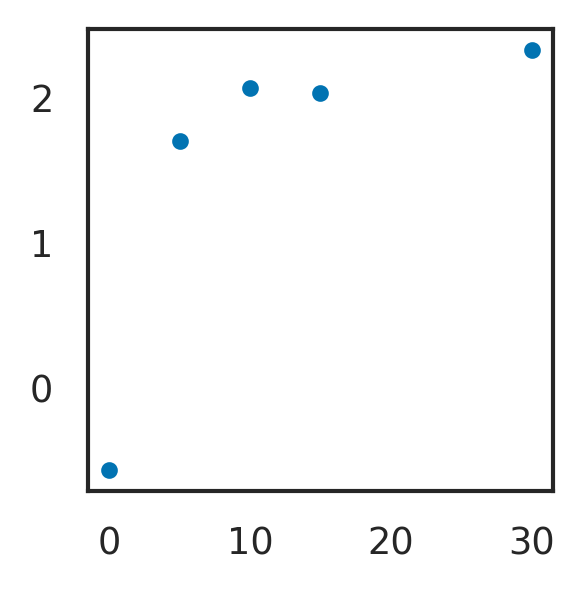

In [71]:
sns.set_style('white')
sns.set_context('paper')

time_cols = ['0', '5', '10', '15', '30']
time_points = np.array(time_cols, dtype=float)
sample_rows = hill_final_means_cat_log_active.loc[[99, 1234, 3186]]

#2, 106, 2162

sns.set_palette('colorblind')

plt.figure(figsize=(2,2), dpi=300)
ax = plt.gca()

already_plotted = False

for _, row in sample_rows.iterrows():
    activity = row[time_cols].values.astype(float)
    tile_name = row.name

    # Plot observed data first — get its color from the line handle
    (line,) = ax.plot(time_points, activity, 'o', alpha=1, label=f'{tile_name}', ms = 3)
    color = line.get_color()

    # Fit and plot model using the same color
    popt, t_half, r2 = fit_hill_curve(time_points, activity)

    
    if popt is not None and r2 is not None and r2 > 0.8:
        t_fit = np.linspace(min(time_points), max(time_points), 200)
        y_fit = hill_fn(t_fit, *popt)
        ax.plot(t_fit, y_fit, color=color, lw=1.5, alpha = 0.7)
        if np.isfinite(t_half):
            ax.axvline(t_half, color=color, lw=2, alpha=0.6, ls = "--", zorder = 0)

            print(already_plotted)
            print(t_half)
            
            if already_plotted:
                y_offset = 0.3
            else:
                y_offset = 0

            if t_half < 1:
                x_offset = -2.25
            else:
                x_offset = 2.25
                
            ax.text(t_half + x_offset, 2.5 + y_offset, f"t₁/₂={t_half:.1f}", fontsize='small', color=color, ha='center', va='bottom')
            
            already_plotted = 7 < t_half < 9
            print(already_plotted)
            
    else:
        ax.text(0.5, 0.5, "Poor fit", transform=ax.transAxes, ha='center', va='center',
                color='gray', fontsize=8)


for label in ax.get_xticklabels():
    label.set_y(0.05)  # move x tick labels closer; adjust value as needed

for label in ax.get_yticklabels():
    label.set_x(0.05)  # move y tick labels closer; adjust value as needed

ax.set_xlabel("Time (minutes)", labelpad = 0.5)
ax.set_ylabel("Log(Activity)")
#ax.legend(frameon=False, fontsize=7)
sns.despine()
plt.tight_layout()
plt.savefig("../output/grant_resub_figs_v2/fig8_example_fits_together.png", bbox_inches = 'tight')
plt.savefig("../output/grant_resub_figs_v2/fig8_example_fits_together.pdf", bbox_inches = 'tight')
plt.show()


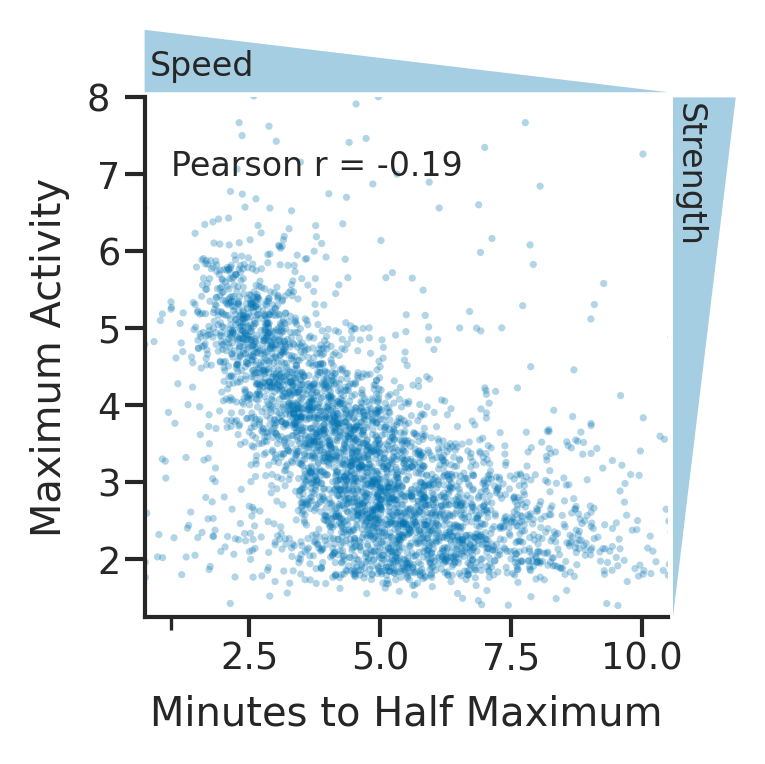

In [84]:
import matplotlib.patches as patches
from scipy.stats import pearsonr
from matplotlib.ticker import LogLocator

sns.set_context('paper')
sns.set_style('ticks')

blue_color = sns.color_palette('Paired')[0]

# --- Filter data for active variants ---
hill_final_means_cat_log_active['Vmax'] = hill_final_means_cat_log_active[["0", "5", "10", "15", "30"]].max(axis=1)
df = hill_final_means_cat_log_active[hill_final_means_cat_log_active["Activity"] == "active"]

plt.figure(figsize=(2.25,2.25), dpi=300)
ax = sns.scatterplot(data = df, 
                     x = "hill_t_half", 
                     y = "Vmax", edgecolor = 'none', alpha = 0.3, s = 3)
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel("Minutes to Half Maximum")
ax.set_ylabel("Maximum Activity")

# --- Compute Pearson correlation (on log values to match plot) ---
valid = df[["hill_t_half", "Vmax"]].replace([np.inf, -np.inf], np.nan).dropna()
x_log = np.log10(valid["hill_t_half"])
y_log = np.log10(valid["Vmax"])
r, _ = pearsonr(x_log, y_log)

# Add text annotation (Pearson r only)
ax.text(
    0.05, 0.9, f"Pearson r = {r:.2f}",
    transform=ax.transAxes,
    fontsize="small", ha="left", va="top"
)

# --- Add big ramp triangles ---
# Top ramp (Speed ↑)
strength_ramp = patches.Polygon(
    [[0, 1.01], [1, 1.01], [0, 1.13]],
    transform=ax.transAxes, clip_on=False,
    facecolor=blue_color, alpha=1, edgecolor="none"
)
ax.add_patch(strength_ramp)
ax.text(0.01, 1.06, "Speed", transform=ax.transAxes,
        ha="left", va="center", fontsize='small')

# Right ramp (Strength ↑)
speed_ramp = patches.Polygon(
    [[1.01, 0], [1.13, 1], [1.01, 1]],
    transform=ax.transAxes, clip_on=False,
    facecolor=blue_color, alpha=1, edgecolor="none"
)
ax.add_patch(speed_ramp)
ax.text(1.01, 0.99, "Strength", transform=ax.transAxes,
        ha="left", va="top", fontsize='small', rotation=-90)


# Only show major ticks (no minor ticks)
ax.xaxis.set_minor_locator(LogLocator(base=10, subs=[]))
ax.yaxis.set_minor_locator(LogLocator(base=10, subs=[]))

# Move tick labels slightly inward
for label in ax.get_xticklabels():
    label.set_y(0.02)

for label in ax.get_yticklabels():
    label.set_x(0.02)

plt.xlim(0.5, 10.5)
plt.ylim(1.25, 8)


sns.despine()
plt.savefig("../output/grant_resub_figs_v2/fig8_option2_zoomed_in.pdf", dpi=300, bbox_inches="tight")
plt.savefig("../output/grant_resub_figs_v2/fig8_option2_zoomed_in.png", dpi=300, bbox_inches="tight")
plt.show()

In [181]:
# Is there a difference in vmax of sequences with good fit vs bad fit?
df["bad_fit"] = df["hill_t_half"].isna()
df["bad_fit"].value_counts()

bad_fit
False    3708
True      149
Name: count, dtype: int64

In [188]:
len(df)

3857

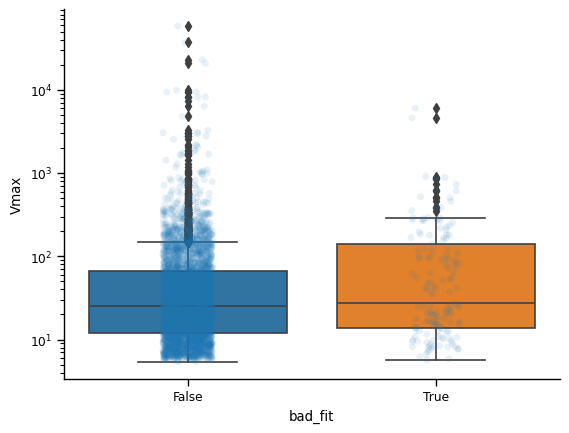

In [187]:
ax = sns.stripplot(data = df, x = "bad_fit", y = "Vmax", edgecolor = 'none', alpha = 0.1)
sns.boxplot(data = df, x = "bad_fit", y = "Vmax", ax = ax)
ax.set_yscale('log')
sns.despine()

# Fold change at first 5 minutes

In [29]:
final_means_cat["initial_fold_change"] = final_means_cat["5"] / final_means_cat["0"]
final_means_cat

Time                                                       0         10  \
Tile                                                                      
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...  1.254211   1.062693   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...  1.265805   1.819540   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...  1.166629   1.000460   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...  1.984682   1.299895   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...  0.679833   1.127691   
...                                                      ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  1.124169  18.108378   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  1.676623  30.615512   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  1.981525  14.324264   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...  0.492827   0.493409   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...  1.062329   5.834273   

Time                                                       15        180  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.532920   1.240728   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   1.700459   2.317024   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   0.730895   0.709995   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   1.467031   1.668606   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   1.071415   1.504457   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  25.314241  15.885584   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  26.635877  24.434864   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  20.019784  19.689651   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.619496   0.570966   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   9.334746   3.606807   

Time                                                      240         30  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.206545   1.787659   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   2.080985   1.885667   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   0.732983   0.797948   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   1.693269   1.947597   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   1.322705   1.427080   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  11.023455  38.055564   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  17.924639  73.708402   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...  12.861237  42.340589   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.409002   0.649877   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   1.934392  10.378588   

Time                                                        5       Vmax  \
Tile                                                                       
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGA...   1.351119   1.787659   
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAA...   2.077828   2.317024   
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAG...   1.621634   1.621634   
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCA...   0.934068   1.984682   
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATG...   0.959878   1.504457   
...                                                       ...        ...   
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCA...  10.208349  38.055564   
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGC...  16.050106  73.708402   
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATG...   6.746955  42.340589   
TTTGTTGTTTCTAGATCTCCAGCTGCTGTTCATATTGCTTGTTGTAC...   0.759847   0.759847   
TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGC...   4.878173  10.378588   

Time                                                Avg_S

In [41]:
final_means_cat['initial_fold_change'].describe()

count    10934.000000
mean         3.497471
std         18.417952
min          0.020868
25%          1.051255
50%          1.540836
75%          3.133537
max       1826.813322
Name: initial_fold_change, dtype: float64

Text(0.5, 0, 'Fold Change in First 5 Minutes')

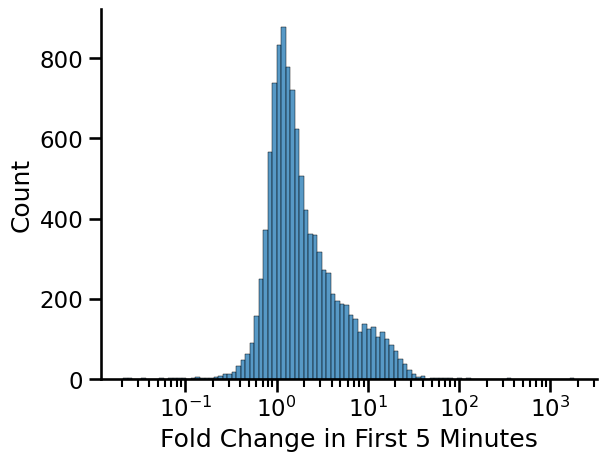

In [38]:
sns.set_context('talk')
sns.histplot(final_means_cat['initial_fold_change'], bins = 100, log_scale = (True, False))
sns.despine()
plt.xlabel("Fold Change in First 5 Minutes")

# Different promoters

I want to show that the Sort-seq experiments with the 4 different promoters (exp done by Kat) are highly correlated. Can you please make pairwise correlation plots for these columns:
- Activity_P3promoter	
- Activity_P14promoter	
- Activity_P15promoter	
- Activity_P3promoterMig1TFBSremoved


In [14]:
gcn4_multip_promoters = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/gcn4-orthologs-RemoveRedundantcolumns.csv")
gcn4_multip_promoters = gcn4_multip_promoters[["Activity_P3promoter","Activity_P14promoter","Activity_P15promoter"]]
gcn4_multip_promoters.columns = gcn4_multip_promoters.columns.str.replace('promoter', '', regex=False)
gcn4_multip_promoters.columns = gcn4_multip_promoters.columns.str.replace('Activity_', '', regex=False)
#gcn4_multip_promoters.columns = gcn4_multip_promoters.columns.str.replace('P3Mig1TFBSremoved', 'P3 Mig1 TFBS\nremoved', regex=False)
gcn4_multip_promoters

P3           P14            P15
0                NaN   11149.49032            NaN
1       14570.132170   16872.28649   11555.084110
2       18274.982410   15702.60901   18303.292010
3                NaN           NaN            NaN
4                NaN  125056.17980  129302.350800
...              ...           ...            ...
19033            NaN           NaN   96313.908600
19034            NaN           NaN  141148.123400
19035  157248.429900           NaN  169320.701800
19036            NaN  141888.64430            NaN
19037    9222.076561           NaN    8587.308907

[19038 rows x 3 columns]

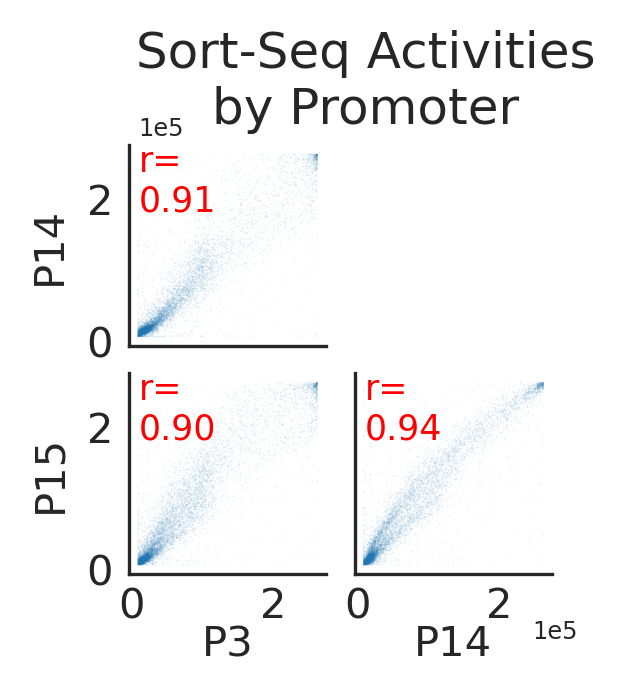

In [59]:
from matplotlib.ticker import ScalarFormatter

sns.set_style('white')

cols = gcn4_multip_promoters.columns
n = len(cols)

fig, axes = plt.subplots(n, n, figsize=(2.5,2.5), dpi = 300, sharey = True, sharex = True)


for ax in axes.flat:
    ax._shared_x_axes = ax._shared_y_axes = None
    
for i in range(n):
    for j in range(n):
        ax = axes[i, j]
        
        if i > j:  # lower triangle
            x = gcn4_multip_promoters[cols[j]]
            y = gcn4_multip_promoters[cols[i]]
            
            # Drop NaNs for this pair
            mask = ~(x.isna() | y.isna())
            x_clean = x[mask]
            y_clean = y[mask]
            
            # Scatter plot
            ax.scatter(x_clean, y_clean, s=0.1, alpha=0.1, edgecolor = 'none')
            
            # Pearson correlation
            corr = np.corrcoef(x_clean, y_clean)[0, 1]
            ax.text(
                0.05, 1, f'r=\n{corr:.2f}',
                transform=ax.transAxes,
                fontsize='small', color='red', va = 'top'
            )

            # Add x-axis label for bottom row
            if i == n-1:
                ax.set_xlabel(cols[j], fontsize='medium', labelpad = -0.5)
            
            # Add y-axis label for leftmost column
            if j == 0:
                ax.set_ylabel(cols[i], fontsize='medium')
        else:
            ax.set_visible(False)  # hide upper triangle and diagonal

        # ax.ticklabel_format(style='sci', scilimits=(0,0), axis='both')
        # ax.xaxis.get_offset_text().set_visible(False)
        # ax.yaxis.get_offset_text().set_visible(False)

        # # selectively turn on offset text with font size and position shift
        # if i == n-1 and j == n-2:  # bottom-right
        #     offset_text = ax.xaxis.get_offset_text()
        #     offset_text.set_visible(True)
        #     offset_text.set_fontsize('xx-small')        # adjust font size
        #     offset_text.set_x(1.25)             # horizontal shift (0=left, 0.5=center, 1=right)
        #     offset_text.set_y(1.05)            # vertical shift (default ~1.0 is just above ticks)

        # if i == 1 and j == 0:  # top-left
        #     ax.yaxis.get_offset_text().set_visible(True)
        #     ax.yaxis.get_offset_text().set_fontsize('xx-small')  # adjust size as needed
            
        # Move tick labels slightly inward
        for label in ax.get_xticklabels():
            label.set_y(0.08)
        
        for label in ax.get_yticklabels():
            label.set_x(0.07)
            
        ax.set_xticks([0, 2e5])
        ax.set_xticklabels(["0", "2"])
        
        ax.set_yticks([0, 2e5])
        ax.set_yticklabels(["0", "2"])

        if i == 1 and j == 0:
            ax.text(
                0.05, 1.02, "1e5",
                transform=ax.transAxes,
                fontsize='xx-small',
                va='bottom',
                ha='left'
            )
        if i == n-1 and j == n-2: # bottom right
            ax.text(
                0.9, -0.35, "1e5",
                transform=ax.transAxes,
                fontsize='xx-small',
                va='bottom',
                ha='left'
            )

fig.tight_layout(pad=0)
fig.suptitle("Sort-Seq Activities\nby Promoter", y = 0.85, x = 0.45)
sns.despine()

plt.savefig("../output/grant_resub_figs_v2/sort_seq_promoter_comparison.pdf", dpi=300, bbox_inches="tight")
plt.savefig("../output/grant_resub_figs_v2/sort_seq_promoter_comparison.png", dpi=300, bbox_inches="tight")

plt.show()
